In [2]:
import matplotlib.pyplot as plt
from typing import List
import numpy as np
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [3]:
def transform_timestamp(x:str) -> float:
    splits = x.split(':')
    return float(splits[0][:-1])*60+float(splits[1][:-1])+float(splits[2][:-1])/60

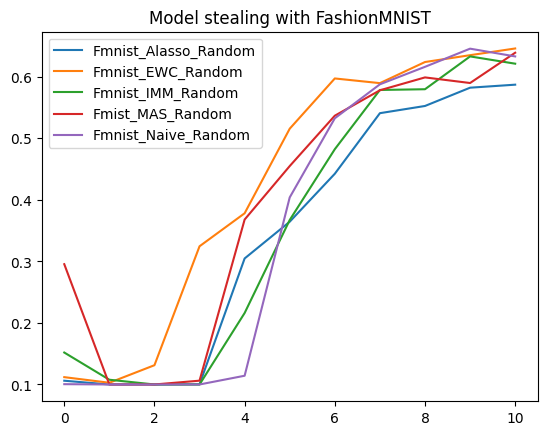

In [66]:
# 10 cycles model stealing
mnist_alasso_lc = [0.3308, 0.6268, 0.7644, 0.8147, 0.8583, 0.8694, 0.8735, 0.887, 0.8965, 0.9004, 0.9049]
mnist_ewc_lc = [0.3741, 0.5537, 0.7154, 0.8418, 0.867, 0.8902, 0.9001, 0.9075, 0.9094, 0.9113, 0.9206]
mnist_imm_lc = [0.2045, 0.6147, 0.7483, 0.8361, 0.8682, 0.8807, 0.8927, 0.8999, 0.9012, 0.9092, 0.9127]
mnist_mas_lc = [0.3219, 0.6398, 0.7106, 0.8402, 0.8642, 0.8849, 0.899, 0.9091, 0.9125, 0.9168, 0.9158]
mnist_naive_lc = [0.3257, 0.635, 0.7998, 0.8508, 0.8721, 0.8813, 0.8892, 0.8937, 0.9006, 0.9033, 0.9108]

mnist_alasso_random = [0.3974, 0.6501, 0.7206, 0.7955, 0.837, 0.8498, 0.8685, 0.8769, 0.8839, 0.8916, 0.8968]
mnist_ewc_random = [0.3749, 0.6074, 0.772, 0.8412, 0.8653, 0.88, 0.8909, 0.8946, 0.8978, 0.9049, 0.9021]
mnist_imm_random = [0.3576, 0.6136, 0.7789, 0.8467, 0.8715, 0.8803, 0.8868, 0.8947, 0.8968, 0.9003, 0.9021]
mnist_mas_random = [0.3573, 0.6183, 0.7723, 0.8473, 0.8671, 0.8798, 0.885, 0.891, 0.8963, 0.8966, 0.8999]
mnist_naive_random = [0.3396, 0.5897, 0.6776, 0.7873, 0.8292, 0.858, 0.8742, 0.8825, 0.8858, 0.8915, 0.8949]

# Wrong calculation with BALD here
mnist_alasso_bald = [0.4644, 0.6796, 0.098, 0.098, 0.098, 0.098, 0.098, 0.098, 0.098, 0.098, 0.098]
mnist_ewc_bald =[0.3761, 0.6981, 0.82, 0.8567, 0.8694, 0.8834, 0.8943, 0.8983, 0.9083, 0.914, 0.9173]
mnist_imm_bald = [0.2865, 0.4475, 0.7287, 0.8281, 0.8586, 0.8714, 0.8793, 0.8971, 0.8954, 0.9014, 0.9122]
mnist_mas_bald = [0.2878, 0.6483, 0.7759, 0.8439, 0.8774, 0.8903, 0.8995, 0.9087, 0.9132, 0.9182, 0.9198]
mnist_naive_bald = [0.5727, 0.7138, 0.8218, 0.8796, 0.8917, 0.9039, 0.9094, 0.9138, 0.9198, 0.9225, 0.9299]

fmnist_naive_random = [0.1005, 0.1, 0.1, 0.1, 0.1142, 0.4039, 0.5324, 0.5876, 0.616, 0.6455, 0.6329]
fmnist_ewc_random = [0.1119, 0.1028, 0.1313, 0.3245, 0.3781, 0.5155, 0.5971, 0.5895, 0.6238, 0.6349, 0.6458]
fmnist_mas_random = [0.2954, 0.1, 0.1, 0.1062, 0.3679, 0.4548, 0.5366, 0.5779, 0.5988, 0.5897, 0.6389]
fmnist_imm_random = [0.1519, 0.1077, 0.1, 0.1, 0.2161, 0.3672, 0.4822, 0.5784, 0.5796, 0.6329, 0.6211]
fmnist_alasso_random = [0.1061, 0.1, 0.1, 0.1003, 0.3047, 0.3644, 0.4423, 0.5407, 0.5524, 0.5821, 0.587]

# Wrong calculation with BALD here
fmnist_naive_bald = [0.2213, 0.3618, 0.3987, 0.2633, 0.3537, 0.4102, 0.5522, 0.6125, 0.633, 0.6444, 0.6574]
fmnist_ewc_bald = [0.1355, 0.1041, 0.1, 0.1, 0.1, 0.1, 0.1007, 0.1966, 0.3274, 0.4465, 0.5039]
fmnist_mas_bald = [0.1, 0.1, 0.1, 0.2188, 0.3874, 0.5231, 0.581, 0.6076, 0.618, 0.64, 0.6524]
fmnist_imm_bald = [0.1044, 0.1593, 0.1173, 0.1221, 0.3543, 0.4761, 0.5542, 0.5778, 0.614, 0.6363, 0.65]
fmnist_alasso_bald = [0.1361, 0.1005, 0.1, 0.1, 0.1, 0.1, 0.1014, 0.1854, 0.3045, 0.397, 0.1]

fmnist_naive_lc = [0.1, 0.1, 0.1004, 0.1649, 0.3223, 0.4114, 0.5228, 0.5824, 0.6458, 0.664, 0.6495]
fmnist_ewc_lc = [0.1152, 0.1, 0.1, 0.1, 0.2359, 0.3967, 0.5059, 0.5609, 0.5897, 0.6369, 0.6253]
fmnist_mas_lc = [0.1588, 0.1, 0.1, 0.3799, 0.4619, 0.5791, 0.5951, 0.6082, 0.614, 0.6525, 0.6553]
fmnist_imm_lc = [0.1, 0.1, 0.1, 0.1, 0.2412, 0.3945, 0.5264, 0.5901, 0.6188, 0.6348, 0.6385]
fmnist_alasso_lc = [0.1178, 0.1163, 0.1167, 0.1711, 0.3405, 0.4162, 0.4398, 0.5508, 0.5888, 0.6001, 0.6269]

plt.plot(fmnist_alasso_random,label="Fmnist_Alasso_Random")
plt.plot(fmnist_ewc_random,label="Fmnist_EWC_Random")
plt.plot(fmnist_imm_random,label="Fmnist_IMM_Random")
plt.plot(fmnist_mas_random,label="Fmist_MAS_Random")
plt.plot(fmnist_naive_random,label="Fmnist_Naive_Random")
plt.legend()
plt.title("Model stealing with FashionMNIST")
plt.show()

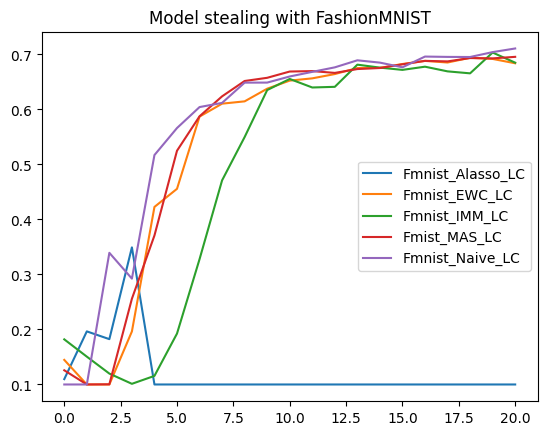

In [67]:
# 20 cycles model stealing
fmnist_naive_random = [0.1, 0.1, 0.1, 0.3172, 0.473, 0.5719, 0.5963, 0.6211, 0.6271, 0.6397, 0.6566, 0.6552, 0.6678, 0.6648, 0.6764, 0.6787, 0.6847, 0.6897, 0.6888, 0.6894, 0.6839]
fmnist_ewc_random = [0.1, 0.1, 0.1, 0.1, 0.1977, 0.4179, 0.5526, 0.5804, 0.6262, 0.6422, 0.6562, 0.6574, 0.6736, 0.6701, 0.6731, 0.6766, 0.6677, 0.6756, 0.6931, 0.6908, 0.6948]
fmnist_mas_random = [0.1305, 0.1099, 0.1116, 0.2308, 0.4321, 0.5068, 0.5495, 0.6034, 0.627, 0.6405, 0.6548, 0.6561, 0.6528, 0.6664, 0.6751, 0.6768, 0.6776, 0.6827, 0.682, 0.6928, 0.6896]
fmnist_imm_random = [0.1, 0.1, 0.1, 0.1317, 0.3159, 0.4611, 0.5753, 0.6014, 0.6271, 0.6533, 0.6603, 0.6569, 0.6634, 0.6791, 0.6839, 0.6896, 0.6907, 0.6822, 0.6796, 0.6901, 0.7044]
fmnist_alasso_random = [0.1018, 0.1, 0.1, 0.1164, 0.2416, 0.3627, 0.4211, 0.4806, 0.5135, 0.5362, 0.5632, 0.6169, 0.6046, 0.6458, 0.659, 0.6639, 0.6716, 0.6765, 0.6786, 0.6849, 0.6754]

# Wrong calculation with BALD here
fmnist_naive_bald = [0.1182, 0.1, 0.1, 0.1, 0.1847, 0.3899, 0.5174, 0.5975, 0.6142, 0.6365, 0.6569, 0.669, 0.6816, 0.6853, 0.6695, 0.6824, 0.6999, 0.6997, 0.7076, 0.7069, 0.7074]
fmnist_ewc_bald = [0.1001, 0.1, 0.1, 0.1, 0.1941, 0.4055, 0.4441, 0.4995, 0.5926, 0.6069, 0.6325, 0.6417, 0.6355, 0.6478, 0.6725, 0.6828, 0.6841, 0.6799, 0.6956, 0.7062, 0.7]
fmnist_mas_bald = [0.1002, 0.1, 0.1, 0.1303, 0.4484, 0.4925, 0.5816, 0.6034, 0.6238, 0.6431, 0.6522, 0.6476, 0.6497, 0.6612, 0.6667, 0.6735, 0.6794, 0.6809, 0.6795, 0.6739, 0.6901]
fmnist_imm_bald = [0.1, 0.1008, 0.1, 0.1035, 0.329, 0.4758, 0.5717, 0.6083, 0.6113, 0.6371, 0.6323, 0.6471, 0.6397, 0.6531, 0.6625, 0.6665, 0.6758, 0.6784, 0.6523, 0.6823, 0.682]
fmnist_alasso_bald = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1692, 0.3416, 0.3923, 0.4547, 0.5229, 0.5483, 0.5845, 0.6082, 0.6262, 0.6282, 0.6412, 0.6531, 0.6628, 0.6668, 0.666, 0.6682]

fmnist_naive_lc = [0.1, 0.1, 0.3393, 0.2924, 0.517, 0.5661, 0.6042, 0.6118, 0.6486, 0.6487, 0.6598, 0.6682, 0.6764, 0.6892, 0.685, 0.6765, 0.696, 0.6954, 0.6952, 0.7041, 0.7107]
fmnist_ewc_lc = [0.1447, 0.1, 0.1, 0.1964, 0.4227, 0.4556, 0.5869, 0.6104, 0.6146, 0.6376, 0.6523, 0.6564, 0.6642, 0.6751, 0.6754, 0.6825, 0.6881, 0.6852, 0.6938, 0.6917, 0.6838]
fmnist_mas_lc = [0.1258, 0.1, 0.1003, 0.2558, 0.3708, 0.5248, 0.5874, 0.6237, 0.6516, 0.6574, 0.6688, 0.6696, 0.6663, 0.6733, 0.6752, 0.6819, 0.6882, 0.6872, 0.6933, 0.6927, 0.6955]
fmnist_imm_lc = [0.182, 0.1506, 0.1198, 0.1012, 0.1156, 0.1925, 0.3277, 0.471, 0.5497, 0.6351, 0.6553, 0.6398, 0.641, 0.6813, 0.6759, 0.6718, 0.6776, 0.6691, 0.6655, 0.7033, 0.6849]
fmnist_alasso_lc = [0.1097, 0.1965, 0.1824, 0.3492, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
plt.plot(fmnist_alasso_lc,label="Fmnist_Alasso_LC")
plt.plot(fmnist_ewc_lc,label="Fmnist_EWC_LC")
plt.plot(fmnist_imm_lc,label="Fmnist_IMM_LC")
plt.plot(fmnist_mas_lc,label="Fmist_MAS_LC")
plt.plot(fmnist_naive_lc,label="Fmnist_Naive_LC")
plt.legend()
plt.title("Model stealing with FashionMNIST")
plt.show()

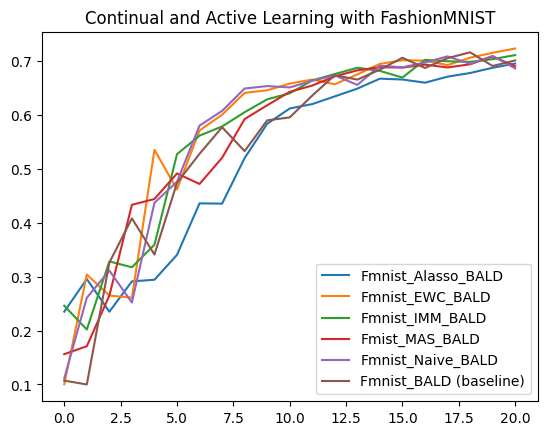

In [68]:
# cl&al (no model stealing)
fmnist_naive_random = [0.147, 0.1664, 0.1897, 0.2863, 0.4147, 0.4893, 0.5382, 0.5853, 0.5988, 0.632, 0.6426, 0.6433, 0.6591, 0.6777, 0.6483, 0.6744, 0.6468, 0.6894, 0.6964, 0.6918, 0.7068]
fmnist_ewc_random = [0.1019, 0.2903, 0.2917, 0.2826, 0.3443, 0.4297, 0.443, 0.5007, 0.5344, 0.5861, 0.633, 0.6452, 0.6638, 0.6506, 0.685, 0.6891, 0.6878, 0.689, 0.6957, 0.6928, 0.6961]
fmnist_mas_random = [0.177, 0.2749, 0.3379, 0.4415, 0.4217, 0.4212, 0.4925, 0.526, 0.5874, 0.6235, 0.628, 0.6304, 0.6688, 0.6723, 0.685, 0.6787, 0.6839, 0.6876, 0.687, 0.6959, 0.6863]
fmnist_imm_random = [0.1002, 0.165, 0.196, 0.3292, 0.3868, 0.4149, 0.4977, 0.5731, 0.6076, 0.6287, 0.6416, 0.6547, 0.6543, 0.663, 0.6759, 0.68, 0.6971, 0.6829, 0.6803, 0.7052, 0.7109]
fmnist_alasso_random = [0.1184, 0.1584, 0.2497, 0.3294, 0.3601, 0.4024, 0.4338, 0.4541, 0.4763, 0.4892, 0.4676, 0.4639, 0.4751, 0.4882, 0.5219, 0.5592, 0.5728, 0.6073, 0.6225, 0.6568, 0.6628]

# Wrong calculation with BALD here
fmnist_naive_bald =  [0.1113, 0.261, 0.3114, 0.2521, 0.4372, 0.4764, 0.5806, 0.6078, 0.6494, 0.6539, 0.6514, 0.6639, 0.6737, 0.6561, 0.6916, 0.6888, 0.6976, 0.7091, 0.6952, 0.7099, 0.6867]
fmnist_ewc_bald = [0.1005, 0.304, 0.2651, 0.2611, 0.5356, 0.4621, 0.5715, 0.6007, 0.6412, 0.6461, 0.6585, 0.6661, 0.6573, 0.6756, 0.6951, 0.7019, 0.7012, 0.6929, 0.7066, 0.7157, 0.7237]
fmnist_mas_bald = [0.1563, 0.171, 0.2651, 0.4335, 0.4443, 0.4917, 0.4722, 0.5208, 0.5927, 0.6183, 0.6432, 0.6549, 0.6719, 0.6832, 0.6889, 0.6882, 0.6937, 0.6885, 0.6943, 0.7088, 0.6906]
fmnist_imm_bald = [0.2462, 0.202, 0.3284, 0.3176, 0.3594, 0.5275, 0.5619, 0.5789, 0.6054, 0.6293, 0.6405, 0.6644, 0.6763, 0.6879, 0.6821, 0.6697, 0.7026, 0.7, 0.6989, 0.7039, 0.7114]
fmnist_alasso_bald = [0.2352, 0.2958, 0.2351, 0.2914, 0.2944, 0.3406, 0.4362, 0.4357, 0.5203, 0.5839, 0.6123, 0.6205, 0.6348, 0.6492, 0.6677, 0.6661, 0.6602, 0.6714, 0.6782, 0.6879, 0.6957]

fmnist_naive_lc = [0.1015, 0.1084, 0.1, 0.237, 0.4137, 0.4967, 0.5239, 0.6015, 0.6366, 0.6199, 0.6562, 0.6671, 0.6791, 0.684, 0.6881, 0.6973, 0.7053, 0.6916, 0.6789, 0.707, 0.712]
fmnist_ewc_lc = [0.1288, 0.2599, 0.3037, 0.3202, 0.4247, 0.4277, 0.4705, 0.5927, 0.6306, 0.6434, 0.6462, 0.657, 0.6773, 0.6781, 0.6876, 0.681, 0.704, 0.7063, 0.702, 0.6982, 0.6925]
fmnist_mas_lc = [0.0947, 0.1648, 0.2972, 0.4366, 0.3857, 0.3615, 0.445, 0.5198, 0.5586, 0.6295, 0.6437, 0.6454, 0.6799, 0.6781, 0.6945, 0.6987, 0.6914, 0.7055, 0.7018, 0.7053, 0.7108]
fmnist_imm_lc = [0.1567, 0.1949, 0.3529, 0.4297, 0.4969, 0.5297, 0.6124, 0.6268, 0.6368, 0.6602, 0.6824, 0.6593, 0.6819, 0.6771, 0.6975, 0.6862, 0.6818, 0.7081, 0.6953, 0.7227, 0.7103]
fmnist_alasso_lc = [0.1288, 0.2621, 0.3365, 0.3466, 0.3634, 0.4226, 0.4176, 0.4915, 0.5157, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

# Active learning evaluation (baselines)
fmnist_random = [0.1271, 0.3319, 0.411, 0.4578, 0.4456, 0.4395, 0.3713, 0.5763, 0.5776, 0.6081, 0.6485, 0.6548, 0.6273, 0.6336, 0.6783, 0.683, 0.6837, 0.6861, 0.6908, 0.7153, 0.696]
# Wrong calculation with BALD here
fmnist_BALD =  [0.1072, 0.1, 0.3263, 0.4083, 0.3412, 0.4743, 0.5282, 0.5775, 0.5332, 0.5903, 0.5958, 0.6363, 0.6742, 0.6659, 0.6844, 0.7065, 0.6875, 0.7057, 0.7166, 0.6912, 0.7015]
fmnist_LC = [0.1, 0.1502, 0.2764, 0.3536, 0.4304, 0.4995, 0.5134, 0.5964, 0.616, 0.632, 0.6737, 0.6662, 0.6714, 0.6593, 0.6753, 0.697, 0.6914, 0.6715, 0.6984, 0.7154, 0.6754]


plt.plot(fmnist_alasso_bald,label="Fmnist_Alasso_BALD")
plt.plot(fmnist_ewc_bald,label="Fmnist_EWC_BALD")
plt.plot(fmnist_imm_bald,label="Fmnist_IMM_BALD")
plt.plot(fmnist_mas_bald,label="Fmist_MAS_BALD")
plt.plot(fmnist_naive_bald,label="Fmnist_Naive_BALD")
plt.plot(fmnist_BALD,label="Fmnist_BALD (baseline)")
plt.legend()
plt.title("Continual and Active Learning with FashionMNIST")
plt.show()


In [69]:
# Active learning evaluation
fmnist_random = [0.1271, 0.3319, 0.411, 0.4578, 0.4456, 0.4395, 0.3713, 0.5763, 0.5776, 0.6081, 0.6485, 0.6548, 0.6273, 0.6336, 0.6783, 0.683, 0.6837, 0.6861, 0.6908, 0.7153, 0.696]
# Wrong calculation with BALD here
fmnist_BALD =  [0.1072, 0.1, 0.3263, 0.4083, 0.3412, 0.4743, 0.5282, 0.5775, 0.5332, 0.5903, 0.5958, 0.6363, 0.6742, 0.6659, 0.6844, 0.7065, 0.6875, 0.7057, 0.7166, 0.6912, 0.7015]
fmnist_LC = [0.1, 0.1502, 0.2764, 0.3536, 0.4304, 0.4995, 0.5134, 0.5964, 0.616, 0.632, 0.6737, 0.6662, 0.6714, 0.6593, 0.6753, 0.697, 0.6914, 0.6715, 0.6984, 0.7154, 0.6754]



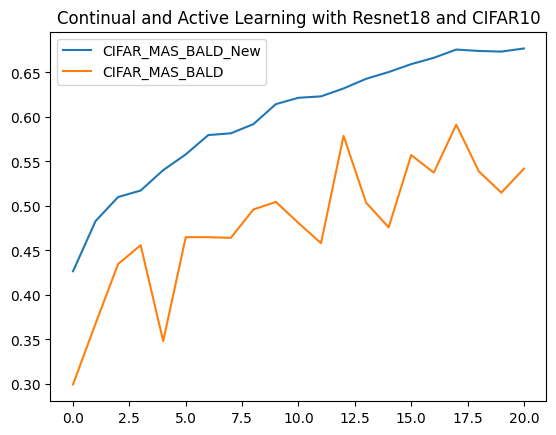

In [70]:
# Continual Active Learning Resnet18
cifar_EWC_LC = [0.3996, 0.4775, 0.5448, 0.5928, 0.5562, 0.6047, 0.564, 0.6209, 0.6264, 0.6763, 0.6656, 0.5593, 0.6965, 0.7041, 0.6889, 0.6546, 0.7097, 0.7171, 0.7238, 0.7207, 0.7262]
cifar_IMM_LC = [0.4154, 0.4607, 0.4919, 0.5054, 0.5212, 0.5367, 0.5459, 0.5586, 0.5699, 0.5769, 0.5801, 0.5877, 0.5983, 0.6078, 0.606, 0.6103, 0.6229, 0.6208, 0.6218, 0.6265, 0.6316]
cifar_Naive_LC = [0.3033, 0.3146, 0.4797, 0.4364, 0.5256, 0.5344, 0.5616, 0.5541, 0.6285, 0.61, 0.6294, 0.6237, 0.6428, 0.6493, 0.6575, 0.6568, 0.6666, 0.6728, 0.6681, 0.6787, 0.6766]
# Wrong calculation with BALD here
cifar_EWC_BALD = [0.4561, 0.4197, 0.539, 0.5508, 0.5476, 0.5831, 0.6012, 0.6014, 0.5831, 0.6669, 0.6476, 0.6828, 0.684, 0.6901, 0.6991, 0.6947, 0.7037, 0.7072, 0.7046, 0.714, 0.7244]
cifar_MAS_BALD = [0.2994, 0.3678, 0.4347, 0.4559, 0.3481, 0.4649, 0.4649, 0.4642, 0.496, 0.5045, 0.4808, 0.4582, 0.5787, 0.5037, 0.4759, 0.5572, 0.5374, 0.5913, 0.5388, 0.5149, 0.5419]
cifar_MAS_BALD_new = [0.4266, 0.483, 0.51, 0.5173, 0.5402, 0.5579, 0.5796, 0.5816, 0.5919, 0.6144, 0.6215, 0.6231, 0.632, 0.6428, 0.6504, 0.6593, 0.6664, 0.6757, 0.6741, 0.6734, 0.6769]
cifar_Naive_BALD = [0.3812, 0.4544, 0.4308, 0.4081, 0.5091, 0.5226, 0.5039, 0.6147, 0.6294, 0.5364, 0.6213, 0.6584, 0.6408, 0.6441, 0.6569, 0.6628, 0.6623, 0.6627, 0.6694, 0.6718, 0.68]

#plt.plot(cifar_EWC_LC,label="CIFAR_EWC_LC")
#plt.plot(cifar_IMM_LC,label="CIFAR_IMM_LC")
#plt.plot(cifar_Naive_LC,label="CIFAR_Naive_LC")
#plt.plot(cifar_EWC_BALD,label="CIFAR_EWC_BALD")
plt.plot(cifar_MAS_BALD_new,label="CIFAR_MAS_BALD_New")
plt.plot(cifar_MAS_BALD,label="CIFAR_MAS_BALD")
#plt.plot(cifar_Naive_BALD,label="CIFAR_Naive_BALD")
plt.legend()
plt.title("Continual and Active Learning with Resnet18 and CIFAR10")
plt.show()

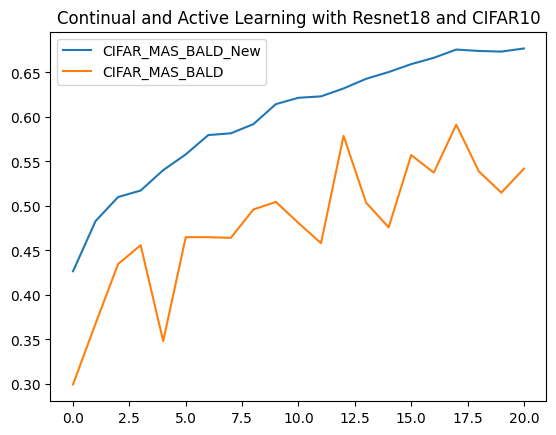

In [71]:
# Runs for MAS and BALD with CIFAR-10 on Resnet
# Wrong calculation with BALD here
# Here the weight is 0.01
cifar_MAS_BALD_1 = [0.2994, 0.3678, 0.4347, 0.4559, 0.3481, 0.4649, 0.4649, 0.4642, 0.496, 0.5045, 0.4808, 0.4582, 0.5787, 0.5037, 0.4759, 0.5572, 0.5374, 0.5913, 0.5388, 0.5149, 0.5419]
# Here the weight is 
cifar_MAS_BALD_new = [0.4266, 0.483, 0.51, 0.5173, 0.5402, 0.5579, 0.5796, 0.5816, 0.5919, 0.6144, 0.6215, 0.6231, 0.632, 0.6428, 0.6504, 0.6593, 0.6664, 0.6757, 0.6741, 0.6734, 0.6769]
cifar_MAS_BALD
plt.plot(cifar_MAS_BALD_new,label="CIFAR_MAS_BALD_New")
plt.plot(cifar_MAS_BALD,label="CIFAR_MAS_BALD")
#plt.plot(cifar_Naive_BALD,label="CIFAR_Naive_BALD")
plt.legend()
plt.title("Continual and Active Learning with Resnet18 and CIFAR10")
plt.show()

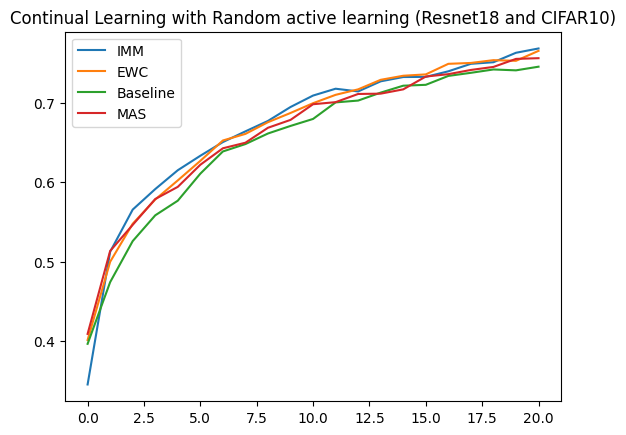

In [72]:
# Runs for Random AL strategy with CIFAR-10 on Resnet18
imm = [0.3457, 0.5126, 0.5656, 0.5914, 0.6151, 0.6333, 0.6505, 0.664, 0.6771, 0.6946, 0.709, 0.7176, 0.7142, 0.7269, 0.7323, 0.7325, 0.7395, 0.7489, 0.7509, 0.7628, 0.7682]
ewc = [0.4016, 0.5, 0.5478, 0.5783, 0.6023, 0.6269, 0.6525, 0.6608, 0.6755, 0.6871, 0.6994, 0.7099, 0.7168, 0.7288, 0.7339, 0.7356, 0.7489, 0.75, 0.7535, 0.7527, 0.7652]
naive = [0.3968, 0.4744, 0.526, 0.5584, 0.5768, 0.6108, 0.6387, 0.648, 0.6613, 0.6708, 0.6796, 0.7004, 0.7027, 0.7127, 0.7214, 0.7225, 0.7337, 0.7376, 0.7418, 0.7407, 0.7453]
mas = [0.4093, 0.5136, 0.5464, 0.5789, 0.5942, 0.622, 0.6427, 0.6497, 0.6685, 0.6784, 0.6981, 0.7007, 0.711, 0.7114, 0.7168, 0.7329, 0.7359, 0.7412, 0.745, 0.7551, 0.756]
plt.plot(imm,label="IMM")
plt.plot(ewc,label="EWC")
plt.plot(naive,label="Baseline")
plt.plot(mas,label="MAS")
#plt.plot(cifar_Naive_BALD,label="CIFAR_Naive_BALD")
plt.legend()
plt.title("Continual Learning with Random active learning (Resnet18 and CIFAR10)")
plt.show()

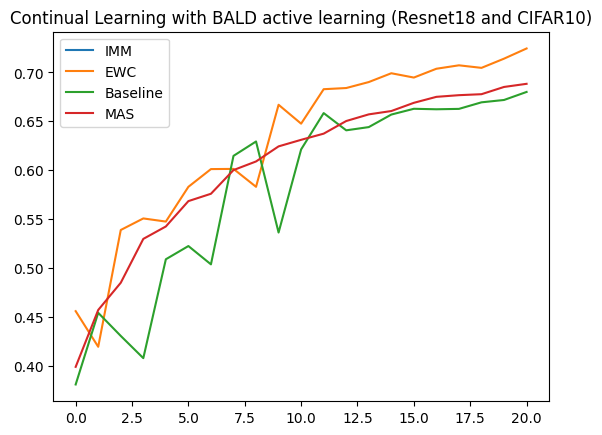

In [73]:
# Runs for BALD AL strategy with CIFAR-10 on Resnet18
imm = []
ewc = [0.4561, 0.4197, 0.539, 0.5508, 0.5476, 0.5831, 0.6012, 0.6014, 0.5831, 0.6669, 0.6476, 0.6828, 0.684, 0.6901, 0.6991, 0.6947, 0.7037, 0.7072, 0.7046, 0.714, 0.7244]
naive = [0.3812, 0.4544, 0.4308, 0.4081, 0.5091, 0.5226, 0.5039, 0.6147, 0.6294, 0.5364, 0.6213, 0.6584, 0.6408, 0.6441, 0.6569, 0.6628, 0.6623, 0.6627, 0.6694, 0.6718, 0.68]
mas = [0.3992, 0.4573, 0.4851, 0.5299, 0.5426, 0.5685, 0.576, 0.6002, 0.609, 0.6244, 0.6311, 0.6374, 0.6503, 0.6571, 0.6605, 0.6689, 0.675, 0.6767, 0.6777, 0.6851, 0.6883]
plt.plot(imm,label="IMM")
plt.plot(ewc,label="EWC")
plt.plot(naive,label="Baseline")
plt.plot(mas,label="MAS")
#plt.plot(cifar_Naive_BALD,label="CIFAR_Naive_BALD")
plt.legend()
plt.title("Continual Learning with BALD active learning (Resnet18 and CIFAR10)")
plt.show()

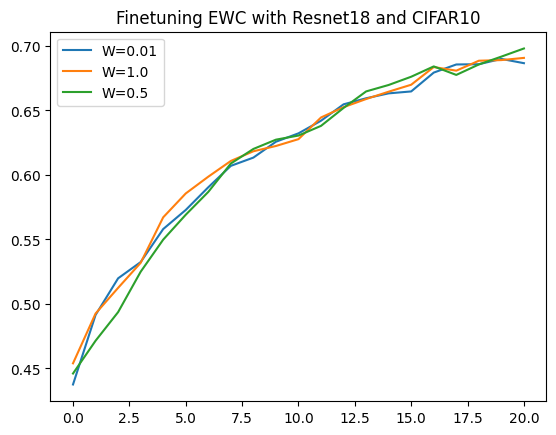

In [74]:
# Finetuning for LC and EWC on Resnet18 and CIFAR-10
# Here the weight is 0.01
first = [0.4375, 0.4914, 0.5198, 0.5324, 0.558, 0.5728, 0.5904, 0.607, 0.6134, 0.6257, 0.6322, 0.642, 0.6547, 0.6594, 0.6632, 0.6647, 0.6793, 0.6856, 0.6858, 0.6899, 0.6866]
# Here the weight is 1.0
second = [0.4539, 0.4925, 0.5124, 0.5318, 0.5671, 0.5856, 0.5986, 0.6108, 0.6183, 0.6224, 0.6277, 0.6445, 0.6525, 0.6588, 0.6645, 0.6699, 0.6836, 0.6808, 0.6885, 0.689, 0.6907]
# Here the weight is 0.5
third = [0.446, 0.4714, 0.4936, 0.5249, 0.5498, 0.5691, 0.5868, 0.6088, 0.6201, 0.6273, 0.6305, 0.638, 0.6519, 0.6647, 0.6697, 0.6761, 0.6841, 0.6775, 0.6856, 0.6917, 0.698]
plt.plot(first,label="W=0.01")
plt.plot(second,label="W=1.0")
plt.plot(third,label="W=0.5")
plt.legend()
plt.title("Finetuning EWC with Resnet18 and CIFAR10")
plt.show()

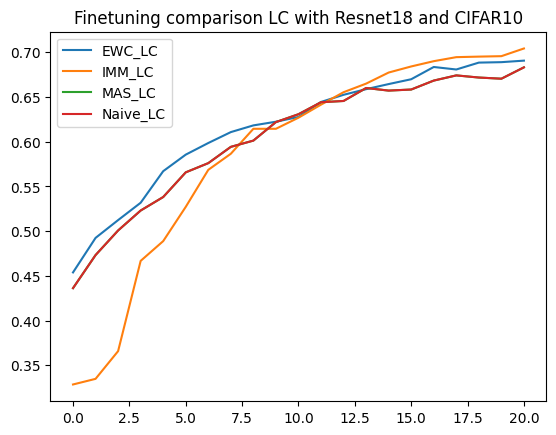

In [75]:
ewc_best = [0.4539, 0.4925, 0.5124, 0.5318, 0.5671, 0.5856, 0.5986, 0.6108, 0.6183, 0.6224, 0.6277, 0.6445, 0.6525, 0.6588, 0.6645, 0.6699, 0.6836, 0.6808, 0.6885, 0.689, 0.6907]
imm_best = [0.3286, 0.3349, 0.3659, 0.4668, 0.4889, 0.5272, 0.5686, 0.5866, 0.6145, 0.6145, 0.6269, 0.6415, 0.6554, 0.665, 0.6774, 0.6842, 0.6901, 0.6946, 0.6952, 0.6957, 0.7043]
mas_best = [0.4363, 0.4733, 0.5008, 0.5231, 0.5382, 0.5658, 0.5761, 0.5943, 0.6013, 0.622, 0.6308, 0.6442, 0.6456, 0.6601, 0.6572, 0.6584, 0.6684, 0.6742, 0.6718, 0.6705, 0.6832]
naive_best = [0.4139, 0.5125, 0.5592, 0.5866, 0.6151, 0.6307, 0.6513, 0.6617, 0.6737, 0.683, 0.6827, 0.6964, 0.7083, 0.7165, 0.7178, 0.7197, 0.725, 0.7276, 0.7284, 0.7325, 0.7402]
plt.plot(ewc_best,label="EWC_LC")
plt.plot(imm_best,label="IMM_LC")
plt.plot(mas_best,label="MAS_LC")
plt.plot(mas_best,label="Naive_LC")
plt.legend()
plt.title("Finetuning comparison LC with Resnet18 and CIFAR10")
plt.show()

In [76]:
def calculate_ppm(values: List[List[float]]) -> List[List[float]]:
    scores = []
    for i,outer_val in enumerate(values):
        cur_score = []
        for j,inner_val in enumerate(values):
            if i==j:
                cur_score.append(0.0)
            else: 
                cur_score.append(calc_t_test(outer_val,inner_val))
        scores.append(cur_score)
    return scores
    

def calc_t_test(a: List[float], b: List[float]) -> float:
    mu = np.sum(a - b)/len(a)
    s = np.sum((a- b -mu)**2)/(len(a)-1)
    sigma = np.sqrt(s)
    return round(np.sqrt(len(a))*mu/sigma,2)


[[0.0, 0.37, 4.12, 1.83], [-0.37, 0.0, 14.06, 3.48], [-4.12, -14.06, 0.0, -4.61], [-1.83, -3.48, 4.61, 0.0]]


<AxesSubplot: >

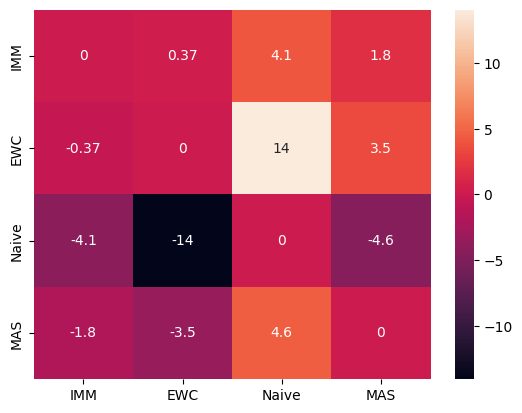

In [77]:
imm = [0.3457, 0.5126, 0.5656, 0.5914, 0.6151, 0.6333, 0.6505, 0.664, 0.6771, 0.6946, 0.709, 0.7176, 0.7142, 0.7269, 0.7323, 0.7325, 0.7395, 0.7489, 0.7509, 0.7628, 0.7682]
ewc = [0.4016, 0.5, 0.5478, 0.5783, 0.6023, 0.6269, 0.6525, 0.6608, 0.6755, 0.6871, 0.6994, 0.7099, 0.7168, 0.7288, 0.7339, 0.7356, 0.7489, 0.75, 0.7535, 0.7527, 0.7652]
naive = [0.3968, 0.4744, 0.526, 0.5584, 0.5768, 0.6108, 0.6387, 0.648, 0.6613, 0.6708, 0.6796, 0.7004, 0.7027, 0.7127, 0.7214, 0.7225, 0.7337, 0.7376, 0.7418, 0.7407, 0.7453]
mas = [0.4093, 0.5136, 0.5464, 0.5789, 0.5942, 0.622, 0.6427, 0.6497, 0.6685, 0.6784, 0.6981, 0.7007, 0.711, 0.7114, 0.7168, 0.7329, 0.7359, 0.7412, 0.745, 0.7551, 0.756]
vals = [np.array(imm),np.array(ewc),np.array(naive),np.array(mas)]
ppm_vals = calculate_ppm(vals)
print(ppm_vals)
methods = ["IMM","EWC","Naive","MAS"]
sns.heatmap(ppm_vals, annot=True,xticklabels=methods,yticklabels=methods)

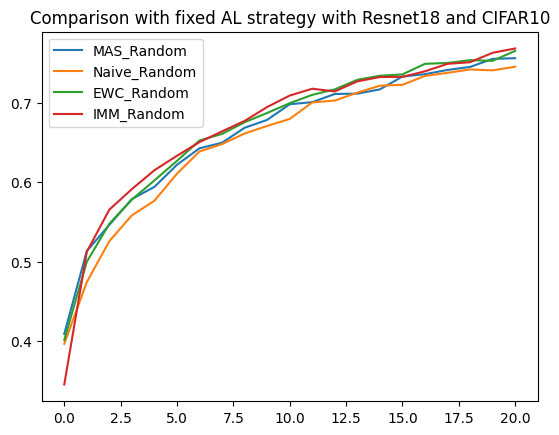

In [78]:
MAS_Random =  [0.4093, 0.5136, 0.5464, 0.5789, 0.5942, 0.622, 0.6427, 0.6497, 0.6685, 0.6784, 0.6981, 0.7007, 0.711, 0.7114, 0.7168, 0.7329, 0.7359, 0.7412, 0.745, 0.7551, 0.756]
Naive_Random = [0.3968, 0.4744, 0.526, 0.5584, 0.5768, 0.6108, 0.6387, 0.648, 0.6613, 0.6708, 0.6796, 0.7004, 0.7027, 0.7127, 0.7214, 0.7225, 0.7337, 0.7376, 0.7418, 0.7407, 0.7453]
EWC_Random = [0.4016, 0.5, 0.5478, 0.5783, 0.6023, 0.6269, 0.6525, 0.6608, 0.6755, 0.6871, 0.6994, 0.7099, 0.7168, 0.7288, 0.7339, 0.7356, 0.7489, 0.75, 0.7535, 0.7527, 0.7652]
IMM_Random = [0.3457, 0.5126, 0.5656, 0.5914, 0.6151, 0.6333, 0.6505, 0.664, 0.6771, 0.6946, 0.709, 0.7176, 0.7142, 0.7269, 0.7323, 0.7325, 0.7395, 0.7489, 0.7509, 0.7628, 0.7682]
plt.plot(MAS_Random,label="MAS_Random")
plt.plot(Naive_Random,label="Naive_Random")
plt.plot(EWC_Random,label="EWC_Random")
plt.plot(IMM_Random,label="IMM_Random")
plt.legend()
plt.title("Comparison with fixed AL strategy with Resnet18 and CIFAR10")
plt.show()

In [79]:
train_acc = [0.3365, 0.5074, 0.6156, 0.6868, 0.7386, 0.7743, 0.7939, 0.8108, 0.8191, 0.8243,
              0.8344, 0.8406, 0.844, 0.8493, 0.8519, 0.8562, 0.8556, 0.8605, 0.8654, 0.8663,
                0.9208, 0.9387, 0.9436, 0.9497, 0.956, 0.9589, 0.9615, 0.9657, 0.9692, 0.9696,
                  0.9718, 0.9726, 0.9742, 0.9755, 0.9776, 0.9778, 0.9774, 0.9777, 0.98, 0.9799,
                    0.9885, 0.9922, 0.9939, 0.9943, 0.9958, 0.9956, 0.9961, 0.997, 0.9969, 0.9969]
val_acc = [0.4286, 0.567, 0.6251, 0.6832, 0.7335, 0.762, 0.7759, 0.7966, 0.779, 0.8052,
            0.7984, 0.823, 0.8264, 0.8333, 0.8261, 0.8249, 0.8135, 0.8263, 0.8481, 0.8258,
              0.8889, 0.8952, 0.8981, 0.8974, 0.8965, 0.9027, 0.901, 0.9008, 0.9046, 0.9019,
                0.9017, 0.8989, 0.9017, 0.9019, 0.8959, 0.9042, 0.9032, 0.8935, 0.9054, 0.8984,
                  0.9114, 0.9149, 0.9163, 0.9115, 0.9124, 0.914, 0.9157, 0.9148, 0.9142, 0.9146]
train_loss = [0.0142, 0.0106, 0.0084, 0.007, 0.0059, 0.0051, 0.0047, 0.0043, 0.0041, 0.004, 0.0038, 0.0037,
               0.0036, 0.0034, 0.0034, 0.0033, 0.0033, 0.0032, 0.0031, 0.0031, 0.0019, 0.0014, 0.0013, 0.0012,
                 0.001, 0.001, 0.0009, 0.0008, 0.0007, 0.0007, 0.0007, 0.0006, 0.0006, 0.0006, 0.0005, 0.0005,
                   0.0005, 0.0005, 0.0005, 0.0005, 0.0003, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
val_loss = [0.0125, 0.0095, 0.0085, 0.0073, 0.0061, 0.0055, 0.0053, 0.0048, 0.0052, 0.0046, 0.0047,
             0.0041, 0.004, 0.0039, 0.0041, 0.0041, 0.0043, 0.004, 0.0036, 0.004,0.0026, 0.0025, 0.0024,
               0.0024, 0.0025, 0.0024, 0.0025, 0.0025, 0.0024, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0027,
                 0.0026, 0.0026, 0.0028, 0.0025, 0.0027, 0.0024, 0.0023, 0.0024, 0.0024, 0.0024, 0.0024, 0.0023, 0.0024, 0.0024, 0.0024]

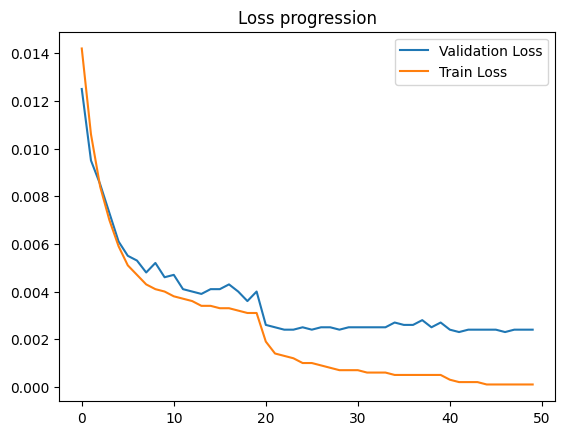

In [80]:
plt.plot(val_loss,label="Validation Loss")
plt.plot(train_loss,label="Train Loss")
plt.legend()
plt.title("Loss progression")
plt.show()

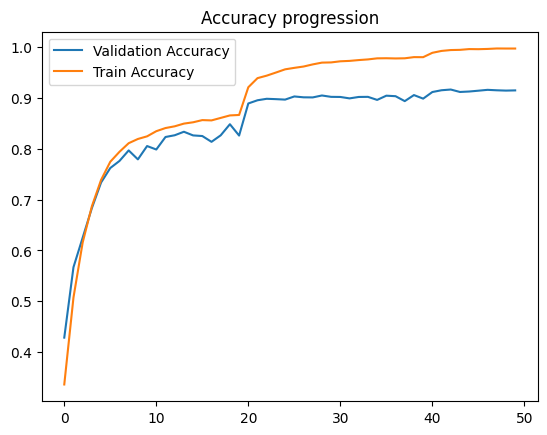

In [81]:
plt.plot(val_acc,label="Validation Accuracy")
plt.plot(train_acc,label="Train Accuracy")
plt.legend()
plt.title("Accuracy progression")
plt.show()

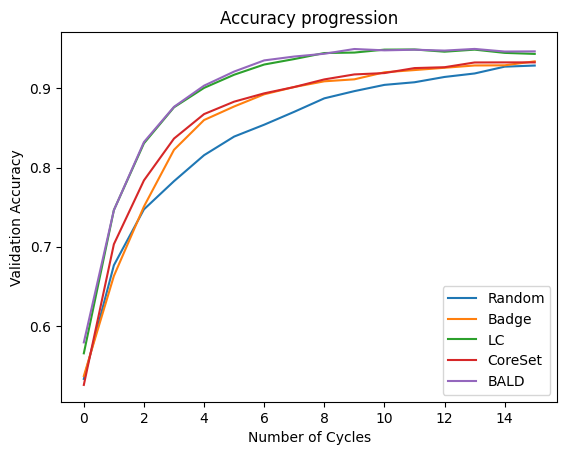

In [91]:
# Active learning results
Random = [0.5331, 0.6766, 0.7472, 0.7828, 0.8156, 0.8391, 0.8541, 0.8704, 0.8874, 0.8965, 0.9044, 0.9077, 0.9144, 0.9188, 0.9274, 0.9288]
Badge = [0.5367, 0.6631, 0.7508, 0.8224, 0.86, 0.8771, 0.8925, 0.9017, 0.9089, 0.9114, 0.9203, 0.9231, 0.926, 0.9289, 0.9291, 0.9341]
Lc = [0.5654, 0.7463, 0.8306, 0.8761, 0.9006, 0.9172, 0.9301, 0.937, 0.9446, 0.9452, 0.9489, 0.9491, 0.9463, 0.9489, 0.9448, 0.9435]
CoreSet = [0.5255, 0.7032, 0.7838, 0.8366, 0.8675, 0.8832, 0.8937, 0.9017, 0.9113, 0.9176, 0.9193, 0.9256, 0.9267, 0.9327, 0.9328, 0.9328]
#Bald = [0.5793, 0.6345, 0.6709, 0.7056, 0.7506, 0.7717, 0.7896, 0.7993, 0.8089, 0.8199, 0.8339, 0.8406, 0.8417, 0.8575, 0.8652, 0.8724]
Bald_wrong = [0.5356, 0.6139, 0.6546, 0.6879, 0.7176, 0.7481, 0.7785, 0.7914, 0.8021, 0.815, 0.8262, 0.8287, 0.8373, 0.8487, 0.8608, 0.8701]
Bald = [0.5792, 0.7462, 0.8322, 0.8767, 0.9034, 0.9212, 0.9353, 0.9402, 0.9437, 0.9497, 0.948, 0.9488, 0.9477, 0.9498, 0.9465, 0.9467]
plt.plot(Random,label="Random")
plt.plot(Badge,label="Badge")
plt.plot(Lc,label="LC")
plt.plot(CoreSet,label="CoreSet")
plt.plot(Bald,label="BALD")
plt.legend()
plt.title("Accuracy progression")
plt.xlabel("Number of Cycles")
plt.ylabel("Validation Accuracy")
plt.show()

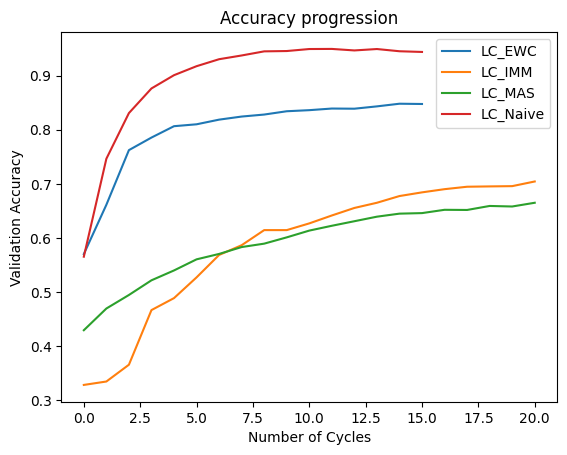

In [83]:
# Continual active learning results
#Lc_EWC =  [0.5077, 0.666, 0.7463, 0.8297, 0.8759, 0.9039, 0.9181, 0.925, 0.9351, 0.9412, 0.943, 0.9458, 0.9452, 0.9466, 0.9486, 0.9456]
Lc_EWC = [0.5702, 0.6613, 0.7622, 0.7854, 0.8064, 0.8099, 0.8185, 0.8242, 0.8279, 0.834, 0.836, 0.839, 0.8387, 0.843, 0.8479, 0.8474]
Random_MAS = [0.604, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
# Wrong calculation with BALD here
Bald_EWC = [0.5745, 0.6158, 0.6712, 0.7197, 0.7464, 0.7746, 0.79, 0.7989, 0.8088, 0.8163, 0.8273, 0.8406, 0.8423, 0.8532, 0.863, 0.8693]
#Lc_IMM = [0.5207, 0.6805, 0.7846, 0.8559, 0.8881, 0.9096, 0.9238, 0.9307, 0.9406, 0.9438, 0.9499, 0.9478, 0.9464, 0.9488, 0.9494, 0.9452]
Lc_IMM = [0.3286, 0.3349, 0.3659, 0.4668, 0.4889, 0.5272, 0.5686, 0.5866, 0.6145, 0.6145, 0.6269, 0.6415, 0.6554, 0.665, 0.6774, 0.6842, 0.6901, 0.6946, 0.6952, 0.6957, 0.7043]
Random_IMM = [0.5404, 0.664, 0.7166, 0.7408, 0.783, 0.8174, 0.8444, 0.8637, 0.8833, 0.8926, 0.9012, 0.9048, 0.9133, 0.9195, 0.9241, 0.9255]
Random_EWC =  [0.6063, 0.7073, 0.7606, 0.7911, 0.8088, 0.8296, 0.8391, 0.8569, 0.8659, 0.875, 0.8833, 0.8931, 0.8963, 0.9055, 0.9089, 0.9097]
# Wrong calculation with BALD here
Bald_MAS = [0.5533, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
#Lc_MAS = [0.6152, 0.6583, 0.6731, 0.6912, 0.7108, 0.7231, 0.7337, 0.7471, 0.7556, 0.7633, 0.7713, 0.7772, 0.7813, 0.7886, 0.79, 0.7907]
Lc_MAS = [0.4296, 0.4697, 0.4947, 0.5218, 0.54, 0.5605, 0.5705, 0.5832, 0.5895, 0.6011, 0.6136, 0.6225, 0.6309, 0.6393, 0.6449, 0.6459, 0.652, 0.6517, 0.6591, 0.6581, 0.665]
Coreset_EWC = [0.5795, 0.7186, 0.8022, 0.8404, 0.8637, 0.8825, 0.894, 0.9045, 0.91, 0.9158, 0.9208, 0.9266, 0.931, 0.9314, 0.9345, 0.9339]
plt.plot(Lc_EWC,label="LC_EWC")
plt.plot(Lc_IMM,label="LC_IMM")
plt.plot(Lc_MAS,label="LC_MAS")
plt.plot(Lc,label="LC_Naive")
#plt.plot(Random_EWC,label="Random_EWC")
plt.legend()
plt.title("Accuracy progression")
plt.xlabel("Number of Cycles")
plt.ylabel("Validation Accuracy")
plt.show()

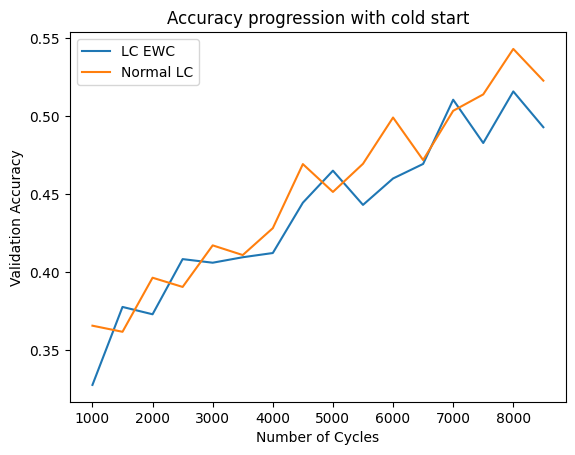

In [84]:
epochs_40 = [0.3684, 0.3266, 0.3948, 0.3949, 0.399, 0.3925, 0.4238, 0.4375, 0.4302, 0.4446, 0.4534, 0.4352, 0.4709, 0.4984, 0.5136, 0.5115]
lc_ewc = [0.3279, 0.3778, 0.3731, 0.4084, 0.4061, 0.4096, 0.4123, 0.4445, 0.465, 0.4431, 0.46, 0.4693, 0.5104, 0.4827, 0.5157, 0.4928]
lc_naive = [0.3658, 0.3619, 0.3965, 0.3906, 0.4172, 0.411, 0.4282, 0.4692, 0.4514, 0.4694, 0.499, 0.4718, 0.5033, 0.5138, 0.5429, 0.5226]
x = [1000] + [1000+i*500 for i in range(1,16)]
plt.plot(x,lc_ewc,label="LC EWC")
plt.plot(x,lc_naive,label="Normal LC")
plt.legend()
plt.title("Accuracy progression with cold start")
plt.xlabel("Number of Cycles")
plt.ylabel("Validation Accuracy")
plt.show()

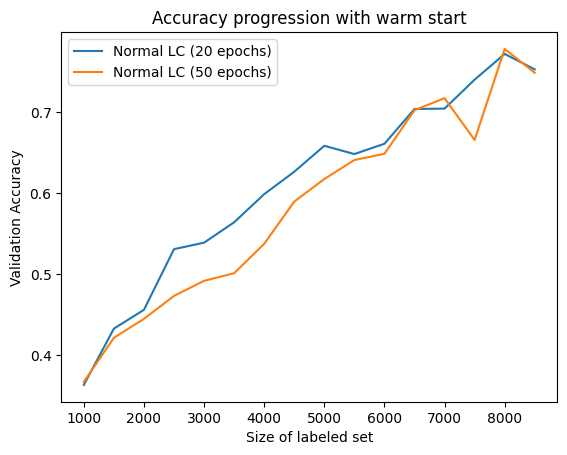

In [85]:
Lc_Naive = [0.3629, 0.4325, 0.4558, 0.5308, 0.5388, 0.564, 0.5988, 0.6265, 0.6586, 0.6484, 0.6611, 0.7041, 0.7046, 0.7404, 0.7722, 0.7531]
Lc_EWC = [0.3467, 0.3884, 0.4696, 0.5168, 0.4912, 0.5433, 0.6239, 0.6234, 0.671, 0.6288, 0.6854, 0.6678, 0.723, 0.6967, 0.7143, 0.7716]
Lc_EWC_50epochs = [0.3928, 0.4547, 0.5168, 0.5202, 0.5735, 0.5883, 0.5867, 0.6311, 0.6278, 0.6723, 0.6937, 0.7173, 0.6961, 0.756, 0.7648, 0.7656]
LC_Naive_50epochs = [0.3667, 0.4212, 0.4446, 0.473, 0.4916, 0.501, 0.5374, 0.5896, 0.6175, 0.641, 0.6487, 0.7026, 0.7175, 0.6658, 0.7784, 0.7489]
x = [1000] + [1000+i*500 for i in range(1,16)]
plt.plot(x,Lc_Naive,label="Normal LC (20 epochs)")
plt.plot(x,LC_Naive_50epochs,label="Normal LC (50 epochs)")
plt.legend()
plt.title("Accuracy progression with warm start")
plt.xlabel("Size of labeled set")
plt.ylabel("Validation Accuracy")
plt.show()
print()

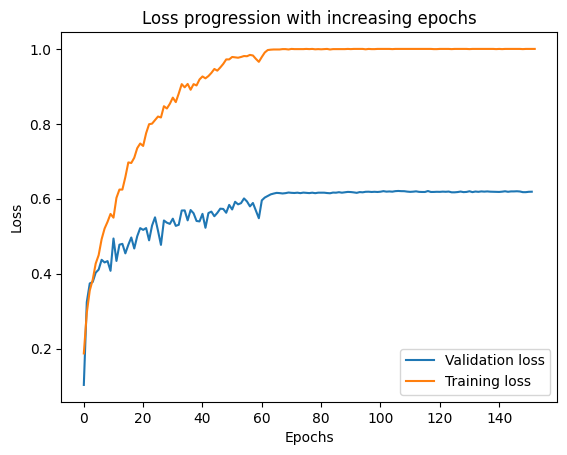

In [88]:
# Determining the number of epochs to train for continual learning
val_acc = [0.103, 0.3241, 0.3739, 0.3778, 0.4027, 0.4109, 0.437, 0.43, 0.4336, 0.4076, 0.4939, 0.434, 0.4774,
            0.4796, 0.4542, 0.477, 0.4966, 0.4672, 0.4999, 0.5216, 0.5169, 0.5217, 0.489, 0.5284, 0.5504, 0.5148,
              0.4769, 0.542, 0.5361, 0.5329, 0.5468, 0.5276, 0.5305, 0.5686, 0.5689, 0.5423, 0.5699, 0.5612, 0.5407,
                0.5395, 0.5597, 0.5225, 0.5618, 0.5657, 0.5533, 0.5623, 0.5735, 0.5728, 0.5626, 0.5836, 0.5714, 0.5919,
                  0.5851, 0.5883, 0.6009, 0.5928, 0.5797, 0.5887, 0.5687, 0.548, 0.5957, 0.6032, 0.6076, 0.6117, 0.6139,
                    0.6157, 0.6151, 0.6141, 0.615, 0.6166, 0.6158, 0.6154, 0.6162, 0.615, 0.6164, 0.6158, 0.6151, 0.6162,
                      0.6149, 0.6162, 0.6161, 0.6162, 0.6153, 0.6147, 0.6165, 0.6162, 0.6175, 0.6162, 0.6173, 0.6183, 0.6179,
                        0.617, 0.6158, 0.6178, 0.6172, 0.6186, 0.6188, 0.6181, 0.6186, 0.6181, 0.6188, 0.6203, 0.619, 0.6195,
                          0.6189, 0.6203, 0.6208, 0.6203, 0.6202, 0.6191, 0.6184, 0.6189, 0.6198, 0.6184, 0.6181, 0.6181, 0.6206,
                            0.6181, 0.6182, 0.6186, 0.6184, 0.619, 0.6186, 0.6192, 0.6172, 0.6172, 0.6179, 0.6192, 0.6177, 0.6182,
                              0.62, 0.6177, 0.6193, 0.6185, 0.6196, 0.619, 0.6196, 0.6189, 0.6187, 0.6185, 0.6182, 0.6189, 0.62, 0.6186,
                                0.6196, 0.6196, 0.62, 0.6194, 0.6176, 0.6176, 0.6186, 0.6188]

train_acc = [0.187, 0.2955, 0.355, 0.384, 0.427, 0.4495, 0.492, 0.5205, 0.5385, 0.5595, 0.5495, 0.6025, 0.6245,
              0.6245, 0.658, 0.697, 0.6955, 0.7095, 0.735, 0.7475, 0.741, 0.775, 0.799, 0.8005, 0.81, 0.8195,
                0.817, 0.847, 0.841, 0.8535, 0.87, 0.858, 0.881, 0.906, 0.8975, 0.9065, 0.891, 0.906, 0.9025,
                  0.9185, 0.9265, 0.9215, 0.9275, 0.936, 0.9465, 0.942, 0.9505, 0.96, 0.972, 0.972, 0.9785, 0.9775,
                    0.9765, 0.9785, 0.981, 0.9805, 0.984, 0.9825, 0.9735, 0.9655, 0.9785, 0.9905, 0.997, 0.998, 0.9985,
                      0.9985, 0.9985, 0.9995, 0.9995, 0.9985, 1.0, 0.9995, 0.9995, 0.9995, 0.9995, 1.0, 0.9995, 1.0,
                        0.999, 0.9995, 0.999, 0.9995, 1.0, 0.9985, 0.9995, 0.9995, 0.9995, 0.9995, 0.9995, 1.0, 0.9995,
                          1.0, 1.0, 1.0, 1.0, 0.999, 1.0, 0.9995, 0.9995, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9995, 1.0, 1.0, 1.0,
                            1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9995, 0.9995, 1.0, 1.0, 1.0, 1.0, 0.9995,
                              1.0, 1.0, 1.0, 1.0, 1.0, 0.9995, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9995, 1.0, 0.9995,
                                1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9995, 1.0, 1.0, 1.0, 1.0]

val_loss = [0.0214, 0.0147, 0.0147, 0.0143, 0.0133, 0.0131, 0.0126, 0.0138, 0.0135, 0.0147, 0.0115, 0.0139,
             0.0129, 0.0134, 0.0141, 0.0149, 0.0137, 0.0155, 0.0144, 0.0141, 0.0139, 0.014, 0.0163, 0.015,
               0.0132, 0.0161, 0.0174, 0.0155, 0.0151, 0.0159, 0.0151, 0.0161, 0.0167, 0.0155, 0.0156, 0.0174,
                 0.0153, 0.0174, 0.0179, 0.0189, 0.0164, 0.0212, 0.0175, 0.0175, 0.019, 0.0177, 0.0183, 0.0181,
                   0.0194, 0.0179, 0.0187, 0.0182, 0.0183, 0.0196, 0.0177, 0.018, 0.0197, 0.0184, 0.0219, 0.0238,
                     0.0188, 0.018, 0.0177, 0.0174, 0.0174, 0.0172, 0.0173, 0.0172, 0.0173, 0.0173, 0.0172, 0.0173,
                       0.0172, 0.0172, 0.0172, 0.0172, 0.0172, 0.0172, 0.0171, 0.0173, 0.0175, 0.0172, 0.0173, 0.0173,
                         0.0174, 0.0173, 0.0174, 0.0172, 0.0173, 0.0173, 0.0173, 0.0175, 0.0172, 0.0173, 0.0175, 0.0173,
                           0.0174, 0.0173, 0.0173, 0.0172, 0.0173, 0.0173, 0.0173, 0.0172, 0.0172, 0.0174, 0.0175, 0.0173,
                             0.0174, 0.0173, 0.0174, 0.0175, 0.0174, 0.0175, 0.0174, 0.0174, 0.0176, 0.0175, 0.0173, 0.0177,
                               0.0175, 0.0173, 0.0175, 0.0174, 0.0176, 0.0175, 0.0175, 0.0174, 0.0175, 0.0174, 0.0176, 0.0175,
                                 0.0175, 0.0175, 0.0176, 0.0174, 0.0175, 0.0176, 0.0175, 0.0174, 0.0177, 0.0174, 0.0174, 0.0176,
                                   0.0175, 0.0173, 0.0174, 0.0175, 0.0176, 0.0174, 0.0175, 0.0177]

train_loss = [0.0176, 0.0153, 0.0142, 0.0134, 0.0125, 0.0121, 0.0112, 0.0106, 0.0104, 0.0102, 0.0099, 0.0088,
               0.0085, 0.0082, 0.0077, 0.007, 0.0068, 0.0067, 0.006, 0.0058, 0.0059, 0.0051, 0.0046, 0.0045,
                 0.0045, 0.0039, 0.0041, 0.0036, 0.0037, 0.0032, 0.0031, 0.0031, 0.0027, 0.0022, 0.0024, 0.0021,
                   0.0024, 0.0022, 0.0022, 0.0019, 0.0017, 0.0018, 0.0016, 0.0015, 0.0013, 0.0013, 0.0012, 0.001,
                     0.0007, 0.0007, 0.0006, 0.0006, 0.0006, 0.0006, 0.0005, 0.0005, 0.0005, 0.0004, 0.0006, 0.0008,
                       0.0005, 0.0003, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
                         0.0001, 0.0001, 0.0001, 0.0, 0.0001, 0.0, 0.0001, 0.0001, 0.0001, 0.0, 0.0001, 0.0001, 0.0,
                           0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                             0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                               0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                                 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

plt.plot(val_acc,label="Validation loss")
plt.plot(train_acc,label="Training loss")
plt.legend()
plt.title("Loss progression with increasing epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

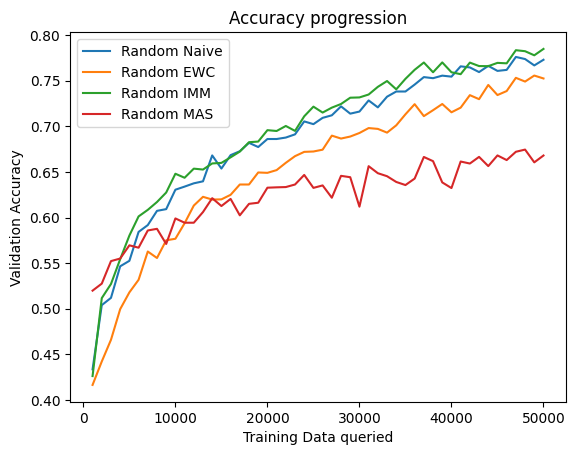

In [93]:
# Evaluation continual and active learning
# Batch size 1k
Random_Naive = [0.4335, 0.5039, 0.5119, 0.5465, 0.5525, 0.5842, 0.5917, 0.6073, 0.6092, 0.6305, 0.6339, 0.6375, 0.6397, 0.6681, 0.6537, 0.6684, 0.6727, 0.6819, 0.6773, 0.6861, 0.6861, 0.6877, 0.6912, 0.7054, 0.7024, 0.7093, 0.7121, 0.7219, 0.7139, 0.7162, 0.7284, 0.7208, 0.7325, 0.7382, 0.7382, 0.7458, 0.754, 0.7528, 0.7556, 0.7545, 0.7658, 0.7646, 0.7595, 0.7663, 0.7608, 0.7619, 0.7761, 0.7738, 0.7668, 0.773]
Random_EWC = [0.4164, 0.4421, 0.4659, 0.4995, 0.5179, 0.5317, 0.5627, 0.5556, 0.575, 0.5767, 0.5937, 0.6131, 0.6227, 0.6197, 0.6199, 0.6249, 0.6362, 0.6362, 0.6494, 0.649, 0.652, 0.66, 0.6673, 0.672, 0.6724, 0.6744, 0.6898, 0.6866, 0.6888, 0.6927, 0.6981, 0.6972, 0.6931, 0.7011, 0.7132, 0.7243, 0.7112, 0.7177, 0.7245, 0.7154, 0.7205, 0.7342, 0.7298, 0.7454, 0.7343, 0.7387, 0.7532, 0.7491, 0.7557, 0.7525]
Random_IMM = [0.4261, 0.5116, 0.5271, 0.5543, 0.5802, 0.6012, 0.6084, 0.617, 0.6274, 0.648, 0.6436, 0.6536, 0.6526, 0.6593, 0.6599, 0.666, 0.6723, 0.6826, 0.6833, 0.6958, 0.6949, 0.7004, 0.695, 0.711, 0.7216, 0.7151, 0.7205, 0.7245, 0.7314, 0.7317, 0.7349, 0.7433, 0.7497, 0.7406, 0.7521, 0.762, 0.77, 0.7593, 0.7701, 0.7593, 0.7572, 0.7699, 0.7661, 0.766, 0.7696, 0.7691, 0.7835, 0.7824, 0.7779, 0.7849]
Random_MAS = [0.5198, 0.5275, 0.5522, 0.555, 0.5695, 0.5669, 0.5858, 0.5876, 0.571, 0.599, 0.5943, 0.5943, 0.606, 0.6212, 0.6126, 0.6204, 0.6024, 0.615, 0.6162, 0.6327, 0.6331, 0.6334, 0.6362, 0.6467, 0.6325, 0.6352, 0.6217, 0.6457, 0.6442, 0.6119, 0.6563, 0.6486, 0.6453, 0.639, 0.6356, 0.6427, 0.6664, 0.6618, 0.6385, 0.6323, 0.6614, 0.6592, 0.6665, 0.6564, 0.6681, 0.663, 0.6721, 0.6745, 0.6605, 0.668]
Lc_EWC = [0.4507, 0.5043, 0.5409, 0.5624, 0.602, 0.6206, 0.634, 0.6438, 0.6537, 0.6612, 0.6802, 0.6788, 0.7075, 0.7236, 0.7261, 0.7202, 0.7388, 0.733, 0.7393, 0.7471, 0.7504, 0.7334, 0.7409, 0.7458, 0.7494, 0.7382, 0.7538, 0.7426, 0.7562, 0.7609, 0.7576, 0.7515, 0.754, 0.7538, 0.76, 0.7523, 0.7544, 0.7612, 0.7422, 0.7563, 0.7638, 0.7655, 0.7551, 0.7561, 0.7463, 0.7734, 0.7586, 0.7676, 0.7624, 0.7664]
Lc_IMM = [0.4345, 0.4698, 0.4913, 0.5326, 0.5519, 0.5705, 0.5783, 0.6207, 0.6375, 0.6464, 0.6524, 0.6564, 0.6772, 0.6737, 0.6786, 0.6833, 0.7029, 0.7091, 0.7222, 0.7271, 0.7317, 0.7283, 0.7309, 0.7371, 0.7424, 0.7459, 0.7331, 0.7468, 0.7436, 0.7539, 0.7451, 0.7544, 0.7472, 0.7499, 0.7563, 0.7663, 0.7551, 0.7697, 0.7626, 0.7562, 0.7623, 0.7595, 0.7529, 0.7681, 0.7651, 0.7497, 0.7594, 0.7716, 0.7571, 0.773]
Lc_Naive = [0.4285, 0.4318, 0.4956, 0.5237, 0.5423, 0.5932, 0.6049, 0.6131, 0.6259, 0.6246, 0.6494, 0.6672, 0.6598, 0.6897, 0.6879, 0.6815, 0.723, 0.7014, 0.6997, 0.6976, 0.7089, 0.699, 0.7349, 0.7271, 0.7439, 0.734, 0.7438, 0.7347, 0.7363, 0.7385, 0.749, 0.7353, 0.7434, 0.6917, 0.7052, 0.7143, 0.6809, 0.6675, 0.6578, 0.6453, 0.6607, 0.6184, 0.6447, 0.6247, 0.6487, 0.6567, 0.6618, 0.624, 0.603, 0.5687]
Lc_MAS = [0.5383, 0.5515, 0.5625, 0.5765, 0.5898, 0.5883, 0.601, 0.5976, 0.5992, 0.5845, 0.603, 0.5984, 0.6036, 0.5967, 0.6141, 0.5964, 0.6024, 0.6013, 0.622, 0.6256, 0.5994, 0.6293, 0.6415, 0.626, 0.6276, 0.6297, 0.6304, 0.6435, 0.6269, 0.6496, 0.6285, 0.6417, 0.6499, 0.6361, 0.6196, 0.6505, 0.6604, 0.6475, 0.6633, 0.6394, 0.6419, 0.6447, 0.6577, 0.6551, 0.6629, 0.663, 0.6715, 0.6686, 0.6798, 0.6649]
Bald_EWC = [0.4352, 0.5067, 0.52, 0.5453, 0.5768, 0.5958, 0.6203, 0.6323, 0.6359, 0.6649, 0.6764, 0.6751, 0.6755, 0.6842, 0.7006, 0.7181, 0.7227, 0.7366, 0.7226, 0.7361, 0.744, 0.7512, 0.7514, 0.728, 0.7469, 0.7588, 0.7522, 0.7488, 0.7523, 0.7579, 0.7551, 0.7588, 0.7466, 0.7608, 0.7577, 0.7651, 0.7507, 0.7521, 0.7687, 0.7575, 0.7653, 0.7634, 0.752, 0.7596, 0.7571, 0.7573, 0.7601, 0.7603, 0.7692, 0.7586]
Bald_IMM = [0.4346, 0.483, 0.5313, 0.5518, 0.573, 0.5794, 0.6228, 0.6301, 0.6373, 0.6411, 0.6527, 0.6586, 0.6793, 0.6815, 0.6757, 0.6802, 0.7052, 0.6944, 0.7071, 0.722, 0.7365, 0.7354, 0.7426, 0.7495, 0.7358, 0.7528, 0.7417, 0.7555, 0.7574, 0.7482, 0.7469, 0.7576, 0.7543, 0.7513, 0.7516, 0.7544, 0.7591, 0.7605, 0.7538, 0.7557, 0.7561, 0.7634, 0.7572, 0.7651, 0.7576, 0.772, 0.7603, 0.7679, 0.7725, 0.7686]
Bald_Naive = [0.413, 0.4852, 0.5187, 0.5488, 0.5681, 0.5982, 0.6105, 0.6218, 0.6454, 0.6461, 0.6587, 0.6774, 0.6867, 0.6969, 0.7031, 0.7147, 0.7401, 0.7227, 0.737, 0.733, 0.7372, 0.7304, 0.7446, 0.7445, 0.7441, 0.7505, 0.7457, 0.7449, 0.7397, 0.7487, 0.7549, 0.7533, 0.7524, 0.7533, 0.7633, 0.7529, 0.7569, 0.7672, 0.7584, 0.7686, 0.7647, 0.7507, 0.7609, 0.7618, 0.7475, 0.7508, 0.7613, 0.7593, 0.7635, 0.7586]
Bald_MAS = [0.5368, 0.5431, 0.5646, 0.5586, 0.5673, 0.5727, 0.5857, 0.574, 0.5809, 0.5961, 0.5974, 0.5729, 0.6035, 0.6048, 0.6135, 0.6132, 0.6242, 0.6081, 0.6188, 0.6334, 0.6294, 0.6397, 0.6253, 0.6316, 0.6394, 0.6424, 0.6398, 0.6224, 0.6259, 0.6544, 0.6475, 0.636, 0.6576, 0.6556, 0.6519, 0.6334, 0.6558, 0.6399, 0.654, 0.6463, 0.6707, 0.6587, 0.6598, 0.6553, 0.6544, 0.6737, 0.6642, 0.67, 0.6707, 0.6662]
Badge_EWC = [0.4282, 0.4723, 0.4729, 0.476, 0.4831, 0.4951, 0.498, 0.4999, 0.5012, 0.5096, 0.5183, 0.5077, 0.5165, 0.5278, 0.532, 0.5353, 0.4638, 0.5319, 0.5316, 0.5426, 0.5567, 0.5586, 0.5623, 0.566, 0.4673, 0.5434, 0.5535, 0.5535, 0.5653, 0.575, 0.5815, 0.5799, 0.5855, 0.5958, 0.6024, 0.5839, 0.5841, 0.609, 0.617, 0.601, 0.6059, 0.5989, 0.6251, 0.6143, 0.6199, 0.6248, 0.6306, 0.6257, 0.6391, 0.6593]
Badge_Naive = [0.4288, 0.4879, 0.5045, 0.5036, 0.5031, 0.5069, 0.5239, 0.5087, 0.5218, 0.5321, 0.5364, 0.5402, 0.5269, 0.5428, 0.5469, 0.5525, 0.5557, 0.5615, 0.5248, 0.53, 0.5336, 0.5511, 0.5516, 0.5403, 0.5442, 0.5578, 0.5623, 0.5653, 0.5731, 0.5557, 0.5641, 0.5743, 0.5726, 0.5858, 0.5889, 0.5721, 0.5877, 0.5884, 0.5758, 0.5779, 0.589, 0.5946, 0.593, 0.6052, 0.5972, 0.6054, 0.6067, 0.6084, 0.6322, 0.6319]
Badge_IMM = [0.4575, 0.5088, 0.5355, 0.5248, 0.5375, 0.5404, 0.5414, 0.5448, 0.5634, 0.5668, 0.5706, 0.568, 0.5705, 0.5798, 0.5891, 0.5954, 0.5994, 0.5825, 0.5735, 0.593, 0.6009, 0.5888, 0.5856, 0.5976, 0.6022, 0.6097, 0.6162, 0.5572, 0.5633, 0.5717, 0.5838, 0.5889, 0.5921, 0.5915, 0.5981, 0.5951, 0.5991, 0.598, 0.6076, 0.6135, 0.5944, 0.5996, 0.6022, 0.6235, 0.628, 0.6166, 0.617, 0.644, 0.6343, 0.6438]
Badge_MAS = [] #started
CoreSet_EWC = [0.4461, 0.4956, 0.5049, 0.5045, 0.501, 0.5169, 0.5125, 0.5191, 0.5283, 0.5339, 0.5389, 0.5398, 0.5021, 0.524, 0.532, 0.5319, 0.5388, 0.5498, 0.5592, 0.5536, 0.5542, 0.5695, 0.5737, 0.5718, 0.5848, 0.589, 0.5932, 0.58, 0.5987, 0.6015, 0.5911, 0.5992, 0.6031, 0.6134, 0.6154, 0.6131, 0.6095, 0.612, 0.6227, 0.6197, 0.623, 0.6238, 0.6255, 0.62, 0.635, 0.6343, 0.6358, 0.64, 0.6453, 0.6554]
CoreSet_IMM = [0.4124, 0.4834, 0.4828, 0.4883, 0.4871, 0.5055, 0.5125, 0.5154, 0.5227, 0.5039, 0.5102, 0.5168, 0.5277, 0.5329, 0.5207, 0.5307, 0.5487, 0.5396, 0.5475, 0.5617, 0.548, 0.5462, 0.5686, 0.5717, 0.5736, 0.5529, 0.5681, 0.5748, 0.579, 0.5737, 0.5726, 0.5837, 0.5794, 0.5935, 0.5844, 0.5845, 0.5933, 0.5825, 0.5826, 0.592, 0.582, 0.5912, 0.6037, 0.5925, 0.5966, 0.6163, 0.6199, 0.6121, 0.6178, 0.6326]
CoreSet_Naive = [] #started
CoreSet_MAS = [0.5349, 0.5578, 0.5548, 0.5418, 0.5485, 0.5441, 0.5466, 0.5485, 0.5476, 0.5422, 0.5601, 0.5555, 0.5566, 0.5591, 0.5463, 0.554, 0.5589, 0.5625, 0.5605, 0.5617, 0.5471, 0.5603, 0.5571, 0.5624, 0.5613, 0.5659, 0.5561, 0.5602, 0.5647, 0.5554, 0.5558, 0.5625, 0.5653, 0.5683, 0.5643, 0.5555, 0.5685, 0.5593, 0.5708, 0.5647, 0.5693, 0.5621, 0.567, 0.56, 0.5647, 0.549, 0.5666, 0.5659, 0.5695, 0.5864]
x = [(i+1)*1000 for i in range(50)]


plt.plot(x[:len(Random_Naive)],Random_Naive,label="Random Naive")
plt.plot(x[:len(Random_EWC)],Random_EWC,label="Random EWC")
plt.plot(x[:len(Random_IMM)],Random_IMM,label="Random IMM")
plt.plot(x[:len(Random_MAS)],Random_MAS,label="Random MAS")
plt.title("Accuracy progression")
plt.xlabel("Training Data queried")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


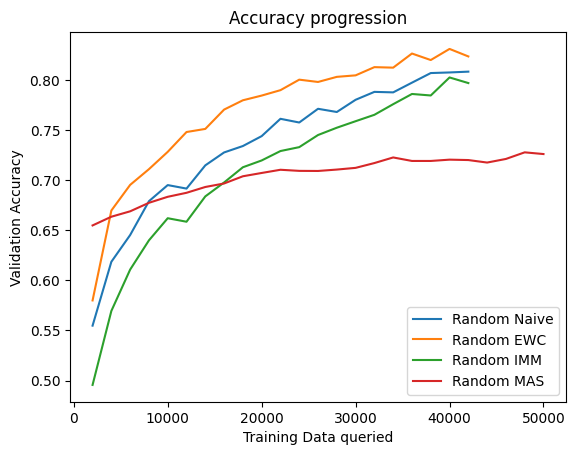

In [94]:
# Evaluation continual and active learning
# Batch size 2k
CoreSet_Naive = [0.5943, 0.6705, 0.6779, 0.6906, 0.6928, 0.6956, 0.6967, 0.7033, 0.712, 0.7084, 0.7082, 0.7138, 0.7202, 0.7189, 0.7255, 0.727, 0.7429, 0.7345, 0.7339, 0.7408, 0.7389]
CoreSet_IMM = [0.5652, 0.6383, 0.6512, 0.6539, 0.663, 0.6693, 0.6688, 0.6829, 0.6821, 0.6861, 0.6939, 0.6899, 0.6966, 0.709, 0.713, 0.7151, 0.7096, 0.7178, 0.7218, 0.7219, 0.7282]
CoreSet_EWC = [0.5287, 0.6049, 0.6153, 0.6302, 0.6402, 0.6406, 0.6522, 0.6593, 0.6621, 0.6755, 0.6786, 0.6755, 0.6813, 0.6838, 0.6933, 0.685, 0.6894, 0.7047, 0.7033, 0.7042, 0.718]
CoreSet_MAS = [0.6471, 0.664, 0.6719, 0.6751, 0.677, 0.6739, 0.6737, 0.6758, 0.676, 0.6774, 0.6776, 0.6782, 0.6792, 0.6791, 0.6802, 0.681, 0.6849, 0.6819, 0.6835, 0.6849, 0.6887]
# Wrong calculation with BALD here
Bald_Naive = [0.5887, 0.6629, 0.6926, 0.7219, 0.7421, 0.7724, 0.7785, 0.7845, 0.7897, 0.8004, 0.7927, 0.7973, 0.8001, 0.8002, 0.8002, 0.7997, 0.8017, 0.8125, 0.8002, 0.8083, 0.8126]
Bald_EWC = [0.5717, 0.6435, 0.6851, 0.7076, 0.7318, 0.7437, 0.7603, 0.7823, 0.7878, 0.7879, 0.7874, 0.7967, 0.7909, 0.7993, 0.8036, 0.8034, 0.8011, 0.7947, 0.8073, 0.8028, 0.8064]
Bald_IMM = [0.527, 0.6072, 0.6567, 0.6869, 0.7074, 0.728, 0.7514, 0.7641, 0.7782, 0.7826, 0.7846, 0.7913, 0.7856, 0.8006, 0.7876, 0.7955, 0.7995, 0.7949, 0.7982, 0.8033, 0.7969]
Bald_MAS = [0.665, 0.6764, 0.6814, 0.6824, 0.6765, 0.6796, 0.6785, 0.6772, 0.6779, 0.6803, 0.6799, 0.6788, 0.6802, 0.6793, 0.6792, 0.6818, 0.6831, 0.6836, 0.6859, 0.6817, 0.6873]
Badge_Naive = [0.5961, 0.6643, 0.6776, 0.6848, 0.6977, 0.6978, 0.7038, 0.712, 0.712, 0.7145, 0.7108, 0.7342, 0.728, 0.7293, 0.7309, 0.7281, 0.7299, 0.7422, 0.745, 0.7459, 0.7534]
Badge_EWC = [0.5859, 0.6544, 0.6649, 0.6741, 0.6774, 0.682, 0.6901, 0.692, 0.6899, 0.6849, 0.7024, 0.7052, 0.6949, 0.697, 0.694, 0.7223, 0.7242, 0.7113, 0.7096, 0.726, 0.7356]
Badge_IMM = [0.5477, 0.6326, 0.6441, 0.6565, 0.655, 0.667, 0.6682, 0.6743, 0.6794, 0.6804, 0.6818, 0.6848, 0.6979, 0.6856, 0.6919, 0.7062, 0.7, 0.706, 0.7055, 0.7105, 0.7098]
Badge_MAS =  [0.665, 0.6764, 0.6814, 0.6824, 0.6765, 0.6796, 0.6785, 0.6772, 0.6779, 0.6803, 0.6799, 0.6788, 0.6802, 0.6793, 0.6792, 0.6818, 0.6831, 0.6836, 0.6859, 0.6817, 0.6873]
Lc_EWC = [0.545, 0.6105, 0.6572, 0.6831, 0.7248, 0.7562, 0.7728, 0.7737, 0.7884, 0.7964, 0.7977, 0.8019, 0.8005, 0.8018, 0.806, 0.8123, 0.8078, 0.8047, 0.8048, 0.8112, 0.803]
Lc_Naive = [0.5575, 0.6346, 0.6781, 0.7041, 0.7298, 0.761, 0.7777, 0.7831, 0.7873, 0.7963, 0.7956, 0.801, 0.8011, 0.8057, 0.8033, 0.8073, 0.8075, 0.8014, 0.81, 0.8168, 0.812]
Lc_IMM = [0.5491, 0.6342, 0.6666, 0.6966, 0.7252, 0.7392, 0.7686, 0.7746, 0.7781, 0.7903, 0.7895, 0.794, 0.7992, 0.8019, 0.7972, 0.8028, 0.8006, 0.8012, 0.8087, 0.8093, 0.8098]
Lc_MAS = [0.6437, 0.6561, 0.6731, 0.6851, 0.6856, 0.6921, 0.6938, 0.6959, 0.7077, 0.7093, 0.7127, 0.7115, 0.7132, 0.7186, 0.7214, 0.7213, 0.7265, 0.733, 0.7302, 0.7361, 0.7371]
Random_EWC = [0.58, 0.6698, 0.6954, 0.7111, 0.7284, 0.7482, 0.7513, 0.7706, 0.7799, 0.7846, 0.79, 0.8005, 0.7982, 0.8033, 0.8048, 0.813, 0.8125, 0.8266, 0.8201, 0.8312, 0.8237]
Random_IMM = [0.4956, 0.5695, 0.6108, 0.64, 0.6621, 0.6586, 0.6839, 0.6978, 0.713, 0.7198, 0.7292, 0.7331, 0.7452, 0.7525, 0.759, 0.7654, 0.776, 0.7862, 0.7847, 0.8027, 0.7971]
Random_Naive = [0.5548, 0.6186, 0.6453, 0.6791, 0.6952, 0.6917, 0.7149, 0.7278, 0.7342, 0.7441, 0.7614, 0.7577, 0.7714, 0.7682, 0.7804, 0.7883, 0.7878, 0.7975, 0.8071, 0.8077, 0.8085]
Random_MAS = [0.6549, 0.6636, 0.669, 0.6775, 0.6835, 0.6875, 0.6933, 0.6968, 0.704, 0.7073, 0.7105, 0.7094, 0.7093, 0.7107, 0.7124, 0.7172, 0.7228, 0.7193, 0.7193, 0.7206, 0.7202, 0.7177, 0.7213, 0.7279, 0.7262]

x = [(i+1)*2000 for i in range(25)]
plt.plot(x[:len(Random_Naive)],Random_Naive,label="Random Naive")
plt.plot(x[:len(Random_EWC)],Random_EWC,label="Random EWC")
plt.plot(x[:len(Random_IMM)],Random_IMM,label="Random IMM")
plt.plot(x[:len(Random_MAS)],Random_MAS,label="Random MAS")
plt.title("Accuracy progression")
plt.xlabel("Training Data queried")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

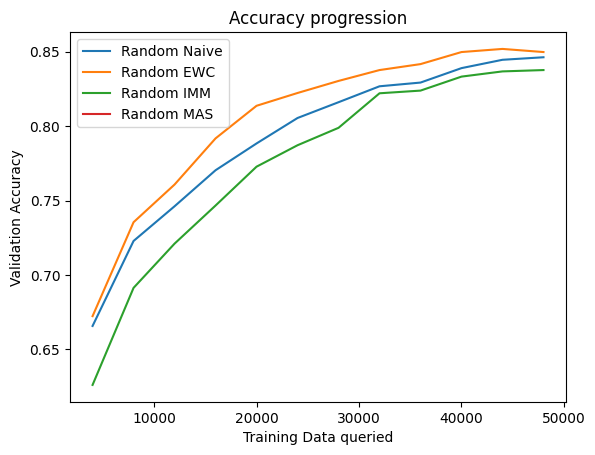

In [95]:
# Evaluation continual and active learning
# Batch size 4k
CoreSet_Naive = [0.6657, 0.7546, 0.7741, 0.7872, 0.7934, 0.8001, 0.8032, 0.8113, 0.8168, 0.8202, 0.8201, 0.8265]
CoreSet_EWC = [0.6752, 0.7518, 0.7749, 0.7831, 0.7985, 0.8054, 0.8108, 0.8103, 0.8162, 0.8228, 0.8247, 0.8266]
CoreSet_IMM = [0.6622, 0.7612, 0.7856, 0.7911, 0.7953, 0.7978, 0.8067, 0.8111, 0.8139, 0.8201, 0.8282, 0.8299]
Coreset_MAS = []
Badge_IMM = [0.7275, 0.7926, 0.7991, 0.8123, 0.8177, 0.8143, 0.8235, 0.8302, 0.8244, 0.8315, 0.8352, 0.8325]
Badge_EWC = [0.6766, 0.7509, 0.7775, 0.7901, 0.7955, 0.8025, 0.8074, 0.8095, 0.8124, 0.8192, 0.8209, 0.8257]
Badge_Naive = [0.6852, 0.7711, 0.7915, 0.8001, 0.8053, 0.8129, 0.8122, 0.8137, 0.8196, 0.8224, 0.8252, 0.8328]
Badge_MAS = []
# Wrong calculation with BALD here
Bald_EWC = [0.7277, 0.7961, 0.8258, 0.8369, 0.8422, 0.8495, 0.8457, 0.8519, 0.8532, 0.8543, 0.8526, 0.8501]
Bald_IMM = [0.7074, 0.7833, 0.8116, 0.8254, 0.8362, 0.8396, 0.8441, 0.8477, 0.8419, 0.8504, 0.8448, 0.8426]
Bald_Naive = [0.7207, 0.7912, 0.8191, 0.837, 0.8398, 0.8437, 0.8473, 0.8487, 0.8482, 0.8413, 0.8495, 0.8483]
Bald_MAS = 
Lc_Naive = [0.685, 0.7713, 0.8171, 0.8207, 0.8315, 0.8391, 0.8495, 0.8424, 0.844, 0.8395, 0.843, 0.8417]
Lc_EWC = [0.7144, 0.7866, 0.8263, 0.8296, 0.8398, 0.8447, 0.8433, 0.8445, 0.846, 0.8451, 0.8469, 0.8479]
Lc_IMM = [0.7205, 0.779, 0.8157, 0.8299, 0.8335, 0.8345, 0.8476, 0.8396, 0.8417, 0.8428, 0.8458, 0.8462]
Lc_MAS = [0.7696, 0.7825, 0.7877, 0.7937, 0.7999, 0.8024, 0.8071, 0.8105, 0.8137, 0.8088, 0.8096, 0.8114, 0.806]
Random_EWC = [0.6724, 0.7355, 0.7608, 0.7918, 0.8137, 0.8223, 0.8304, 0.8377, 0.8417, 0.8498, 0.8519, 0.8498]
Random_IMM = [0.6262, 0.6914, 0.7211, 0.7467, 0.7728, 0.7872, 0.7989, 0.8221, 0.8239, 0.8333, 0.8368, 0.8377]
Random_Naive = [0.6658, 0.7229, 0.7462, 0.7704, 0.7884, 0.8055, 0.8161, 0.8268, 0.8293, 0.839, 0.8446, 0.8463]
Random_MAS = [0.7777, 0.7902, 0.8003, 0.8075, 0.8132, 0.8173, 0.8206, 0.8189, 0.8225, 0.825, 0.8231, 0.8258, 0.8229]

x = [(i+1)*4000 for i in range(12)] + [50000]
plt.plot(x[:len(Random_Naive)],Random_Naive,label="Random Naive")
plt.plot(x[:len(Random_EWC)],Random_EWC,label="Random EWC")
plt.plot(x[:len(Random_IMM)],Random_IMM,label="Random IMM")
plt.plot(x[:len(Random_MAS)],Random_MAS,label="Random MAS")
plt.title("Accuracy progression")
plt.xlabel("Training Data queried")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

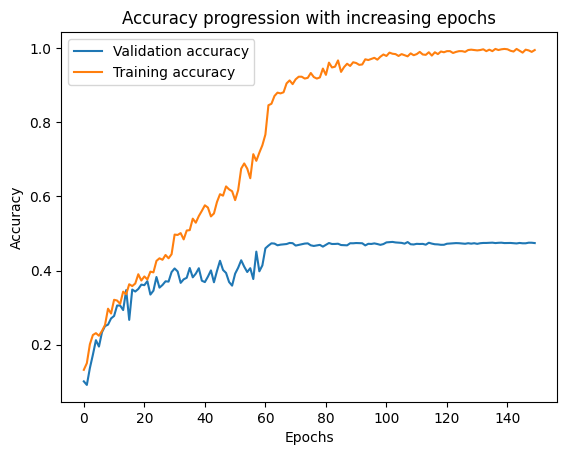

In [62]:
val_acc = [0.1009, 0.0913, 0.1367, 0.1729, 0.212, 0.1948, 0.2335, 0.25, 0.254, 0.2707, 0.2774, 0.3056, 0.3055,
            0.2933, 0.3472, 0.2668, 0.3486, 0.3433, 0.3502, 0.3619, 0.3605, 0.3714, 0.3351, 0.3456, 0.3825, 0.3538,
              0.361, 0.3709, 0.3701, 0.3959, 0.4056, 0.3975, 0.3667, 0.3763, 0.3804, 0.4068, 0.3816, 0.3916, 0.4062,
                0.3725, 0.3688, 0.3834, 0.4003, 0.3683, 0.3989, 0.4263, 0.4015, 0.3935, 0.369, 0.3592, 0.3915, 0.4075,
                  0.4277, 0.4104, 0.396, 0.4063, 0.377, 0.451, 0.3979, 0.4138, 0.4599, 0.4672, 0.4734, 0.4727, 0.4681,
                    0.4698, 0.4705, 0.4715, 0.4744, 0.4738, 0.4673, 0.469, 0.4708, 0.4727, 0.4733, 0.468, 0.4663, 0.4679,
                      0.4692, 0.4645, 0.4692, 0.4742, 0.4716, 0.4717, 0.4723, 0.4688, 0.4683, 0.468, 0.4736, 0.4735, 0.4742,
                        0.4739, 0.4736, 0.4678, 0.4721, 0.4717, 0.4732, 0.4715, 0.4693, 0.4714, 0.4759, 0.4767, 0.4772, 0.4758,
                          0.4753, 0.4746, 0.4725, 0.4768, 0.4709, 0.4703, 0.472, 0.4716, 0.4719, 0.4697, 0.475, 0.4726, 0.4709,
                            0.4705, 0.4694, 0.4695, 0.4723, 0.4728, 0.4735, 0.474, 0.4737, 0.4728, 0.4722, 0.4737, 0.4725, 0.4737,
                              0.472, 0.4737, 0.4744, 0.4744, 0.4749, 0.4752, 0.4741, 0.4748, 0.4751, 0.4741, 0.4743, 0.4744, 0.4736,
                                0.4731, 0.4744, 0.4735, 0.4735, 0.4751, 0.475, 0.4741]

train_acc = [0.132, 0.15, 0.201, 0.226, 0.231, 0.224, 0.237, 0.253, 0.297, 0.284, 0.321, 0.319, 0.31, 0.343, 0.336,
              0.363, 0.358, 0.365, 0.39, 0.373, 0.384, 0.376, 0.397, 0.395, 0.426, 0.433, 0.429, 0.442, 0.433, 0.444,
                0.497, 0.496, 0.501, 0.484, 0.508, 0.509, 0.54, 0.529, 0.547, 0.561, 0.576, 0.57, 0.546, 0.554, 0.585,
                  0.606, 0.602, 0.627, 0.619, 0.614, 0.59, 0.617, 0.675, 0.689, 0.675, 0.649, 0.714, 0.696, 0.718, 0.738,
                    0.767, 0.846, 0.85, 0.871, 0.88, 0.878, 0.881, 0.905, 0.913, 0.903, 0.916, 0.923, 0.923, 0.918, 0.92,
                      0.933, 0.922, 0.918, 0.921, 0.945, 0.928, 0.961, 0.948, 0.95, 0.967, 0.936, 0.949, 0.958, 0.952, 0.962,
                        0.96, 0.955, 0.956, 0.97, 0.968, 0.971, 0.974, 0.969, 0.977, 0.983, 0.979, 0.988, 0.985, 0.984, 0.979,
                          0.984, 0.981, 0.978, 0.986, 0.981, 0.984, 0.99, 0.983, 0.982, 0.989, 0.98, 0.989, 0.984, 0.991, 0.989,
                            0.992, 0.992, 0.987, 0.99, 0.992, 0.992, 0.99, 0.995, 0.996, 0.995, 0.994, 0.995, 0.997, 0.992, 0.996,
                              0.992, 0.998, 0.995, 0.997, 0.998, 0.997, 0.993, 0.991, 0.998, 0.993, 0.988, 0.996, 0.994, 0.99, 0.995]

val_loss = [0.2204, 0.0642, 0.0558, 0.0197, 0.0179, 0.0162, 0.0158, 0.0157, 0.015, 0.0156, 0.0149, 0.0144, 0.0153, 0.0151,
             0.014, 0.0158, 0.0138, 0.0141, 0.0143, 0.0139, 0.0136, 0.0137, 0.0146, 0.0145, 0.0133, 0.014, 0.0145, 0.0139,
               0.0146, 0.0136, 0.0134, 0.0142, 0.0147, 0.0143, 0.015, 0.0138, 0.0144, 0.0151, 0.0141, 0.0152, 0.016, 0.0154,
                 0.0153, 0.0181, 0.0163, 0.0145, 0.0165, 0.015, 0.0167, 0.0185, 0.0156, 0.0165, 0.0161, 0.018, 0.0183, 0.0164,
                   0.0192, 0.0166, 0.0176, 0.0199, 0.0171, 0.0163, 0.016, 0.0167, 0.0172, 0.0177, 0.0178, 0.0183, 0.0184, 0.0186,
                     0.0191, 0.0193, 0.0194, 0.0194, 0.0197, 0.0203, 0.0204, 0.0202, 0.0205, 0.0206, 0.0212, 0.0211, 0.0212, 0.0213,
                       0.0219, 0.0218, 0.022, 0.022, 0.0221, 0.0221, 0.0223, 0.0222, 0.0227, 0.0234, 0.0232, 0.0234, 0.0235, 0.0234,
                         0.0236, 0.0239, 0.0236, 0.0237, 0.024, 0.0242, 0.0244, 0.0245, 0.0248, 0.0248, 0.025, 0.0252, 0.0252, 0.0258,
                           0.0252, 0.0258, 0.0256, 0.0258, 0.026, 0.026, 0.0265, 0.0263, 0.0258, 0.0261, 0.026, 0.0258, 0.0259, 0.0259,
                             0.0258, 0.0258, 0.0256, 0.0257, 0.0258, 0.0258, 0.026, 0.0259, 0.0261, 0.0259, 0.0258, 0.0261, 0.026, 0.0259,
                               0.026, 0.0259, 0.026, 0.0263, 0.0261, 0.0262, 0.0263, 0.0261, 0.0262, 0.0264]

train_loss = [0.0345, 0.0214, 0.0173, 0.0165, 0.0161, 0.0157, 0.0155, 0.0151, 0.0149, 0.0147, 0.0144, 0.0143, 0.0142, 0.0141,
               0.0141, 0.0135, 0.0134, 0.0131, 0.013, 0.0133, 0.0129, 0.0127, 0.0124, 0.0125, 0.0122, 0.0121, 0.0118, 0.0115,
                 0.0115, 0.0115, 0.0109, 0.0106, 0.0106, 0.0108, 0.01, 0.0105, 0.01, 0.01, 0.0098, 0.0096, 0.0089, 0.0093, 0.0095,
                   0.0095, 0.0091, 0.0082, 0.0086, 0.0079, 0.0081, 0.0085, 0.0087, 0.0079, 0.0069, 0.0068, 0.0073, 0.0078, 0.0068,
                     0.0068, 0.0059, 0.0058, 0.0051, 0.0036, 0.0035, 0.0029, 0.0029, 0.0026, 0.0026, 0.0023, 0.0022, 0.0024, 0.002,
                       0.002, 0.0019, 0.002, 0.002, 0.0018, 0.0019, 0.0019, 0.0019, 0.0015, 0.0016, 0.0013, 0.0015, 0.0014, 0.0012,
                         0.0015, 0.0013, 0.0012, 0.0012, 0.0011, 0.0011, 0.0011, 0.0011, 0.001, 0.0009, 0.0009, 0.0009, 0.0009, 0.0008,
                           0.0007, 0.0007, 0.0006, 0.0006, 0.0006, 0.0007, 0.0005, 0.0006, 0.0006, 0.0005, 0.0006, 0.0006, 0.0005, 0.0005,
                             0.0006, 0.0005, 0.0006, 0.0004, 0.0005, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0003, 0.0003, 0.0003,
                               0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0002, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0002, 0.0002,
                                 0.0003, 0.0003, 0.0002, 0.0003, 0.0004, 0.0002, 0.0003, 0.0003, 0.0002]

plt.plot(val_acc,label="Validation accuracy")
plt.plot(train_acc,label="Training accuracy")
plt.legend()
plt.title("Accuracy progression with increasing epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [5]:
sns.set()
sns.set_style("dark")

def plt_props():
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.style'] = 'normal'
    plt.rcParams['font.variant'] = 'normal' 
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['figure.titlesize'] = 12
    plt.rcParams['figure.figsize'] = 6, 4
    plt.rcParams['lines.linewidth'] = 2.5
    plt.rcParams['lines.markersize'] = 4



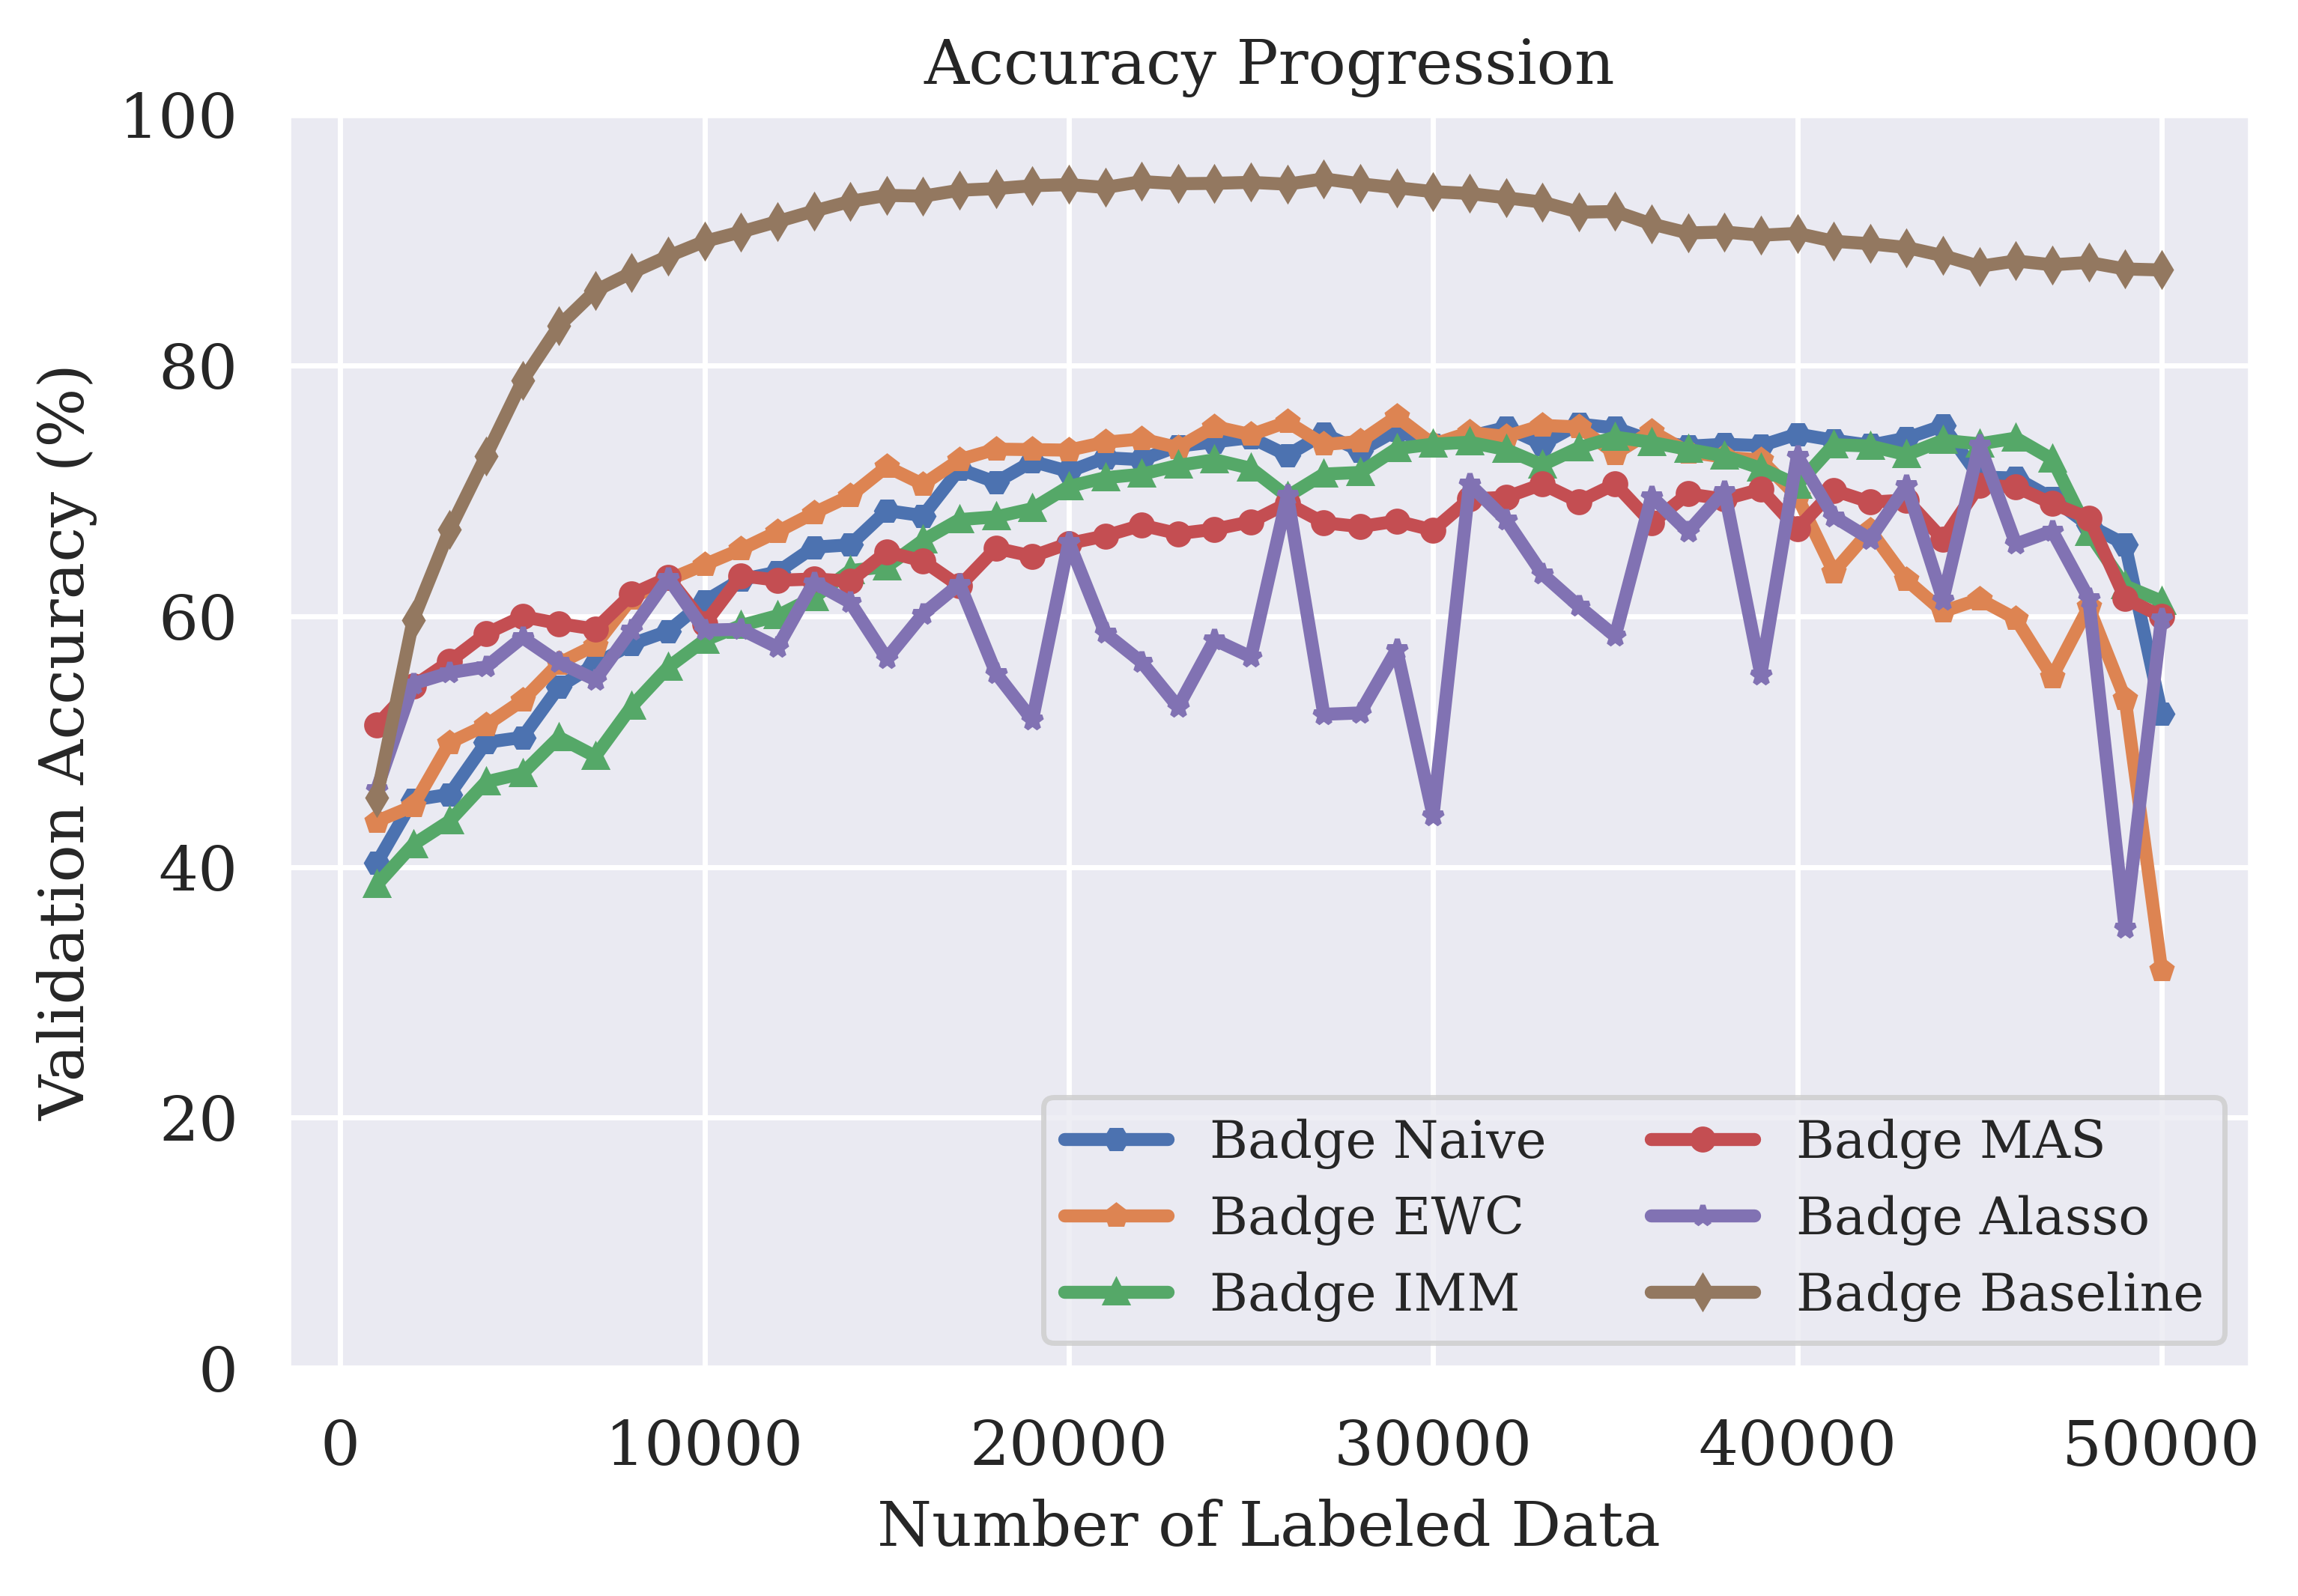

(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
(0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
(0.3333333333333333, 0.6588235294117647, 0.40784313725490196)
(0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
(0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
(0.5764705882352941, 0.47058823529411764, 0.3764705882352941)


In [10]:
# 1000 Queries accuracy
Lc_Naive_acc = [0.484, 0.5058, 0.5473, 0.5779, 0.6063, 0.6184, 0.6191, 0.6423, 0.6611, 0.6604, 0.694, 0.6887, 0.7051, 0.7064, 0.7074, 0.7028, 0.7133, 0.7266, 0.7211, 0.7437, 0.7327, 0.741, 0.7313, 0.7398, 0.7062, 0.7421, 0.7316, 0.7214, 0.7266, 0.734, 0.7301, 0.7442, 0.73, 0.7382, 0.723, 0.6995, 0.6915, 0.6186, 0.6154, 0.6038, 0.5495, 0.6274, 0.6214, 0.6323, 0.6122, 0.6192, 0.5943, 0.5568, 0.5778, 0.4225]
Lc_MAS_acc = [0.5095, 0.5498, 0.5549, 0.5686, 0.5469, 0.5453, 0.5528, 0.5731, 0.5761, 0.5845, 0.575, 0.6128, 0.6136, 0.5937, 0.5951, 0.6163, 0.6156, 0.6284, 0.6036, 0.6372, 0.6346, 0.6294, 0.6194, 0.6461, 0.6401, 0.6465, 0.6462, 0.6608, 0.6519, 0.6642, 0.6325, 0.6601, 0.666, 0.6641, 0.6575, 0.6675, 0.6696, 0.6776, 0.6751, 0.6608, 0.6555, 0.6856, 0.6532, 0.652, 0.6844, 0.6644, 0.6476, 0.6412, 0.6488, 0.6203]
Lc_IMM_acc = [0.4309, 0.4491, 0.5503, 0.5948, 0.5924, 0.6164, 0.6378, 0.6395, 0.6523, 0.6949, 0.7091, 0.6999, 0.7081, 0.6995, 0.7221, 0.7104, 0.7373, 0.7244, 0.742, 0.732, 0.7276, 0.7372, 0.724, 0.7356, 0.7305, 0.7427, 0.736, 0.7365, 0.7252, 0.7123, 0.7349, 0.7257, 0.7174, 0.729, 0.7327, 0.7216, 0.7293, 0.699, 0.6865, 0.6551, 0.6431, 0.5986, 0.5153, 0.5653, 0.5921, 0.5483, 0.6286, 0.6026, 0.5529, 0.5354]
Lc_EWC_acc = [0.4195, 0.3747, 0.4423, 0.451, 0.478, 0.4774, 0.5147, 0.5532, 0.5603, 0.5813, 0.6041, 0.6106, 0.6194, 0.6527, 0.6784, 0.6887, 0.6893, 0.7146, 0.6823, 0.7272, 0.7144, 0.7188, 0.7186, 0.7157, 0.7286, 0.7333, 0.7463, 0.7468, 0.7328, 0.7356, 0.7428, 0.7298, 0.7501, 0.7292, 0.7271, 0.7253, 0.7208, 0.7037, 0.7011, 0.7165, 0.6674, 0.6422, 0.5748, 0.531, 0.4714, 0.4078, 0.4856, 0.5665, 0.5209, 0.338]
Lc_EWC_scheduler_acc =  [0.4451, 0.4243, 0.5203, 0.5124, 0.5535, 0.5763, 0.605, 0.6079, 0.619, 0.6193, 0.6028, 0.6473, 0.6542, 0.6681, 0.6737, 0.6842, 0.688, 0.6697, 0.7095, 0.6971, 0.7065, 0.7274, 0.7023, 0.7186, 0.7346, 0.7125, 0.7246, 0.7124, 0.718, 0.703, 0.7324, 0.7233, 0.7296, 0.7149, 0.7081, 0.7127, 0.722, 0.7215, 0.7222, 0.7109, 0.7086, 0.7166, 0.7245, 0.7244, 0.7301, 0.7513, 0.7074, 0.7285, 0.72, 0.721]
Lc_MAS_scheduler_acc = [0.534, 0.5642, 0.5665, 0.5908, 0.5836, 0.6223, 0.6164, 0.6227, 0.6315, 0.6351, 0.6523, 0.6495, 0.6598, 0.6592, 0.6478, 0.6516, 0.6636, 0.6707, 0.6637, 0.679, 0.6663, 0.6743, 0.6698, 0.6811, 0.6725, 0.6933, 0.6975, 0.6862, 0.6915, 0.7027, 0.7025, 0.7055, 0.7099, 0.7105, 0.7128, 0.7152, 0.7159, 0.7149, 0.7135, 0.7139, 0.7196, 0.7178, 0.7204, 0.7166, 0.7195, 0.7255, 0.7242, 0.7243, 0.7271, 0.7239]
Lc_IMM_scheduler_acc = [0.4148, 0.4287, 0.4986, 0.4816, 0.5066, 0.5366, 0.5538, 0.5836, 0.5909, 0.6119, 0.6409, 0.6462, 0.6523, 0.6758, 0.6757, 0.6987, 0.6841, 0.681, 0.695, 0.6958, 0.7191, 0.7035, 0.7264, 0.7273, 0.7066, 0.7059, 0.698, 0.7087, 0.6967, 0.7279, 0.7236, 0.6902, 0.7147, 0.709, 0.7268, 0.7025, 0.7287, 0.736, 0.7297, 0.7374, 0.7289, 0.7203, 0.7351, 0.7077, 0.7096, 0.7225, 0.7415, 0.715, 0.7421, 0.7308]
Lc_Alasso_acc = [0.5016, 0.5754, 0.5672, 0.5539, 0.615, 0.5812, 0.5764, 0.5863, 0.599, 0.5718, 0.524, 0.5201, 0.4093, 0.4657, 0.4485, 0.5787, 0.6143, 0.4849, 0.5896, 0.5907, 0.6541, 0.6675, 0.4264, 0.5014, 0.6993, 0.6042, 0.5837, 0.5646, 0.5202, 0.703, 0.6146, 0.6471, 0.6095, 0.5795, 0.4619, 0.4665, 0.4532, 0.546, 0.5471, 0.5908, 0.5271, 0.6517, 0.6416, 0.5977, 0.5772, 0.6663, 0.6311, 0.6019, 0.5968, 0.5671]

Random_MAS_acc = [0.5414, 0.5645, 0.5589, 0.5623, 0.5652, 0.5741, 0.598, 0.5971, 0.5956, 0.5984, 0.5881, 0.5987, 0.6269, 0.6196, 0.608, 0.6293, 0.6287, 0.63, 0.6306, 0.6128, 0.6353, 0.6396, 0.6286, 0.637, 0.6323, 0.6419, 0.6414, 0.6382, 0.6459, 0.6421, 0.6347, 0.6469, 0.6595, 0.6599, 0.6491, 0.6591, 0.6552, 0.6541, 0.6526, 0.6729, 0.6471, 0.6615, 0.6657, 0.6602, 0.6635, 0.6721, 0.6608, 0.6587, 0.6656, 0.6669]
Random_MAS_scheduler_acc = [0.5081, 0.5518, 0.5644, 0.5675, 0.5722, 0.5719, 0.5723, 0.5729, 0.5731, 0.5742, 0.5726, 0.5723, 0.5729, 0.5728, 0.571, 0.5717, 0.5707, 0.572, 0.5716, 0.5724, 0.5732, 0.5721, 0.5708, 0.5711, 0.5721, 0.5708, 0.5711, 0.5708, 0.5718, 0.5724, 0.5724, 0.5717, 0.5713, 0.5718, 0.5729, 0.5713, 0.5708, 0.5712, 0.5702, 0.5706, 0.5715, 0.5723, 0.5719, 0.5713, 0.5716, 0.571, 0.5715, 0.5724, 0.5715, 0.5729]
Random_IMM_acc = [0.4857, 0.5547, 0.5831, 0.5956, 0.6216, 0.6383, 0.6498, 0.6518, 0.6577, 0.6754, 0.6738, 0.6781, 0.6843, 0.6889, 0.7036, 0.7004, 0.7142, 0.7173, 0.725, 0.7261, 0.7345, 0.7453, 0.7396, 0.7451, 0.7488, 0.7502, 0.7541, 0.7501, 0.7701, 0.7513, 0.7707, 0.7645, 0.7665, 0.7754, 0.7732, 0.7729, 0.7759, 0.7785, 0.7851, 0.7865, 0.7939, 0.7874, 0.7912, 0.7934, 0.7912, 0.7941, 0.7836, 0.7988, 0.7906, 0.7912]
Random_IMM_scheduler_acc = [0.4429, 0.4831, 0.4885, 0.4894, 0.4845, 0.4871, 0.4961, 0.5001, 0.4981, 0.4993, 0.5007, 0.5032, 0.5018, 0.5032, 0.5029, 0.5039, 0.4927, 0.504, 0.5048, 0.5109, 0.5102, 0.5136, 0.5137, 0.5154, 0.5139, 0.5153, 0.5171, 0.517, 0.503, 0.5094, 0.5119, 0.5134, 0.5153, 0.5164, 0.5104, 0.5088, 0.5195, 0.5218, 0.5217, 0.5251, 0.525, 0.5255, 0.5255, 0.5279, 0.5285, 0.5295, 0.5314, 0.5321, 0.5308, 0.5349]
Random_EWC_acc = [0.4123, 0.4601, 0.4994, 0.5196, 0.5613, 0.5722, 0.5864, 0.5906, 0.6204, 0.6174, 0.619, 0.6358, 0.6455, 0.6424, 0.6498, 0.6439, 0.6558, 0.6612, 0.6552, 0.6731, 0.683, 0.6875, 0.6685, 0.6848, 0.6958, 0.7021, 0.6915, 0.6986, 0.6998, 0.707, 0.716, 0.7361, 0.7173, 0.7249, 0.731, 0.7265, 0.7375, 0.7341, 0.7317, 0.7531, 0.7492, 0.7464, 0.7685, 0.7526, 0.7579, 0.7631, 0.7754, 0.7575, 0.7719, 0.7635]
Random_EWC_scheduler_acc =  [0.4091, 0.4678, 0.4798, 0.4771, 0.4862, 0.4857, 0.4841, 0.4855, 0.4829, 0.4909, 0.4937, 0.4906, 0.4939, 0.4941, 0.4899, 0.4954, 0.5001, 0.4972, 0.4988, 0.4967, 0.5013, 0.4983, 0.4874, 0.4926, 0.4969, 0.4996, 0.5043, 0.505, 0.5022, 0.5042, 0.5069, 0.5069, 0.5094, 0.5093, 0.5099, 0.5113, 0.5127, 0.513, 0.5118, 0.5119, 0.5151, 0.5049, 0.5294, 0.5204, 0.5344, 0.5218, 0.5314, 0.5337, 0.5357, 0.5366]
Random_Naive_acc = [0.4063, 0.4614, 0.5059, 0.5256, 0.557, 0.5725, 0.5865, 0.5933, 0.607, 0.633, 0.6288, 0.651, 0.6434, 0.6495, 0.6543, 0.6468, 0.6534, 0.6702, 0.6732, 0.6879, 0.6936, 0.6921, 0.6888, 0.7023, 0.6932, 0.7119, 0.7183, 0.7211, 0.7351, 0.7287, 0.7367, 0.7387, 0.7388, 0.7347, 0.7535, 0.7519, 0.7619, 0.7633, 0.7612, 0.768, 0.7665, 0.765, 0.7752, 0.7744, 0.7864, 0.778, 0.7652, 0.7758, 0.7849, 0.7888]
Random_Alasso_acc = [0.4455, 0.5368, 0.5352, 0.5494, 0.5534, 0.5401, 0.5751, 0.5871, 0.5208, 0.5628, 0.5914, 0.6169, 0.6129, 0.6153, 0.5732, 0.6129, 0.6271, 0.6306, 0.6458, 0.5763, 0.6268, 0.6428, 0.6402, 0.5251, 0.6341, 0.6442, 0.6508, 0.5774, 0.5501, 0.6192, 0.6547, 0.6551, 0.6659, 0.5442, 0.6574, 0.6667, 0.6692, 0.5002, 0.6588, 0.6587, 0.6718, 0.6619, 0.6747, 0.662, 0.6379, 0.6969, 0.7057, 0.7069, 0.5995, 0.66]

Bald_Naive_acc = [0.4324, 0.4378, 0.4665, 0.5005, 0.5089, 0.5644, 0.5508, 0.5928, 0.5972, 0.6058, 0.6043, 0.6308, 0.6265, 0.6652, 0.6673, 0.6862, 0.6393, 0.6988, 0.6758, 0.6993, 0.6869, 0.6876, 0.7217, 0.7227, 0.7123, 0.7175, 0.7038, 0.7205, 0.7143, 0.7083, 0.6987, 0.7079, 0.6903, 0.6733, 0.7192, 0.7325, 0.7149, 0.695, 0.6963, 0.6547, 0.5834, 0.5881, 0.5515, 0.5206, 0.5775, 0.5436, 0.6089, 0.5544, 0.571, 0.5166]
Bald_EWC_acc = [0.3978, 0.3948, 0.43, 0.4806, 0.4955, 0.5053, 0.5357, 0.5551, 0.5925, 0.5772, 0.6215, 0.6393, 0.6403, 0.6302, 0.6834, 0.6393, 0.692, 0.6704, 0.7094, 0.7027, 0.7131, 0.6922, 0.718, 0.712, 0.7206, 0.7226, 0.7319, 0.7244, 0.7313, 0.7316, 0.722, 0.7321, 0.7307, 0.7176, 0.7034, 0.7109, 0.719, 0.7016, 0.6918, 0.6942, 0.6551, 0.5919, 0.5106, 0.5204, 0.5209, 0.5677, 0.4936, 0.5382, 0.5794, 0.4456]
Bald_IMM_acc = [0.4355, 0.4138, 0.502, 0.5221, 0.5394, 0.5638, 0.5595, 0.6165, 0.5828, 0.6025, 0.6324, 0.6185, 0.6421, 0.6194, 0.6366, 0.6619, 0.6727, 0.6955, 0.6946, 0.7082, 0.7065, 0.7132, 0.6897, 0.7108, 0.6785, 0.7135, 0.7063, 0.7199, 0.6798, 0.6975, 0.6636, 0.6849, 0.6763, 0.7039, 0.7004, 0.6898, 0.6051, 0.6457, 0.6089, 0.658, 0.6492, 0.6565, 0.6567, 0.664, 0.6279, 0.6187, 0.6265, 0.5885, 0.5525, 0.5123]
Bald_MAS_acc = [0.5207, 0.5282, 0.5447, 0.5572, 0.5472, 0.5633, 0.5729, 0.5852, 0.5738, 0.6018, 0.5938, 0.5967, 0.5983, 0.5871, 0.5986, 0.5791, 0.5994, 0.617, 0.6251, 0.624, 0.631, 0.631, 0.6186, 0.6444, 0.6322, 0.6614, 0.6569, 0.6314, 0.6538, 0.6563, 0.6577, 0.652, 0.6316, 0.619, 0.656, 0.663, 0.6641, 0.6721, 0.6636, 0.6752, 0.6837, 0.6651, 0.6513, 0.6449, 0.6614, 0.6662, 0.6541, 0.6412, 0.6411, 0.5745]
Bald_MAS_scheduler_acc = [0.5185, 0.5254, 0.5545, 0.5633, 0.5819, 0.5828, 0.5991, 0.6118, 0.602, 0.599, 0.6279, 0.6169, 0.6179, 0.6104, 0.6071, 0.6462, 0.6339, 0.6195, 0.6506, 0.628, 0.6482, 0.6492, 0.6632, 0.645, 0.678, 0.6758, 0.6741, 0.68, 0.6694, 0.6668, 0.6793, 0.6722, 0.6702, 0.6862, 0.6848, 0.6739, 0.6925, 0.684, 0.6886, 0.6871, 0.6893, 0.6899, 0.6976, 0.6953, 0.694, 0.7013, 0.7015, 0.6964, 0.6956, 0.6995]
Bald_Alasso_acc = [0.4594, 0.5187, 0.5075, 0.534, 0.5562, 0.5409, 0.5817, 0.5482, 0.6409, 0.6258, 0.5898, 0.4229, 0.6384, 0.6321, 0.6135, 0.5992, 0.6012, 0.5857, 0.631, 0.4919, 0.5705, 0.6834, 0.639, 0.6439, 0.4033, 0.699, 0.6263, 0.7345, 0.6409, 0.6947, 0.2346, 0.6934, 0.7102, 0.6803, 0.6784, 0.4556, 0.7114, 0.6905, 0.5708, 0.748, 0.59, 0.6582, 0.7587, 0.72, 0.7303, 0.6858, 0.7035, 0.7468, 0.7179, 0.7316]

CoreSet_IMM_acc = [0.4094, 0.4555, 0.4987, 0.5291, 0.5659, 0.5861, 0.6039, 0.5985, 0.6214, 0.6301, 0.647, 0.6541, 0.6704, 0.655, 0.6707, 0.6868, 0.625, 0.6752, 0.6865, 0.6972, 0.6692, 0.6511, 0.611, 0.6697, 0.6499, 0.7006, 0.5958, 0.7153, 0.7301, 0.7242, 0.7293, 0.7292, 0.7328, 0.7245, 0.7195, 0.6867, 0.6573, 0.7162, 0.7137, 0.7341, 0.7205, 0.7254, 0.6728, 0.702, 0.6982, 0.7027, 0.6457, 0.6343, 0.6734, 0.4869]
CoreSet_MAS_acc =  [0.5041, 0.4827, 0.4867, 0.5158, 0.5393, 0.5445, 0.5534, 0.554, 0.5624, 0.5636, 0.5577, 0.581, 0.5696, 0.5693, 0.5828, 0.5802, 0.5898, 0.5827, 0.5906, 0.5919, 0.5973, 0.6058, 0.6141, 0.6097, 0.5924, 0.5985, 0.6262, 0.6089, 0.6224, 0.6102, 0.6341, 0.6123, 0.6135, 0.6201, 0.6117, 0.6224, 0.6344, 0.6306, 0.6183, 0.63, 0.639, 0.6305, 0.6161, 0.617, 0.6205, 0.6056, 0.6067, 0.5994, 0.6114, 0.5621]
CoreSet_MAS_scheduler_acc = [0.5181, 0.5361, 0.5484, 0.5824, 0.5831, 0.5824, 0.6131, 0.6165, 0.6248, 0.6175, 0.6393, 0.6425, 0.6383, 0.6286, 0.6457, 0.6409, 0.652, 0.6564, 0.6373, 0.6682, 0.6612, 0.6544, 0.6737, 0.6733, 0.6742, 0.683, 0.6908, 0.6964, 0.6864, 0.6947, 0.6988, 0.6996, 0.7078, 0.7052, 0.7029, 0.7123, 0.7207, 0.7207, 0.714, 0.7174, 0.7219, 0.7232, 0.7222, 0.7254, 0.7272, 0.7268, 0.7289, 0.7288, 0.7301, 0.7287]
CoreSet_EWC_acc = [0.4437, 0.4689, 0.5144, 0.5494, 0.585, 0.626, 0.6121, 0.6397, 0.6408, 0.6627, 0.6662, 0.6717, 0.6935, 0.6563, 0.6719, 0.6463, 0.6923, 0.6826, 0.7191, 0.6973, 0.6963, 0.6901, 0.6959, 0.6951, 0.7047, 0.6858, 0.7235, 0.7131, 0.6835, 0.6538, 0.6925, 0.7121, 0.7184, 0.6976, 0.7155, 0.6704, 0.7229, 0.6981, 0.7281, 0.7199, 0.7107, 0.6726, 0.7173, 0.7102, 0.7074, 0.6906, 0.6756, 0.7173, 0.6713, 0.6062]
CoreSet_Naive_acc = [0.4368, 0.4509, 0.4666, 0.5149, 0.5761, 0.5958, 0.5957, 0.6135, 0.6443, 0.6399, 0.641, 0.6722, 0.6787, 0.6648, 0.71, 0.7155, 0.7267, 0.7196, 0.7067, 0.7287, 0.7264, 0.7158, 0.7178, 0.6974, 0.7, 0.6249, 0.728, 0.7094, 0.7329, 0.731, 0.7272, 0.7258, 0.7508, 0.7517, 0.7331, 0.6893, 0.7197, 0.6913, 0.7023, 0.6468, 0.6864, 0.5704, 0.6965, 0.6971, 0.6924, 0.7151, 0.6973, 0.7007, 0.637, 0.5213]
CoreSet_Alasso_acc =  [0.475, 0.525, 0.5196, 0.5681, 0.475, 0.5856, 0.6067, 0.6098, 0.5647, 0.5914, 0.466, 0.5379, 0.6281, 0.6072, 0.5686, 0.5674, 0.5829, 0.6624, 0.6428, 0.3677, 0.5874, 0.5146, 0.4294, 0.5031, 0.5857, 0.6079, 0.598, 0.419, 0.6238, 0.5849, 0.6661, 0.441, 0.6375, 0.376, 0.588, 0.6207, 0.6256, 0.5677, 0.5783, 0.4784, 0.6048, 0.6451, 0.4961, 0.3315, 0.6664, 0.6461, 0.6562, 0.6824, 0.5796, 0.5896]

Badge_Naive_acc = [0.4031, 0.4535, 0.458, 0.4994, 0.5034, 0.5435, 0.5617, 0.5779, 0.5881, 0.612, 0.6293, 0.6352, 0.6551, 0.657, 0.6843, 0.6802, 0.7174, 0.7069, 0.7235, 0.7155, 0.7264, 0.7249, 0.7357, 0.7391, 0.7425, 0.7284, 0.7455, 0.7321, 0.7484, 0.7367, 0.7434, 0.7505, 0.7374, 0.7533, 0.7502, 0.74, 0.7356, 0.7372, 0.7361, 0.7453, 0.7404, 0.7364, 0.7421, 0.752, 0.7111, 0.7102, 0.6941, 0.6726, 0.6574, 0.5225]
Badge_MAS_acc =  [0.5131, 0.5443, 0.564, 0.5861, 0.5998, 0.5942, 0.5897, 0.6177, 0.6307, 0.5938, 0.6324, 0.6287, 0.6297, 0.6281, 0.6514, 0.6441, 0.6241, 0.6543, 0.6479, 0.6581, 0.6641, 0.6726, 0.6659, 0.6694, 0.6754, 0.69, 0.6746, 0.6715, 0.6759, 0.6687, 0.6935, 0.6949, 0.7054, 0.6914, 0.7055, 0.6745, 0.6976, 0.6934, 0.7013, 0.6697, 0.7005, 0.691, 0.6927, 0.6612, 0.7046, 0.7031, 0.6899, 0.6784, 0.6143, 0.5999]
Badge_IMM_acc = [0.3858, 0.4179, 0.4367, 0.4679, 0.4746, 0.5034, 0.4883, 0.5281, 0.5593, 0.5809, 0.5926, 0.6004, 0.615, 0.6364, 0.6396, 0.6606, 0.6771, 0.6793, 0.6858, 0.7035, 0.7105, 0.7133, 0.7203, 0.7248, 0.718, 0.6956, 0.7134, 0.7147, 0.7337, 0.7373, 0.7388, 0.733, 0.7207, 0.7344, 0.7429, 0.7387, 0.7331, 0.7278, 0.718, 0.7047, 0.7368, 0.7358, 0.7288, 0.7403, 0.7375, 0.7421, 0.7253, 0.6668, 0.6242, 0.6121]
Badge_EWC_acc = [0.4365, 0.4486, 0.4992, 0.5131, 0.5328, 0.5625, 0.5769, 0.6145, 0.6291, 0.6412, 0.6534, 0.6674, 0.6824, 0.6961, 0.7193, 0.7052, 0.7249, 0.7333, 0.7329, 0.7325, 0.7388, 0.7414, 0.7345, 0.7513, 0.7448, 0.755, 0.737, 0.7394, 0.7593, 0.7371, 0.7466, 0.7434, 0.7522, 0.751, 0.7296, 0.7476, 0.731, 0.7269, 0.7247, 0.6955, 0.6353, 0.6686, 0.6289, 0.6038, 0.6136, 0.598, 0.5517, 0.6074, 0.5342, 0.3181]
Badge_Alasso_acc = [0.4619, 0.5462, 0.555, 0.5596, 0.583, 0.5632, 0.5493, 0.5894, 0.6304, 0.5889, 0.5896, 0.5752, 0.627, 0.611, 0.5663, 0.6019, 0.6257, 0.5546, 0.5172, 0.6592, 0.5865, 0.5634, 0.5277, 0.5812, 0.5676, 0.6965, 0.5218, 0.5229, 0.5734, 0.4412, 0.7055, 0.6769, 0.6338, 0.608, 0.5841, 0.6956, 0.6674, 0.6998, 0.5535, 0.7278, 0.6795, 0.6617, 0.7043, 0.6133, 0.7369, 0.6576, 0.668, 0.6144, 0.3511, 0.5984]

Random_Baseline_acc = [0.3948, 0.5239, 0.5761, 0.6254, 0.651, 0.679, 0.711, 0.7217, 0.7434, 0.7644, 0.7825, 0.803, 0.8149, 0.838, 0.8561, 0.8652, 0.8761, 0.8875, 0.8924, 0.8972, 0.8998, 0.9101, 0.9109, 0.913, 0.9159, 0.9167, 0.9219, 0.923, 0.9227, 0.9256, 0.9248, 0.9285, 0.9278, 0.9321, 0.9337, 0.9347, 0.9337, 0.9367, 0.9404, 0.94, 0.9394, 0.9407, 0.9462, 0.9446, 0.9457, 0.948, 0.9489, 0.9508, 0.9488, 0.9508]
Badge_Baseline_acc = [0.4555, 0.5972, 0.669, 0.7279, 0.7878, 0.8315, 0.8596, 0.8741, 0.8872, 0.899, 0.9066, 0.9148, 0.9232, 0.9309, 0.9357, 0.9351, 0.9398, 0.9411, 0.9434, 0.9443, 0.942, 0.9467, 0.945, 0.9453, 0.9461, 0.9446, 0.9489, 0.9449, 0.9418, 0.9387, 0.9372, 0.9338, 0.9303, 0.9223, 0.9228, 0.9129, 0.9057, 0.9065, 0.9039, 0.9054, 0.8991, 0.8971, 0.8941, 0.8876, 0.8791, 0.8834, 0.8803, 0.8822, 0.877, 0.8762]
Lc_Baseline_acc = [0.4312, 0.5754, 0.6769, 0.7354, 0.7855, 0.8364, 0.8579, 0.8756, 0.8862, 0.902, 0.9118, 0.9194, 0.9276, 0.9314, 0.9362, 0.9381, 0.9403, 0.9417, 0.9442, 0.944, 0.9468, 0.9452, 0.9452, 0.9454, 0.94, 0.9375, 0.9463, 0.9432, 0.9432, 0.9411, 0.936, 0.9322, 0.927, 0.9252, 0.9195, 0.9163, 0.9082, 0.9098, 0.9005, 0.8942, 0.9015, 0.8935, 0.8851, 0.8874, 0.8827, 0.8829, 0.8668, 0.8651, 0.8649, 0.8677]
CoreSet_Baseline_acc = [0.4254, 0.5469, 0.6106, 0.6762, 0.7309, 0.793, 0.8314, 0.8538, 0.8703, 0.8814, 0.8947, 0.9056, 0.9124, 0.9226, 0.9236, 0.9282, 0.9346, 0.9359, 0.9391, 0.9381, 0.9412, 0.9431, 0.9441, 0.9447, 0.9438, 0.9449, 0.9437, 0.9407, 0.9399, 0.9342, 0.9344, 0.9356, 0.9325, 0.9296, 0.922, 0.9199, 0.9102, 0.9106, 0.8987, 0.9025, 0.8985, 0.8995, 0.9021, 0.8889, 0.8893, 0.8859, 0.887, 0.8821, 0.8781, 0.8779]
Bald_Baseline_acc = [0.4306, 0.5629, 0.6569, 0.7242, 0.7727, 0.8258, 0.8565, 0.8756, 0.8923, 0.9057, 0.9113, 0.9212, 0.926, 0.9324, 0.9356, 0.9403, 0.9403, 0.9457, 0.945, 0.9457, 0.9428, 0.946, 0.9473, 0.9483, 0.9415, 0.9429, 0.9405, 0.9408, 0.9409, 0.9369, 0.9336, 0.9279, 0.9238, 0.9203, 0.9179, 0.9142, 0.9084, 0.9079, 0.8965, 0.8972, 0.8929, 0.8874, 0.8872, 0.883, 0.8808, 0.8795, 0.875, 0.8751, 0.8764, 0.8748]

x = [(i+1)*1000 for i in range(50)]

m={}
m['MAS']='o'
m['CoreSet']='>'
m['IMM']='^'
m['Alasso']='*'
m['Baseline']='d'
m['EWC']='p'
m['Naive']='H'
m['emp']='s'
m['SA']=','
fig, ax = plt.subplots(dpi=500)
plt_props()

a = [x*100 for x in Badge_Naive_acc]
b = [x*100 for x in Badge_EWC_acc]
c = [x*100 for x in Badge_IMM_acc]
d = [x*100 for x in Badge_MAS_acc]
e = [x*100 for x in Badge_Alasso_acc]
f = [x*100 for x in Badge_Baseline_acc]
random_naive, = plt.plot(x, a, label='Badge Naive', marker=m['Naive'])
random_ewc, = plt.plot(x, b, label='Badge EWC', marker=m['EWC'])
random_imm, = plt.plot(x, c, label='Badge IMM', marker=m['IMM'])
random_mas, = plt.plot(x, d, label='Badge MAS', marker=m['MAS'])
random_alasso, = plt.plot(x,e,label='Badge Alasso',marker=m['Alasso'])
random_baseline, = plt.plot(x, f, label='Badge Baseline', marker=m['Baseline'])

#cifar10_empirical_plot = plt.plot(x, Random_Naive, label='VAAL', marker=m['VAAL'])

ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
plt.legend(handles=[random_naive, random_ewc, random_imm, random_mas, random_alasso, random_baseline], loc=4)

#ax.set_xlim(9.8, 40.4)
#ax.set_ylim(40.0, 82.0)
#plt.plot([], [], ' ', label= r"Top-1" 
#                            r"$=90.16 \pm 0.25$")
plt.legend(ncol=2, loc='lower right')
fig.tight_layout()
plt.ylim(0,100)
plt.xlabel('Number of Labeled Data')
plt.ylabel('Validation Accuracy (%)')  
plt.title('Accuracy Progression')
plt.grid(True)
plt.show()
print(random_naive.get_color())
print(random_ewc.get_color())
print(random_imm.get_color())
print(random_mas.get_color())
print(random_alasso.get_color())
print(random_baseline.get_color())
# plt.plot(x,Random_Naive,label="Random Naive")
# plt.plot(x,Random_EWC,label="Random EWC")
# plt.plot(x,Random_IMM,label="Random IMM")
# plt.plot(x,Random_MAS,label="Random MAS")
# plt.plot(x,Random_Baseline,label="Random baseline")
# plt.plot(x,Bald_Baseline,label="Bald baseline")
# plt.plot(x,Bald_MAS,label="Bald MAS")
# plt.plot(x,Bald_IMM,label="Bald IMM")
# plt.plot(x,Bald_EWC,label="Bald EWC")
# plt.plot(x,Bald_Naive,label="Bald Naive")
# plt.title("Accuracy progression of Continual Active Learning")
# plt.xlabel("Training Data queried")
# plt.ylabel("Validation Accuracy")
# plt.legend()
# plt.show()

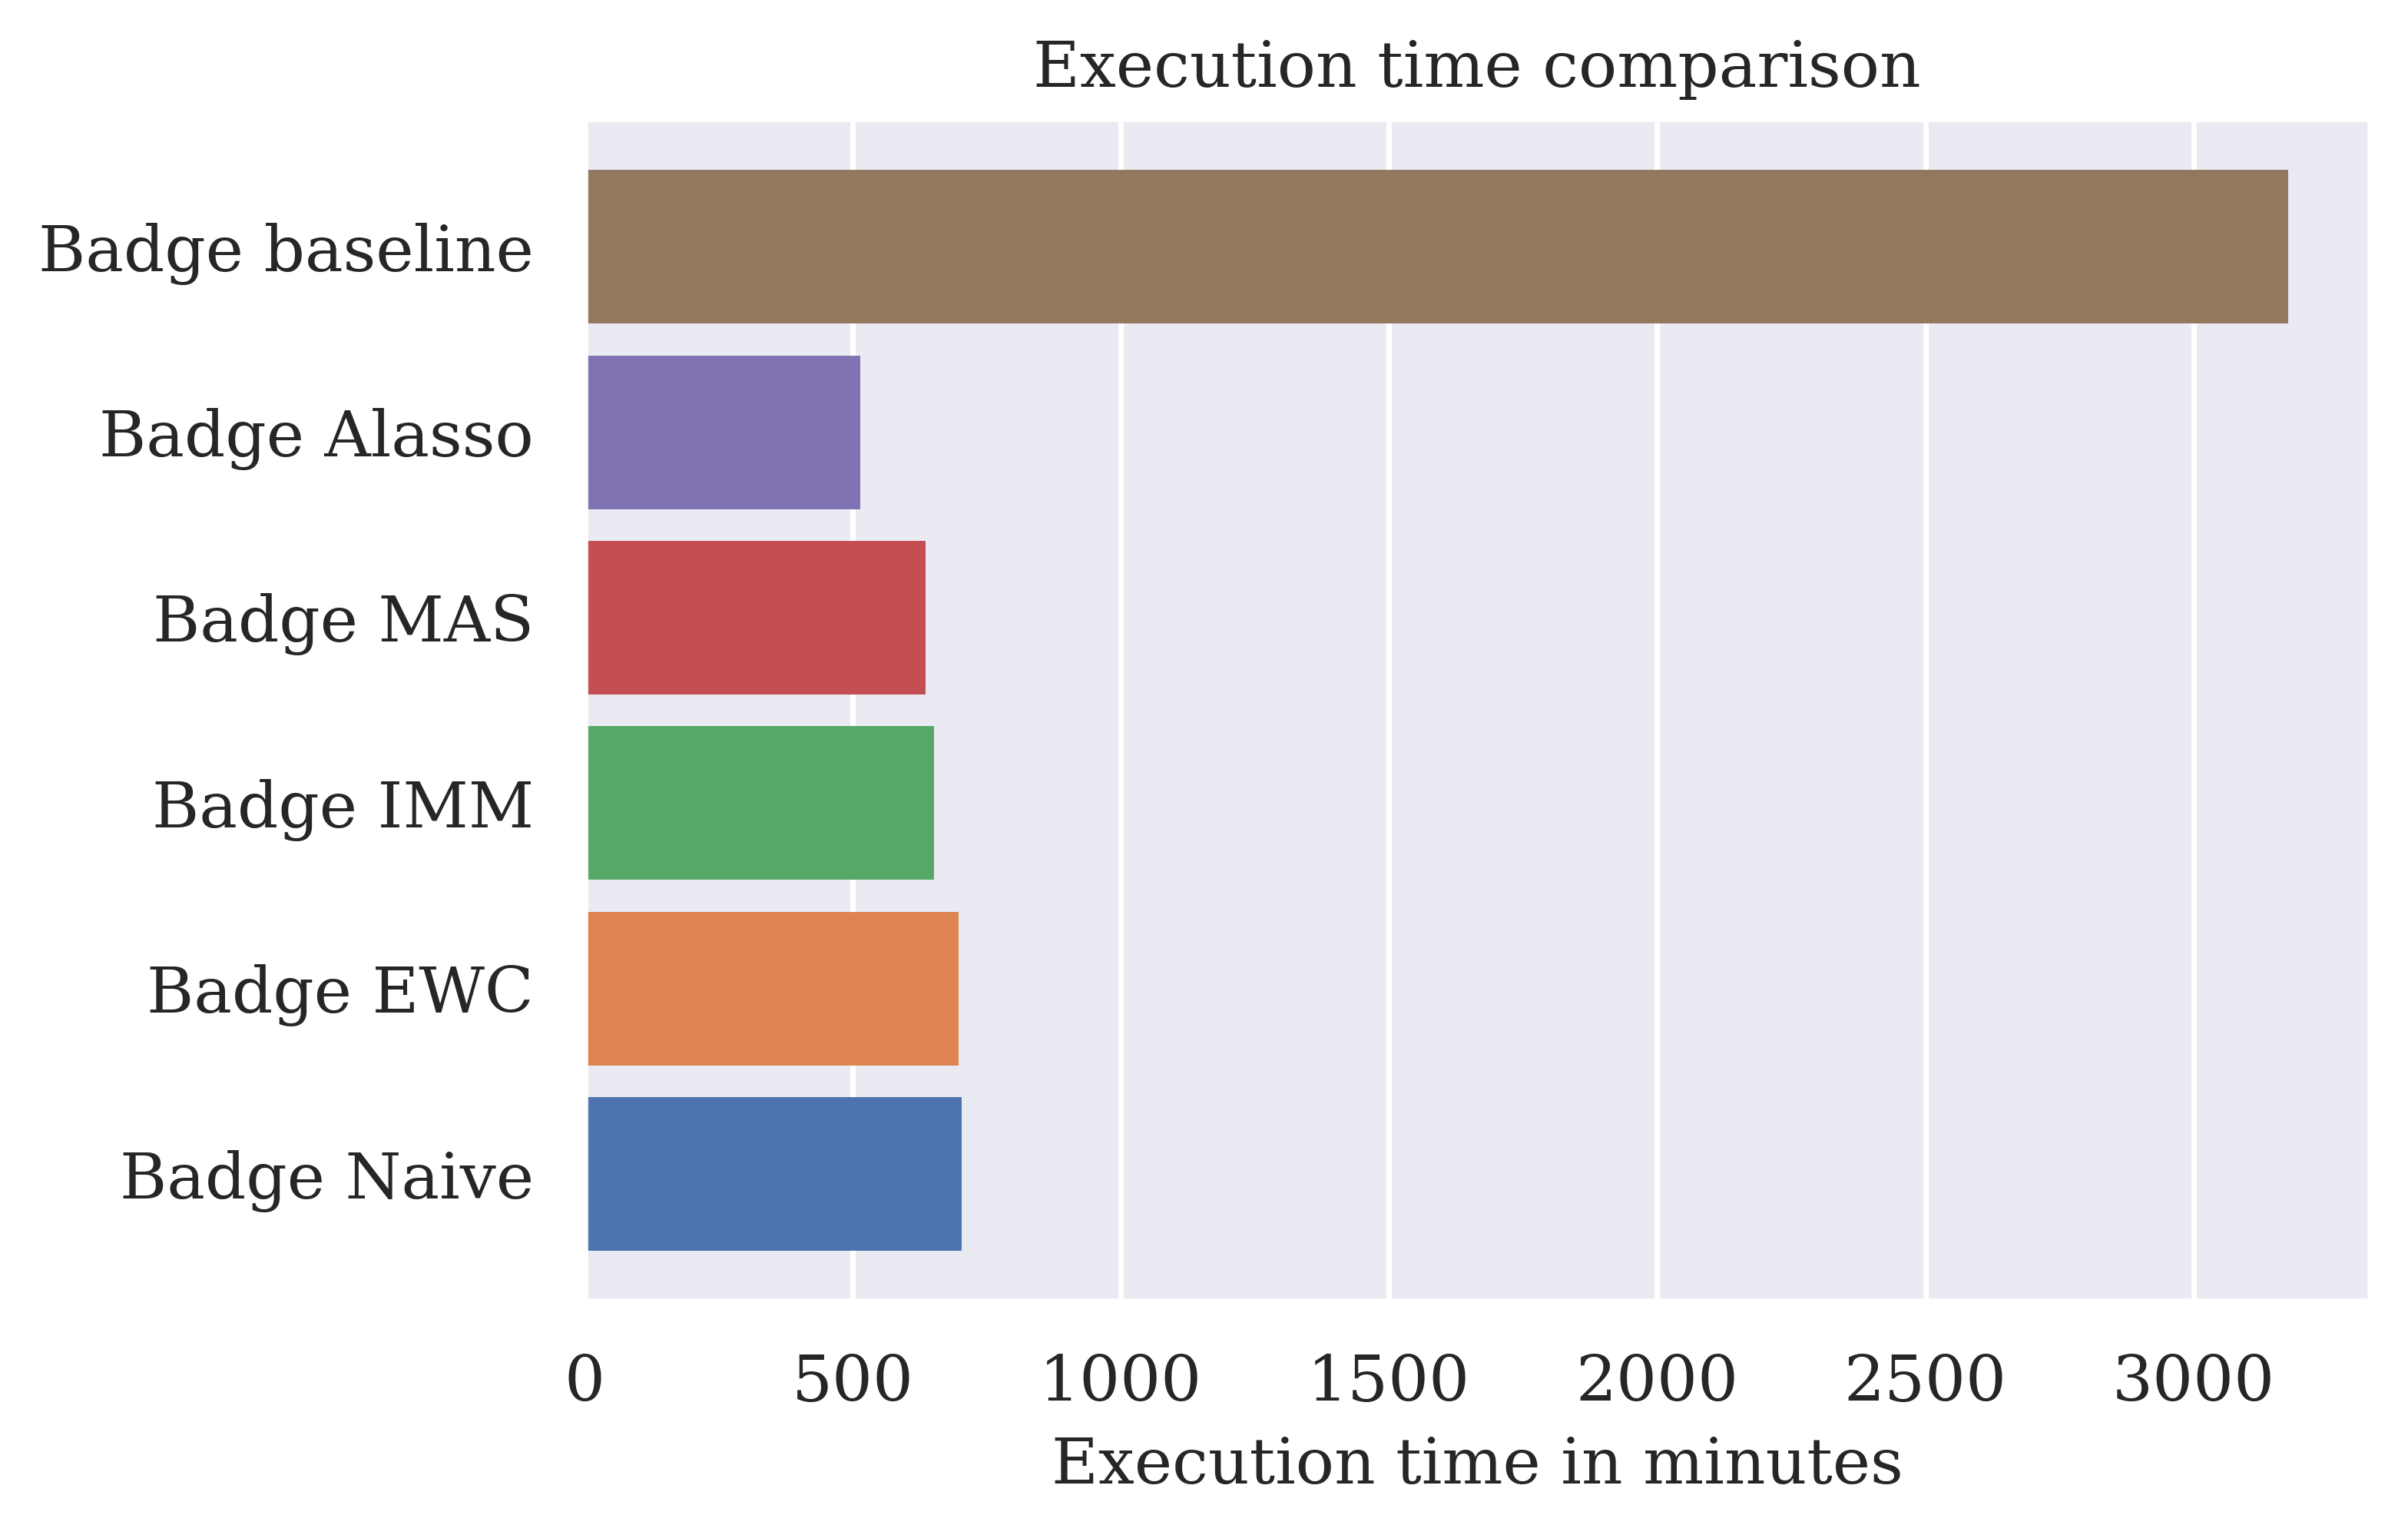

In [9]:
# 1000 Queries time
Lc_Naive_time = '00h:49m:36s'
Lc_MAS_time = '00h:55m:02s'
Lc_IMM_time = '00h:48m:54s'
Lc_EWC_time = '00h:52m:45s'
Lc_Alasso_time = '01h:14m:33s'

Random_MAS_time = '00h:48m:01s'
Random_IMM_time = '00h:42m:19s'
Random_EWC_time = '00h:44m:05s'
Random_Naive_time = '00h:43m:34s'
Random_Alasso_time = '01h:08m:10s'

Bald_Naive_time = '02h:53m:21s'
Bald_EWC_time = '03h:20m:34s'
Bald_IMM_time = '03h:04m:01s'
Bald_MAS_time = '03h:10m:40s'
Bald_Alasso_time = '01h:15m:06s'

CoreSet_IMM_time = '02h:17m:00s'
CoreSet_MAS_time = '02h:26m:51s'
CoreSet_EWC_time = '02h:20m:05s'
CoreSet_Naive_time = '02h:23m:30s'
CoreSet_Alasso_time = '02h:48m:13s'

Badge_Naive_time = '11h:37m:19s'
Badge_MAS_time = '10h:30m:27s'
Badge_IMM_time = '10h:46m:35s'
Badge_EWC_time = '11h:32m:30s'
Badge_Alasso_time = '08h:29m:09s'

Badge_baseline_time = '52h:50m:54s'
Lc_baseline_time = '42h:16m:21s'
Bald_baseline_time = '44h:26m:47s'
Random_baseline_time = '42h:02m:24s'
CoreSet_baseline_time = '44h:09m:52s'
fig, ax = plt.subplots(dpi=500)
plt_props()
data = {
        'Badge Naive' : transform_timestamp(Badge_Naive_time),
        'Badge EWC': transform_timestamp(Badge_EWC_time),
        'Badge IMM': transform_timestamp(Badge_IMM_time),
        'Badge MAS': transform_timestamp(Badge_MAS_time),
        'Badge Alasso' : transform_timestamp(Badge_Alasso_time),
        'Badge baseline': transform_timestamp(Badge_baseline_time)
        }
methods = list(data.keys())
times = list(data.values())

barplot = plt.barh(methods,times)
barplot[0].set_color((0.2980392156862745, 0.4470588235294118, 0.6901960784313725))
barplot[1].set_color((0.8666666666666667, 0.5176470588235295, 0.3215686274509804))
barplot[2].set_color((0.3333333333333333, 0.6588235294117647, 0.40784313725490196))
barplot[3].set_color((0.7686274509803922, 0.3058823529411765, 0.3215686274509804))
barplot[4].set_color((0.5058823529411764, 0.4470588235294118, 0.7019607843137254))
barplot[5].set_color((0.5764705882352941, 0.47058823529411764, 0.3764705882352941))
plt.title("Execution time comparison")
plt.xlabel("Execution time in minutes")
plt.grid(axis='x')
plt.show()


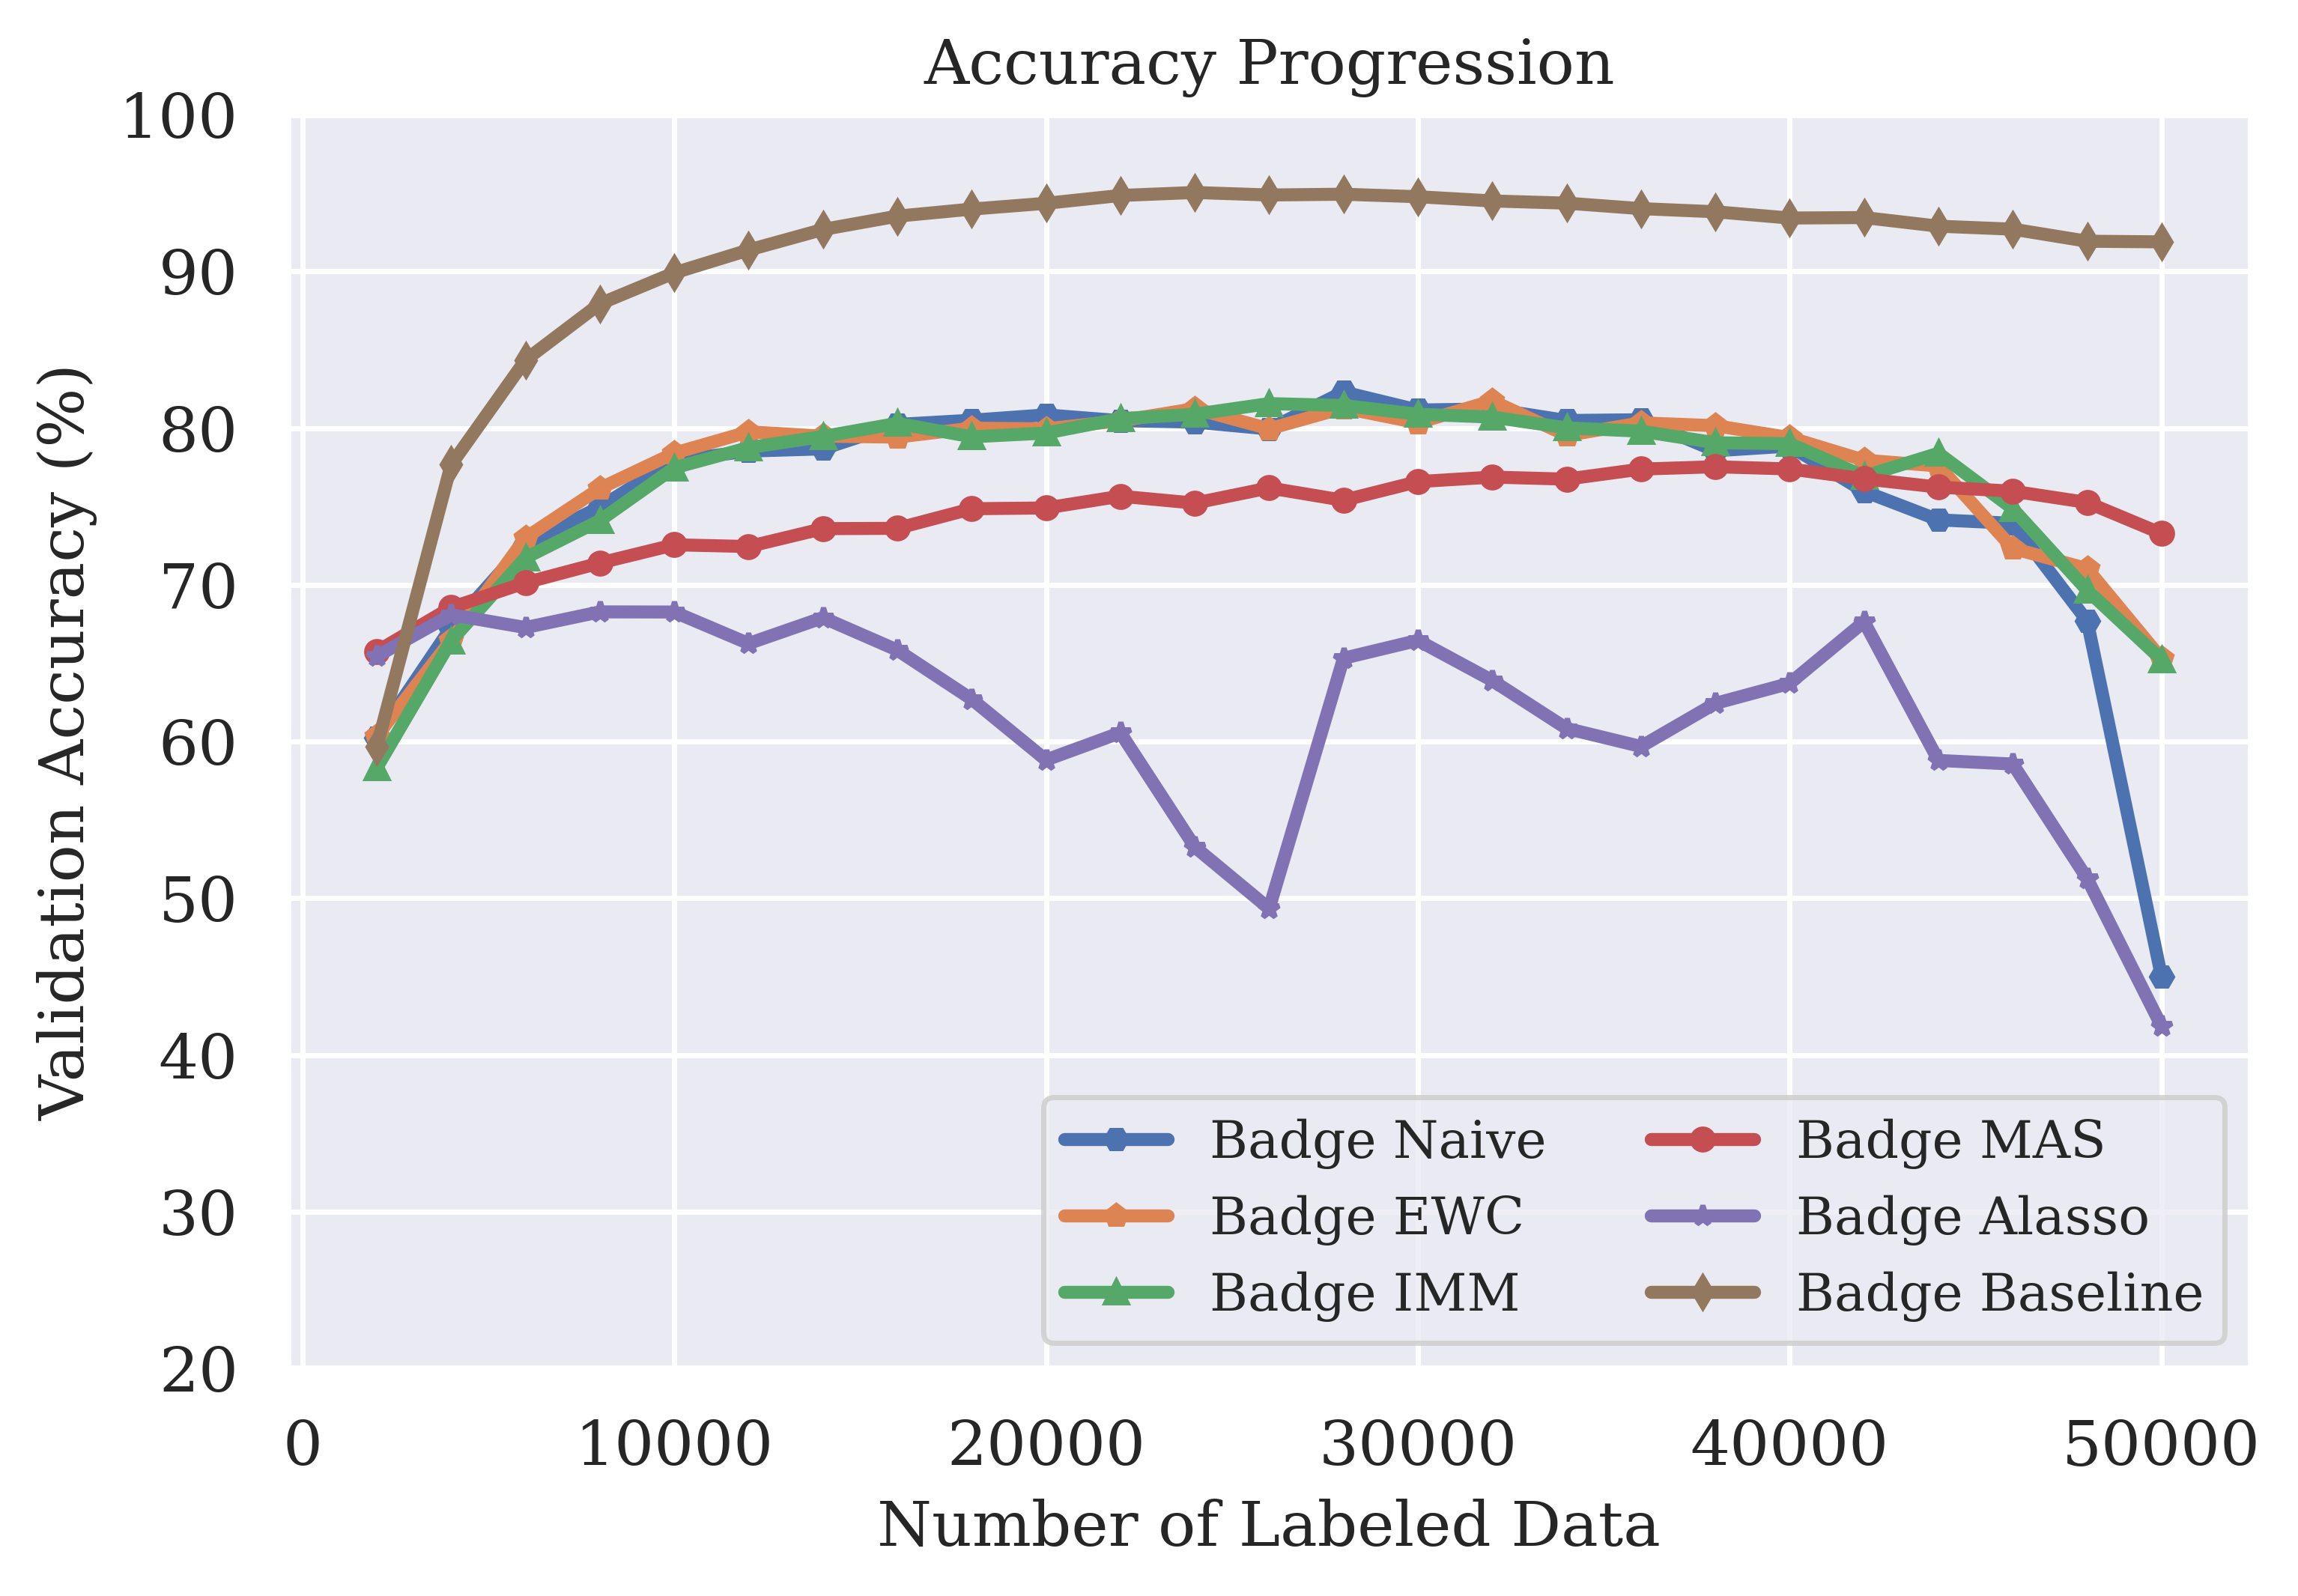

In [32]:
# 2000 Queries accuracy
Lc_Naive_acc = [0.5624, 0.6285, 0.6713, 0.7262, 0.7502, 0.7692, 0.7814, 0.7847, 0.7953, 0.7818, 0.7844, 0.7948, 0.7973, 0.796, 0.7918, 0.7813, 0.7612, 0.7352, 0.7415, 0.7125, 0.7395, 0.7237, 0.7134, 0.6455, 0.6403]
Lc_MAS_acc = [0.6405, 0.6655, 0.688, 0.6957, 0.6989, 0.7073, 0.7093, 0.7211, 0.7258, 0.7286, 0.7364, 0.7404, 0.7391, 0.7379, 0.7388, 0.7429, 0.7482, 0.7444, 0.7424, 0.7486, 0.7463, 0.7224, 0.734, 0.7339, 0.6757]
Lc_MAS_scheduler_acc = [0.6378, 0.6755, 0.6957, 0.7149, 0.7184, 0.7334, 0.7473, 0.7497, 0.7544, 0.7596, 0.7695, 0.7664, 0.773, 0.775, 0.7777, 0.7776, 0.7747, 0.7742, 0.7701, 0.7638, 0.7669, 0.7669, 0.7412, 0.7245, 0.7046]
Lc_IMM_acc = [0.5382, 0.5491, 0.6245, 0.6657, 0.7103, 0.7415, 0.7743, 0.7684, 0.7831, 0.7807, 0.7908, 0.7821, 0.7861, 0.7807, 0.7786, 0.7683, 0.7441, 0.6971, 0.6952, 0.6819, 0.677, 0.6722, 0.7224, 0.6377, 0.6866]
Lc_IMM_scheduler_acc = [0.5561, 0.604, 0.6825, 0.6853, 0.7218, 0.7504, 0.7562, 0.7731, 0.776, 0.7667, 0.7791, 0.7911, 0.7658, 0.7774, 0.767, 0.7739, 0.7523, 0.7635, 0.7727, 0.7565, 0.7774, 0.7794, 0.7892, 0.772, 0.7787]
Lc_EWC_acc = [0.554, 0.5974, 0.6481, 0.6734, 0.7068, 0.7364, 0.7538, 0.77, 0.7847, 0.7848, 0.7853, 0.7895, 0.7848, 0.7849, 0.7845, 0.7743, 0.7745, 0.7377, 0.6881, 0.619, 0.5964, 0.5419, 0.4769, 0.5604, 0.6051]
Lc_EWC_scheduler_acc =  [0.5581, 0.612, 0.6907, 0.7032, 0.7387, 0.7525, 0.7619, 0.7741, 0.7803, 0.7906, 0.7766, 0.7906, 0.7675, 0.8062, 0.788, 0.7897, 0.7961, 0.7979, 0.7799, 0.801, 0.7942, 0.7776, 0.7881, 0.7977, 0.8048]
Lc_AGEM_100_30_acc =  [0.6509, 0.7337, 0.7654, 0.774, 0.7758, 0.757, 0.7695, 0.7512, 0.7665, 0.7381, 0.7259, 0.702, 0.7129, 0.6742, 0.6825, 0.6633, 0.626, 0.5958, 0.6403, 0.5975, 0.6109, 0.6197, 0.5912, 0.726, 0.6437]
Lc_AGEM_500_50_acc = [0.6422, 0.6895, 0.7529, 0.7628, 0.7781, 0.7791, 0.7846, 0.7722, 0.7545, 0.7408, 0.7404, 0.7254, 0.7185, 0.7073, 0.6961, 0.6607, 0.6531, 0.6658, 0.6146, 0.6001, 0.5534, 0.5816, 0.587, 0.6003, 0.7125]
Lc_AGEM_500_400_acc = [0.646, 0.7006, 0.757, 0.7702, 0.7822, 0.7762, 0.7784, 0.7709, 0.7704, 0.7606, 0.7606, 0.7328, 0.7158, 0.7169, 0.6909, 0.6866, 0.6778, 0.6837, 0.6591, 0.6269, 0.63, 0.6092, 0.6353, 0.5915, 0.6792]
Lc_AGEM_2000_400_acc = [0.6385, 0.718, 0.7428, 0.7628, 0.7609, 0.7807, 0.7791, 0.79, 0.8021, 0.777, 0.7843, 0.7485, 0.7382, 0.6905, 0.6827, 0.6126, 0.6388, 0.623, 0.6085, 0.6146, 0.6402, 0.6453, 0.6739, 0.6583, 0.6836]
LC_AGEM_full_acc = [0.6623, 0.7262, 0.7668, 0.7732, 0.7823, 0.7865, 0.7859, 0.7841, 0.7596, 0.76, 0.742, 0.6902, 0.6864, 0.6214, 0.6215, 0.6334, 0.6541, 0.6277, 0.6511, 0.6323, 0.585, 0.605, 0.6047, 0.6524, 0.653]
Lc_Replay_acc = [0.5397, 0.632, 0.7186, 0.779, 0.8057, 0.8197, 0.8284, 0.8074, 0.8435, 0.8534, 0.8352, 0.857, 0.8574, 0.8537, 0.8638, 0.8585, 0.8479, 0.8469, 0.8498, 0.8444, 0.8408, 0.8343, 0.8341, 0.8286, 0.8274]
Lc_DGR_acc = [0.3775, 0.4021, 0.3504, 0.3286, 0.3465, 0.3279, 0.3734, 0.4524, 0.427, 0.4583, 0.4297, 0.382, 0.3572, 0.3956, 0.3841, 0.3689, 0.3669, 0.3763, 0.3561, 0.3775, 0.355]
Lc_Alasso_acc = [0.6639, 0.699, 0.678, 0.6785, 0.6668, 0.6714, 0.6775, 0.6654, 0.6886, 0.7411, 0.7282, 0.6997, 0.5713, 0.5506, 0.6264, 0.6555, 0.6644, 0.6, 0.6683, 0.696, 0.6984, 0.6493, 0.6692, 0.5423, 0.5347]

Random_MAS_acc = [0.6468, 0.661, 0.6766, 0.6844, 0.6923, 0.704, 0.7008, 0.6997, 0.7052, 0.7087, 0.7182, 0.7114, 0.7223, 0.7314, 0.7269, 0.7313, 0.7409, 0.735, 0.7422, 0.75, 0.7472, 0.7469, 0.7465, 0.7496, 0.751]
Random_MAS_scheduler_acc = [0.646, 0.6543, 0.6558, 0.6589, 0.6615, 0.6621, 0.6617, 0.6626, 0.6629, 0.6613, 0.6612, 0.6622, 0.6631, 0.6615, 0.6631, 0.6606, 0.6623, 0.6641, 0.6626, 0.6612, 0.6627, 0.6622, 0.6631, 0.6609, 0.6616]
Random_IMM_acc = [0.5111, 0.5705, 0.6113, 0.6189, 0.6504, 0.6563, 0.6868, 0.6908, 0.7007, 0.7158, 0.7201, 0.7346, 0.7348, 0.7296, 0.7558, 0.7586, 0.7576, 0.7697, 0.7778, 0.7712, 0.7923, 0.7949, 0.8036, 0.8035, 0.8087]
Random_IMM_scheduler_acc = [0.4862, 0.557, 0.5597, 0.5663, 0.5681, 0.5673, 0.571, 0.5733, 0.575, 0.5797, 0.5782, 0.5818, 0.5823, 0.5828, 0.5856, 0.5859, 0.5911, 0.5924, 0.5921, 0.5966, 0.5941, 0.5939, 0.6031, 0.6042, 0.6082]
Random_EWC_acc = [0.5675, 0.6413, 0.6646, 0.6852, 0.7041, 0.7252, 0.7399, 0.7633, 0.7782, 0.7766, 0.79, 0.79, 0.7964, 0.8067, 0.7996, 0.8101, 0.817, 0.8161, 0.8225, 0.835, 0.8316, 0.834, 0.8282, 0.8437, 0.8389]
Random_EWC_scheduler_acc = [0.4877, 0.5493, 0.5622, 0.563, 0.5644, 0.5694, 0.5629, 0.5667, 0.5723, 0.5735, 0.5794, 0.5794, 0.582, 0.58, 0.5806, 0.5886, 0.5914, 0.5893, 0.5954, 0.5967, 0.5984, 0.5937, 0.5952, 0.5986, 0.5948]
Random_Naive_acc = [0.5609, 0.6331, 0.6589, 0.6916, 0.7075, 0.7075, 0.7259, 0.7422, 0.7481, 0.7551, 0.7657, 0.7765, 0.7764, 0.7876, 0.7952, 0.8047, 0.8097, 0.8144, 0.816, 0.8255, 0.8204, 0.8235, 0.8238, 0.8351, 0.8295]
Random_DGR_acc = [0.6092, 0.7046, 0.7019, 0.6757, 0.6519, 0.5819, 0.4357, 0.4991, 0.5356, 0.4975, 0.2939, 0.3542, 0.4699]
Random_Alasso_acc = [0.6449, 0.6779, 0.6658, 0.6618, 0.6809, 0.6756, 0.6894, 0.6937, 0.6966, 0.6498, 0.7109, 0.7255, 0.7388, 0.7404, 0.719, 0.6924, 0.7303, 0.7474, 0.7548, 0.7566, 0.7551, 0.7709, 0.7907, 0.7833, 0.7845]

Bald_Naive_acc = [0.5965, 0.6445, 0.6909, 0.7392, 0.7545, 0.7564, 0.7777, 0.7783, 0.7868, 0.7936, 0.7873, 0.7932, 0.7788, 0.779, 0.7637, 0.7219, 0.6965, 0.6883, 0.6621, 0.6445, 0.599, 0.5501, 0.5706, 0.6995, 0.6449]
Bald_EWC_acc = [0.5539, 0.5838, 0.6702, 0.6743, 0.7251, 0.7352, 0.7574, 0.7625, 0.7732, 0.7731, 0.7829, 0.7741, 0.7733, 0.7591, 0.7579, 0.7347, 0.7175, 0.6788, 0.6802, 0.6125, 0.6083, 0.6183, 0.6104, 0.6892, 0.5932]
Bald_IMM_acc = [0.5539, 0.614, 0.6789, 0.721, 0.7261, 0.761, 0.7595, 0.7704, 0.7785, 0.7926, 0.7665, 0.7783, 0.7864, 0.781, 0.7795, 0.7836, 0.7843, 0.7577, 0.7562, 0.7175, 0.6691, 0.5638, 0.6187, 0.5894, 0.6142]
Bald_MAS_acc = [0.6557, 0.6721, 0.691, 0.6993, 0.7103, 0.7138, 0.7258, 0.7268, 0.737, 0.7406, 0.7499, 0.7391, 0.7618, 0.7603, 0.7519, 0.7631, 0.7599, 0.7642, 0.757, 0.7518, 0.7561, 0.7356, 0.7415, 0.7384, 0.6804]
Bald_MAS_scheduler_acc = [0.6426, 0.6465, 0.6768, 0.6969, 0.7012, 0.7175, 0.7178, 0.7177, 0.7306, 0.7207, 0.7254, 0.7326, 0.7343, 0.7372, 0.7404, 0.7423, 0.742, 0.7414, 0.745, 0.7479, 0.7509, 0.7545, 0.7475, 0.7525, 0.7543]
Bald_Alasso_acc = [0.6634, 0.6947, 0.6819, 0.6583, 0.669, 0.618, 0.6413, 0.525, 0.3677, 0.3464, 0.3542, 0.3508, 0.2468, 0.3088, 0.3187, 0.3005, 0.2849, 0.2501, 0.298, 0.2876, 0.2816, 0.2982, 0.2411, 0.2951, 0.2975]

CoreSet_IMM_acc = [0.5279, 0.5927, 0.6383, 0.6696, 0.695, 0.721, 0.7438, 0.7581, 0.7619, 0.769, 0.7374, 0.7213, 0.765, 0.7393, 0.7428, 0.66, 0.7804, 0.7658, 0.801, 0.7955, 0.7876, 0.7743, 0.749, 0.761, 0.6478]
CoreSet_MAS_acc = [0.6889, 0.7046, 0.7108, 0.7228, 0.7281, 0.7312, 0.734, 0.7336, 0.7282, 0.7388, 0.7306, 0.727, 0.7365, 0.7087, 0.7465, 0.7199, 0.7445, 0.7072, 0.7422, 0.7177, 0.7015, 0.6962, 0.7011, 0.6402, 0.626]
CoreSet_MAS_scheduler_acc = [0.6338, 0.6624, 0.6831, 0.6942, 0.7067, 0.7082, 0.7213, 0.7339, 0.7349, 0.7407, 0.744, 0.7431, 0.7473, 0.747, 0.7513, 0.7606, 0.7595, 0.7632, 0.7657, 0.772, 0.7786, 0.7713, 0.7768, 0.7822, 0.7789]
CoreSet_EWC_acc = [0.5225, 0.5848, 0.6379, 0.6847, 0.7234, 0.7562, 0.7773, 0.7776, 0.7771, 0.7763, 0.7563, 0.778, 0.7578, 0.7623, 0.7345, 0.7611, 0.7015, 0.768, 0.7462, 0.7827, 0.7778, 0.7754, 0.7639, 0.7184, 0.6968]
CoreSet_Naive_acc = [0.5946, 0.6374, 0.7124, 0.7466, 0.77, 0.7864, 0.7978, 0.7955, 0.8098, 0.8013, 0.8019, 0.7919, 0.752, 0.7698, 0.6869, 0.7763, 0.7176, 0.7662, 0.7657, 0.773, 0.7674, 0.7629, 0.7555, 0.723, 0.6818]
CoreSet_DGR_acc = [0.4462, 0.6198, 0.6192, 0.4557, 0.3272, 0.3229, 0.3265, 0.5391, 0.4926, 0.4257, 0.4144, 0.4152, 0.4737]
CoreSet_Alasso_acc = [0.5904, 0.661, 0.6206, 0.6185, 0.6742, 0.6359, 0.6132, 0.6526, 0.5664, 0.5338, 0.6001, 0.6339, 0.6148, 0.5422, 0.4307, 0.4621, 0.4079, 0.3511, 0.4284, 0.5553, 0.5931, 0.1474, 0.1712, 0.2269, 0.4228]


Badge_Naive_acc = [0.6026, 0.6729, 0.7262, 0.7496, 0.7793, 0.7854, 0.7868, 0.8024, 0.8051, 0.8085, 0.8048, 0.8039, 0.7995, 0.8231, 0.8116, 0.8123, 0.8049, 0.8054, 0.7856, 0.7886, 0.7597, 0.7415, 0.7393, 0.677, 0.4499]
Badge_MAS_acc = [0.6576, 0.6856, 0.7014, 0.714, 0.7256, 0.7245, 0.7359, 0.7361, 0.7486, 0.7491, 0.7566, 0.7522, 0.7619, 0.754, 0.7659, 0.7688, 0.7675, 0.7739, 0.7754, 0.774, 0.7677, 0.7624, 0.7598, 0.7526, 0.7328]
Badge_IMM_acc = [0.5833, 0.6643, 0.7173, 0.7411, 0.7747, 0.7876, 0.7947, 0.8031, 0.7945, 0.7969, 0.8061, 0.8089, 0.8157, 0.8145, 0.8089, 0.8071, 0.8002, 0.7981, 0.7907, 0.7901, 0.7693, 0.784, 0.7486, 0.6966, 0.6523]
Badge_EWC_acc = [0.6036, 0.6648, 0.7301, 0.7616, 0.7841, 0.7977, 0.7949, 0.7943, 0.8, 0.7996, 0.8047, 0.8125, 0.7996, 0.8129, 0.8034, 0.8175, 0.7954, 0.8034, 0.8016, 0.794, 0.7796, 0.7759, 0.7233, 0.7104, 0.653]
Badge_Alasso_acc = [0.6545, 0.681, 0.6728, 0.6828, 0.6827, 0.6626, 0.6791, 0.6584, 0.6271, 0.5883, 0.6057, 0.5328, 0.4935, 0.6532, 0.6646, 0.639, 0.6084, 0.5969, 0.6244, 0.6372, 0.6765, 0.588, 0.5857, 0.5126, 0.4184]

Random_Baseline_acc = [0.5546, 0.6688, 0.7176, 0.7615, 0.7899, 0.8296, 0.8511, 0.8638, 0.8823, 0.9007, 0.9058, 0.913, 0.9187, 0.9233, 0.9303, 0.9308, 0.9343, 0.9336, 0.938, 0.9397, 0.9425, 0.9424, 0.9474, 0.9507, 0.9504]
Badge_Baseline_acc = [0.5967, 0.7767, 0.8435, 0.8794, 0.8991, 0.9137, 0.9268, 0.9353, 0.9398, 0.9435, 0.9485, 0.9504, 0.9488, 0.9493, 0.9477, 0.945, 0.9436, 0.9401, 0.9381, 0.9341, 0.9344, 0.9289, 0.927, 0.9193, 0.9189]
Lc_Baseline_acc = [0.553, 0.7545, 0.8421, 0.8761, 0.9009, 0.9174, 0.928, 0.9395, 0.9449, 0.944, 0.9468, 0.9477, 0.9494, 0.9496, 0.9463, 0.9482, 0.9435, 0.9378, 0.9409, 0.9346, 0.9324, 0.9316, 0.9233, 0.9215, 0.9115]
CoreSet_Baseline_acc = [0.5536, 0.7182, 0.8172, 0.8658, 0.8933, 0.9068, 0.9183, 0.93, 0.9391, 0.9421, 0.9442, 0.9452, 0.9476, 0.947, 0.9461, 0.9458, 0.9427, 0.9422, 0.9402, 0.9376, 0.935, 0.9307, 0.9284, 0.9205, 0.9204]
Bald_Baseline_acc = [0.5214, 0.6954, 0.8064, 0.862, 0.8902, 0.9111, 0.9224, 0.9313, 0.9395, 0.9425, 0.9463, 0.9452, 0.9456, 0.9468, 0.9466, 0.9457, 0.9467, 0.9453, 0.9429, 0.937, 0.9357, 0.9297, 0.9278, 0.9233, 0.9211]

x = [(i+1)*2000 for i in range(25)]
m={}
m['MAS']='o'
m['CoreSet']='>'
m['IMM']='^'
m['Alasso']='*'
m['Baseline']='d'
m['EWC']='p'
m['Naive']='H'
m['emp']='s'
m['SA']=','
fig, ax = plt.subplots(dpi=500)
plt_props()

a = [x*100 for x in Badge_Naive_acc]
b = [x*100 for x in Badge_EWC_acc]
c = [x*100 for x in Badge_IMM_acc]
d = [x*100 for x in Badge_MAS_acc]
e = [x*100 for x in Badge_Alasso_acc]
f = [x*100 for x in Badge_Baseline_acc]
random_naive, = plt.plot(x, a, label='Badge Naive', marker=m['Naive'])
random_ewc, = plt.plot(x, b, label='Badge EWC', marker=m['EWC'])
random_imm, = plt.plot(x, c, label='Badge IMM', marker=m['IMM'])
random_mas, = plt.plot(x, d, label='Badge MAS', marker=m['MAS'])
random_alasso, = plt.plot(x,e,label='Badge Alasso',marker=m['Alasso'])
random_baseline, = plt.plot(x, f, label='Badge Baseline', marker=m['Baseline'])

#cifar10_empirical_plot = plt.plot(x, Random_Naive, label='VAAL', marker=m['VAAL'])

ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
plt.legend(handles=[random_naive, random_ewc, random_imm, random_mas, random_alasso, random_baseline], loc=4)

#ax.set_xlim(9.8, 40.4)
#ax.set_ylim(40.0, 82.0)
#plt.plot([], [], ' ', label= r"Top-1" 
#                            r"$=90.16 \pm 0.25$")
plt.legend(ncol=2, loc='lower right')
fig.tight_layout()
plt.ylim(20,100)
plt.xlabel('Number of Labeled Data')
plt.ylabel('Validation Accuracy (%)')  
plt.title('Accuracy Progression')
plt.grid(True)
plt.show()

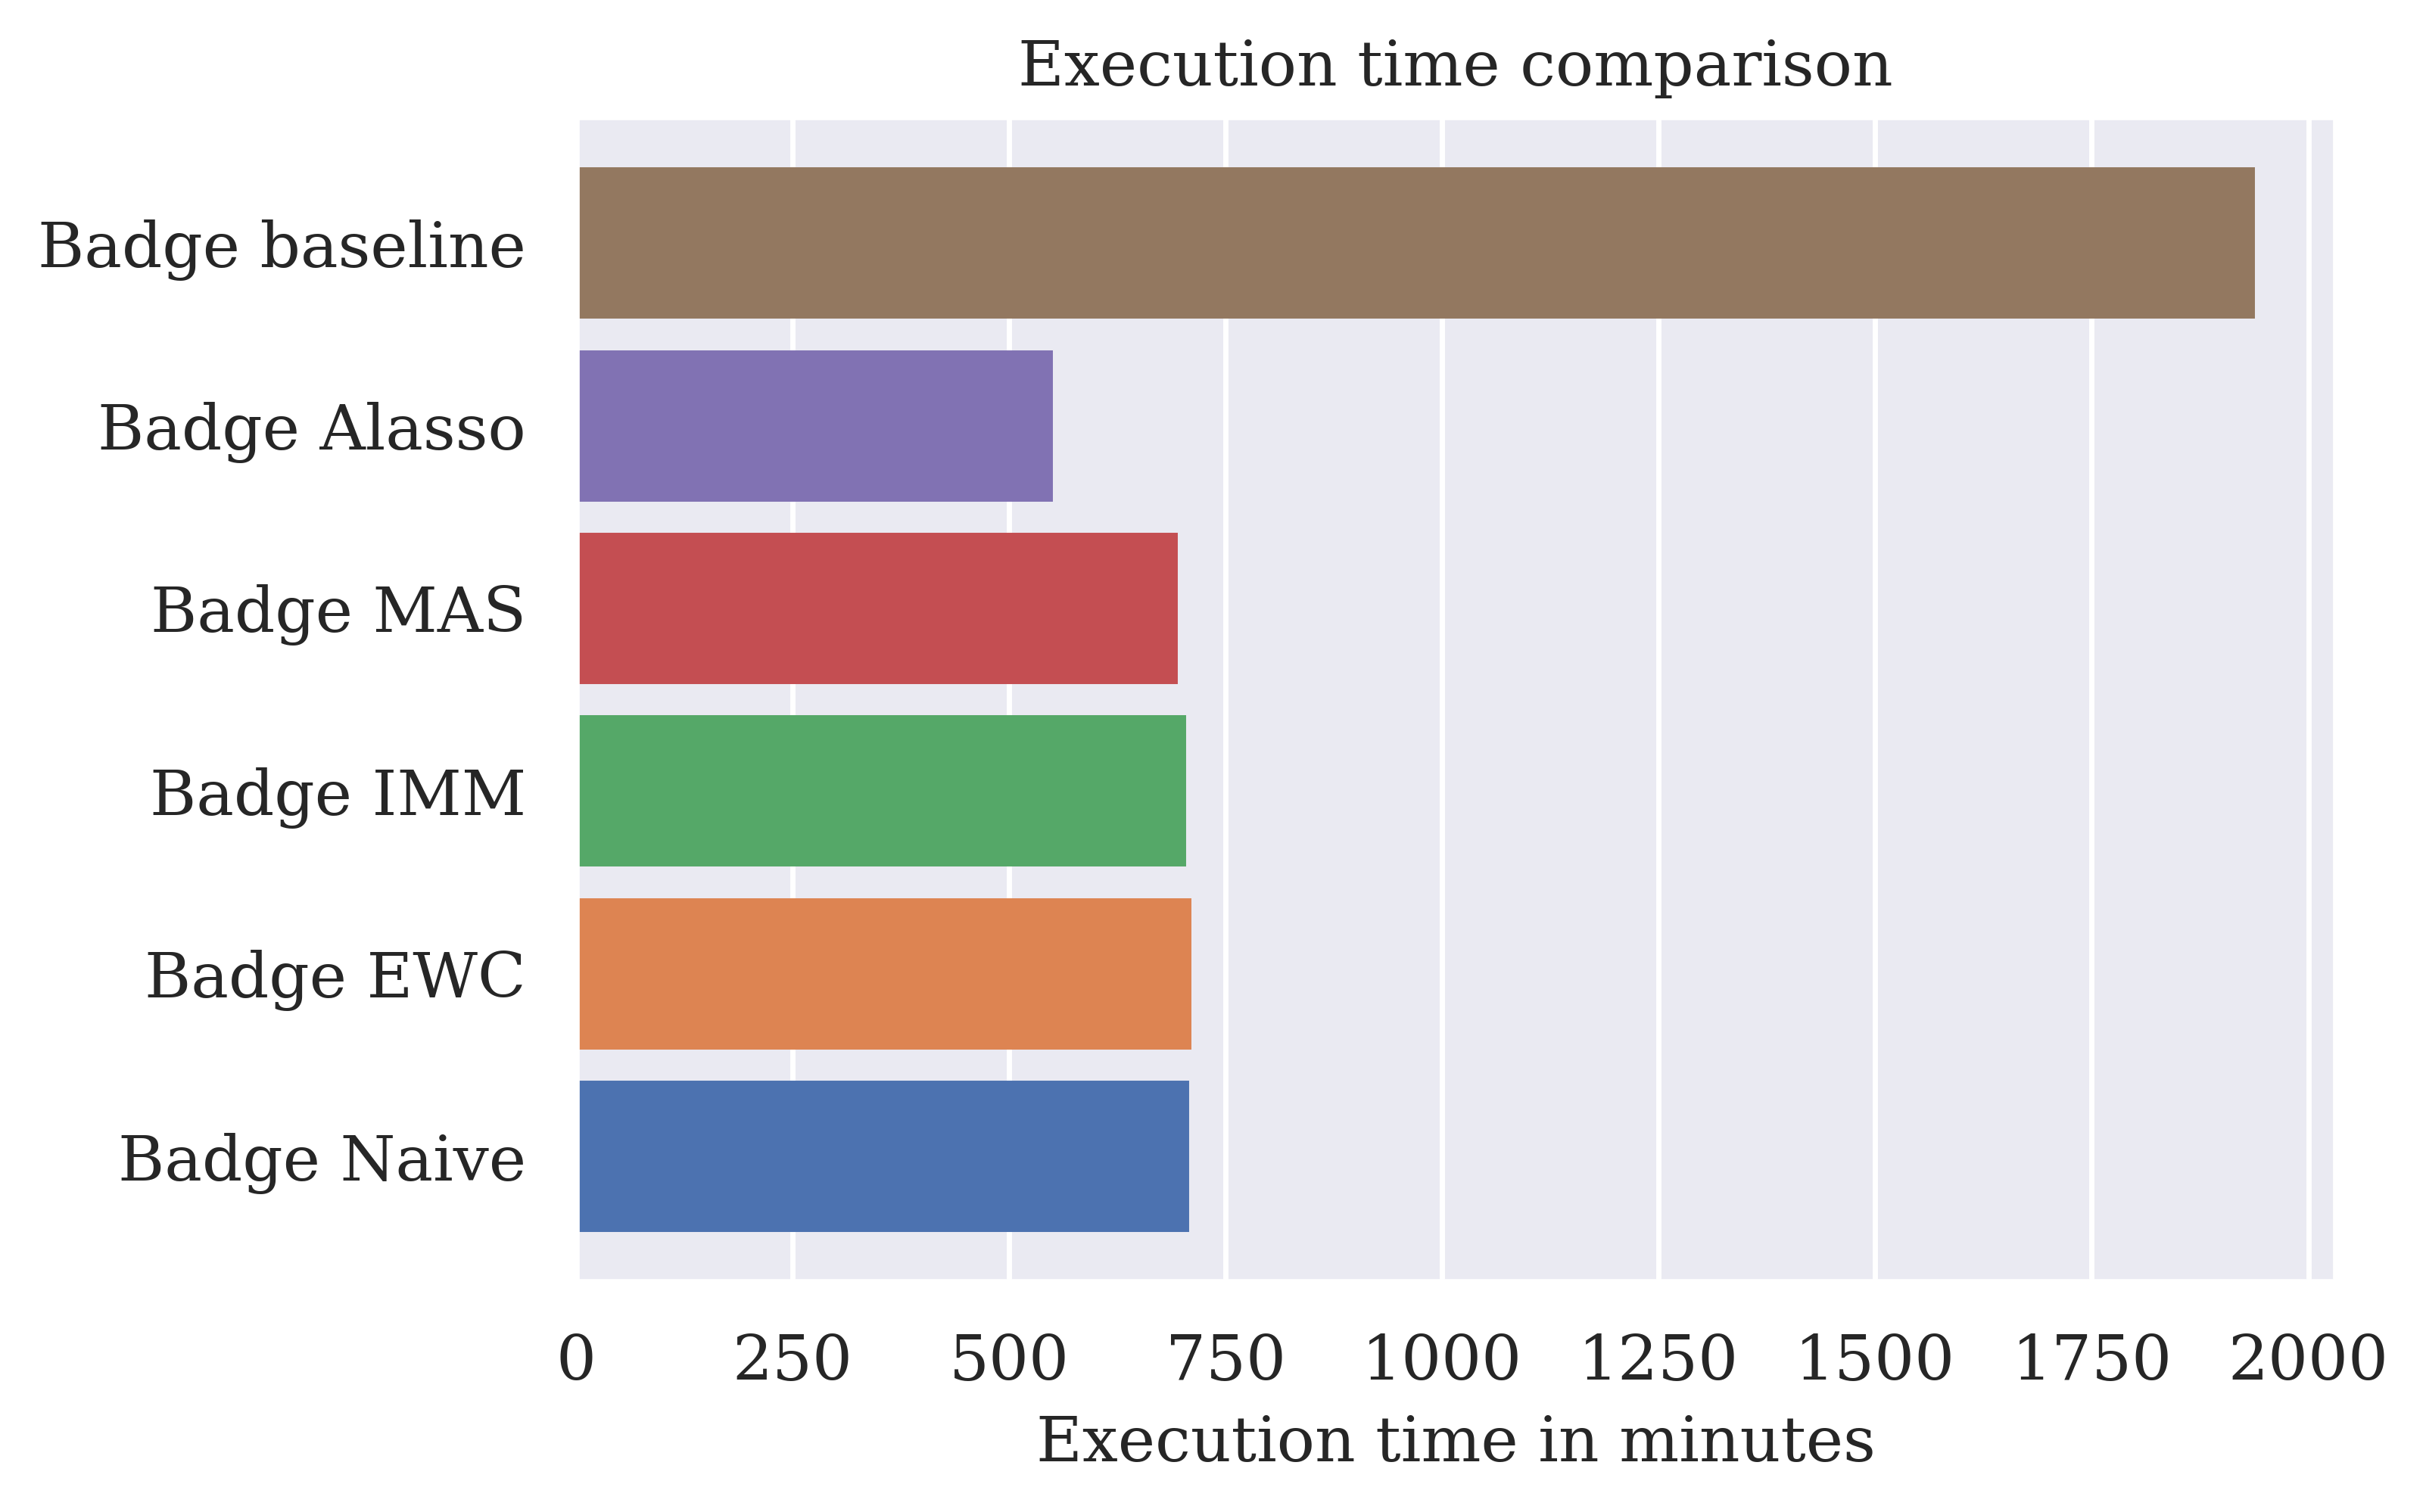

In [33]:
# 2000 Queries time
Lc_Naive_time = '01h:20m:09s'
Lc_MAS_time = '01h:24m:12s'
Lc_IMM_time = '01h:16m:17s'
Lc_EWC_time = '01h:29m:46s'
Lc_Alasso_time = '02h:10m:51s'
Lc_Replay_time = '03h:25m:37s'
Lc_AGEM_time = '03h:39m:26s'

Random_MAS_time = '01h:24m:29s'
Random_IMM_time = '01h:17m:10s'
Random_EWC_time = '01h:23m:44s'
Random_Naive_time = '01h:15m:38s'
Random_Alasso_time = '01h:58m:45s'

Bald_Naive_time = '02h:26m:21s'
Bald_EWC_time = '02h:36m:41s'
Bald_IMM_time = '02h:32m:55s'
Bald_MAS_time = '02h:33m:35s'
Bald_Alasso_time = '02h:02m:13s'

CoreSet_IMM_time = '02h:24m:38s'
CoreSet_MAS_time = '02h:40m:49s'
CoreSet_EWC_time = '02h:31m:40s'
CoreSet_Naive_time = '02h:41m:39s'
CoreSet_Alasso_time = '03h:08m:01s'

Badge_Naive_time = '11h:44m:16s'
Badge_MAS_time = '11h:31m:16s'
Badge_IMM_time = '11h:40m:51s'
Badge_EWC_time = '11h:46m:43s'
Badge_Alasso_time = '09h:07m:15s'

Random_baseline_time = '21h:29m:58s'
Badge_baseline_time = '32h:15m:00s'
Lc_baseline_time = '21h:42m:58s'
CoreSet_baseline_time = '22h:22m:11s'
Bald_baseline_time = '22h:41m:29s'

fig, ax = plt.subplots(dpi=500)
plt_props()
data = {
        'Badge Naive' : transform_timestamp(Badge_Naive_time),
        'Badge EWC': transform_timestamp(Badge_EWC_time),
        'Badge IMM': transform_timestamp(Badge_IMM_time),
        'Badge MAS': transform_timestamp(Badge_MAS_time),
        'Badge Alasso' : transform_timestamp(Badge_Alasso_time),
        'Badge baseline': transform_timestamp(Badge_baseline_time)
        }
methods = list(data.keys())
times = list(data.values())

barplot = plt.barh(methods,times)
barplot[0].set_color((0.2980392156862745, 0.4470588235294118, 0.6901960784313725))
barplot[1].set_color((0.8666666666666667, 0.5176470588235295, 0.3215686274509804))
barplot[2].set_color((0.3333333333333333, 0.6588235294117647, 0.40784313725490196))
barplot[3].set_color((0.7686274509803922, 0.3058823529411765, 0.3215686274509804))
barplot[4].set_color((0.5058823529411764, 0.4470588235294118, 0.7019607843137254))
barplot[5].set_color((0.5764705882352941, 0.47058823529411764, 0.3764705882352941))
plt.title("Execution time comparison")
plt.xlabel("Execution time in minutes")
plt.grid(axis='x')
plt.show()

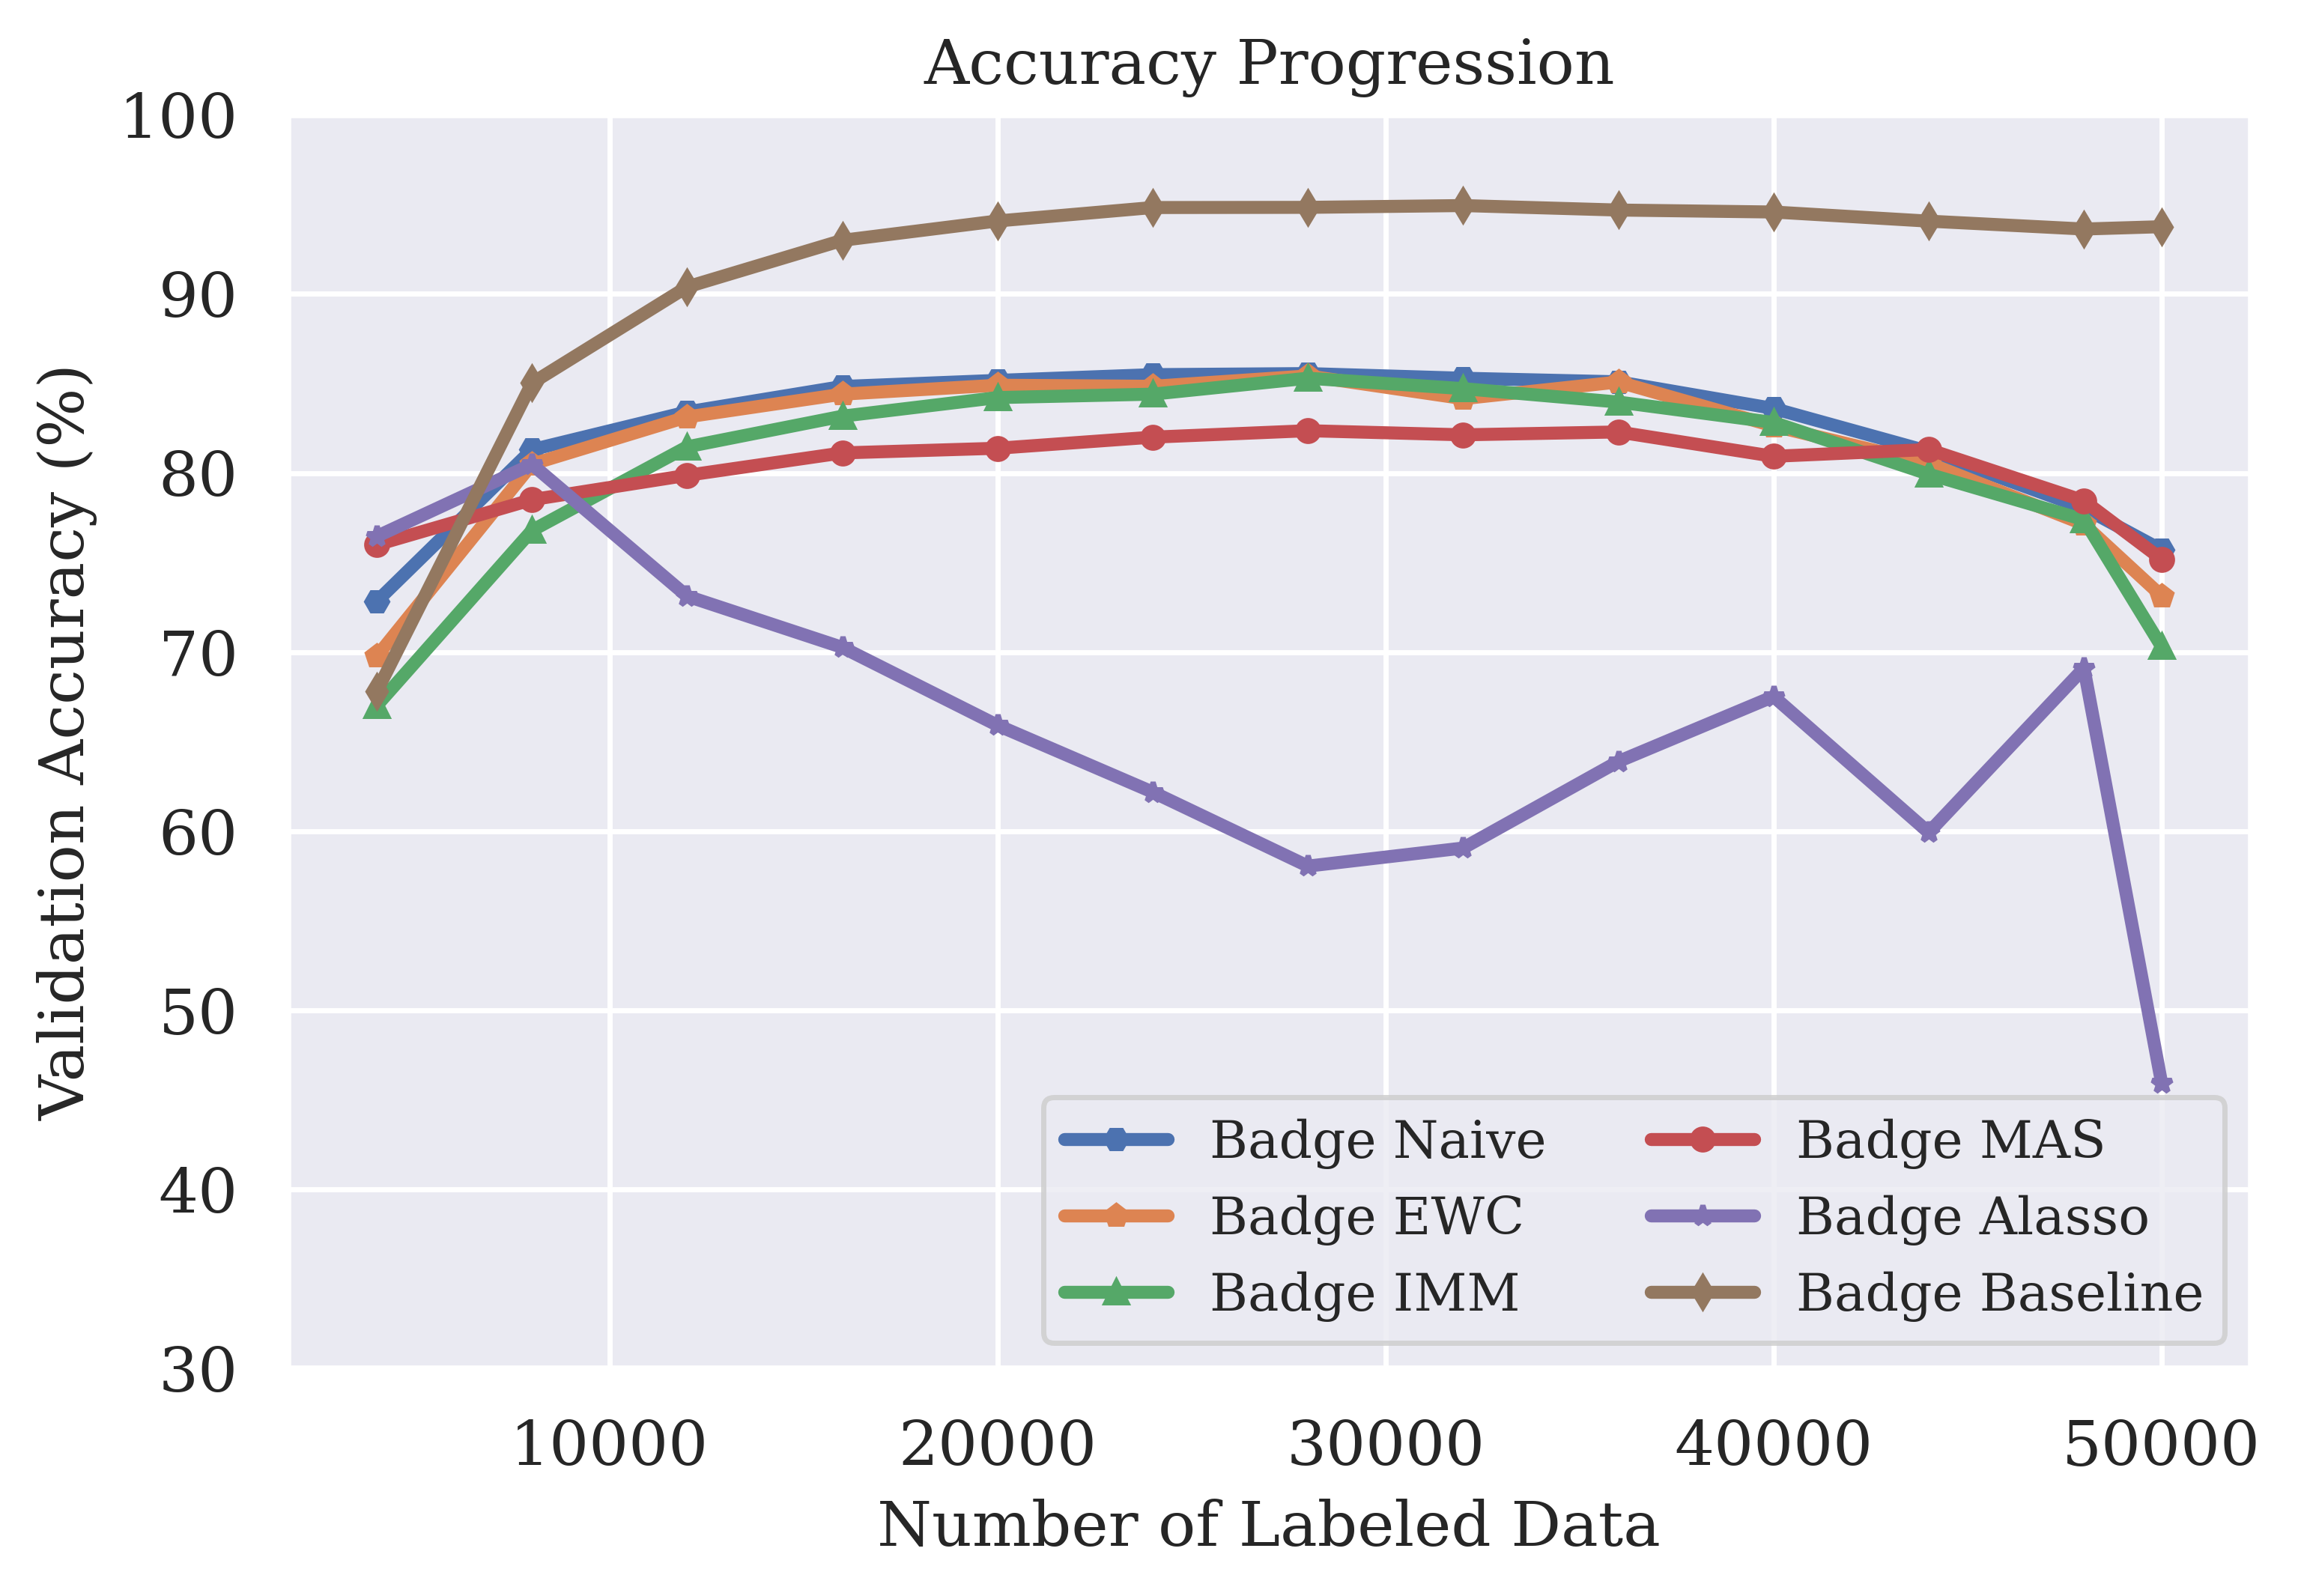

In [55]:
# 4000 Queries accuracy
Lc_Naive_acc = [0.684, 0.7983, 0.8201, 0.8362, 0.8398, 0.8439, 0.8391, 0.8375, 0.8226, 0.8184, 0.7929, 0.7526, 0.7368]
Lc_MAS_acc = [0.7635, 0.7914, 0.8009, 0.8108, 0.8211, 0.8244, 0.8205, 0.8242, 0.8195, 0.8153, 0.8005, 0.7973, 0.7847]
Lc_IMM_acc = [0.6868, 0.7959, 0.8249, 0.8421, 0.8331, 0.8437, 0.8471, 0.8498, 0.8412, 0.8293, 0.7994, 0.7615, 0.7431]
Lc_IMM_scheduler_acc = [0.7286, 0.8038, 0.8305, 0.8382, 0.837, 0.8279, 0.8374, 0.8472, 0.8389, 0.8333, 0.8456, 0.8449, 0.832]
Lc_EWC_acc = [0.6871, 0.7881, 0.8222, 0.8312, 0.8346, 0.8382, 0.843, 0.8434, 0.8372, 0.8286, 0.789, 0.7664, 0.6948]
Lc_EWC_scheduler_acc = [0.6665, 0.7517, 0.8167, 0.8329, 0.8344, 0.8335, 0.8446, 0.8325, 0.8386, 0.8417, 0.8374, 0.8371, 0.8179]
Lc_MAS_scheduler_acc = [0.7783, 0.8077, 0.8205, 0.8296, 0.8378, 0.8388, 0.8463, 0.846, 0.8446, 0.8497, 0.8505, 0.8554, 0.8483]
Lc_AGEM_500_acc = [0.7658, 0.8248, 0.8413, 0.8503, 0.8566, 0.851, 0.8416, 0.818, 0.7865, 0.6595, 0.6595, 0.5464, 0.5722]
Lc_Alasso_acc = [0.763, 0.7915, 0.7341, 0.3311, 0.1711, 0.1474, 0.1182, 0.1004, 0.0999, 0.1, 0.1, 0.1, 0.1]

Random_MAS_acc = [0.757, 0.7723, 0.7833, 0.7917, 0.8021, 0.804, 0.8088, 0.8114, 0.8132, 0.8148, 0.822, 0.8207, 0.812]
Random_MAS_scheduler_acc = [0.767, 0.7827, 0.7835, 0.7835, 0.7868, 0.7868, 0.785, 0.7843, 0.7868, 0.7842, 0.7832, 0.7849, 0.7836]
Random_IMM_acc = [0.6242, 0.6919, 0.725, 0.7529, 0.7653, 0.7779, 0.7933, 0.8185, 0.8198, 0.8312, 0.8392, 0.8362, 0.8389]
Random_IMM_scheduler_acc = [0.6622, 0.7232, 0.7275, 0.7271, 0.733, 0.7306, 0.7378, 0.7347, 0.7396, 0.7438, 0.7452, 0.7501, 0.7524]
Random_EWC_acc = [0.6595, 0.7248, 0.7595, 0.7945, 0.8131, 0.8213, 0.8404, 0.8397, 0.852, 0.853, 0.8609, 0.8587, 0.8597]
Random_EWC_scheduler_acc = [0.6891, 0.747, 0.7539, 0.757, 0.7571, 0.7632, 0.7671, 0.7671, 0.7752, 0.7756, 0.7755, 0.7827, 0.7787]
Random_Naive_acc = [0.6592, 0.722, 0.7599, 0.7827, 0.808, 0.8238, 0.8323, 0.8382, 0.8424, 0.8457, 0.8562, 0.8603, 0.7831]
Random_Alasso_acc = [0.7856, 0.7938, 0.6988, 0.661, 0.6252, 0.4931, 0.4645, 0.2669, 0.2614, 0.1827, 0.1462, 0.1467, 0.1314]

Bald_Naive_acc = [0.6782, 0.7813, 0.8198, 0.831, 0.832, 0.8416, 0.8433, 0.8391, 0.8315, 0.8135, 0.7841, 0.737, 0.753]
Bald_EWC_acc = [0.6964, 0.7771, 0.8212, 0.8299, 0.828, 0.8293, 0.8298, 0.8319, 0.815, 0.805, 0.7831, 0.7471, 0.7423]
Bald_EWC_scheduler_acc = [0.723, 0.7972, 0.8324, 0.8283, 0.8357, 0.8213, 0.8319, 0.8189, 0.8316, 0.8027, 0.8048, 0.779, 0.7875]
Bald_IMM_acc = [0.6988, 0.7607, 0.8, 0.827, 0.8291, 0.8269, 0.8256, 0.8302, 0.8187, 0.8088, 0.7874, 0.7421, 0.6889]
Bald_MAS_acc = [0.7565, 0.773, 0.7861, 0.8061, 0.8094, 0.8189, 0.8193, 0.8132, 0.8172, 0.804, 0.8005, 0.792, 0.7465]
Bald_MAS_scheduler_acc = [0.7804, 0.8014, 0.8255, 0.8312, 0.8399, 0.8425, 0.8488, 0.8455, 0.8456, 0.8392, 0.8428, 0.8397, 0.8455]
Bald_Alasso_acc = [0.7753, 0.799, 0.7875, 0.7519, 0.7725, 0.7288, 0.708, 0.6922, 0.6721, 0.6992, 0.6529, 0.6716, 0.4874]

CoreSet_IMM_acc = [0.6893, 0.7801, 0.8133, 0.8346, 0.8369, 0.8484, 0.8455, 0.848, 0.8464, 0.8257, 0.8099, 0.7732, 0.6709]
CoreSet_IMM_scheduler_acc = [0.7237, 0.8108, 0.839, 0.8455, 0.8519, 0.8512, 0.8438, 0.8567, 0.8584, 0.8608, 0.853, 0.8527, 0.8409]
CoreSet_MAS_acc = [0.7806, 0.7986, 0.8023, 0.8119, 0.8138, 0.8184, 0.8238, 0.8281, 0.8202, 0.8201, 0.8189, 0.7971, 0.7649]
CoreSet_MAS_scheduler_acc = [0.7664, 0.7939, 0.8102, 0.8196, 0.8271, 0.8344, 0.8356, 0.8394, 0.8413, 0.8475, 0.8505, 0.8489, 0.852]
CoreSet_EWC_acc = [0.6663, 0.7439, 0.7939, 0.8238, 0.8265, 0.8391, 0.8292, 0.8416, 0.8299, 0.8352, 0.8158, 0.7811, 0.6842]
CoreSet_Naive_acc = [0.7169, 0.8047, 0.8301, 0.8465, 0.8497, 0.8534, 0.8575, 0.8573, 0.8514, 0.8341, 0.8239, 0.7452, 0.6804]
CoreSet_Alasso_acc = [0.7673, 0.7915, 0.7081, 0.7216, 0.6821, 0.6062, 0.6049, 0.6039, 0.4755, 0.2367, 0.1716, 0.1267, 0.1374]
CoreSet_Replay_4kbuf_acc = [0.6976, 0.8517, 0.8854, 0.891, 0.8943, 0.8998, 0.8956, 0.8978, 0.8942, 0.8865, 0.8809, 0.8687, 0.8546]
CoreSet_Replay_2kbuf_acc = [0.7125, 0.8303, 0.8616, 0.8717, 0.879, 0.8793, 0.8819, 0.8796, 0.878, 0.8721, 0.8621, 0.8434, 0.8273]
CoreSet_Replay_4kbuf_random_acc = [0.6932, 0.847, 0.8758, 0.8891, 0.8954, 0.8945, 0.8956, 0.89, 0.888, 0.8783, 0.8638, 0.8442, 0.8156]
CoreSet_Alasso_acc = [0.7673, 0.7915, 0.7081, 0.7216, 0.6821, 0.6062, 0.6049, 0.6039, 0.4755, 0.2367, 0.1716, 0.1267, 0.1374]

Badge_Naive_acc = [0.7283, 0.813, 0.8341, 0.8483, 0.8517, 0.8549, 0.8555, 0.8529, 0.8509, 0.836, 0.812, 0.7804, 0.7571]
Badge_MAS_acc = [0.7599, 0.7851, 0.7987, 0.8112, 0.8138, 0.82, 0.8236, 0.8213, 0.8229, 0.8093, 0.8131, 0.7845, 0.7519]
Badge_IMM_acc = [0.6701, 0.7679, 0.8146, 0.8317, 0.8421, 0.844, 0.8529, 0.8471, 0.8396, 0.8282, 0.7993, 0.7739, 0.7031]
Badge_EWC_acc = [0.6976, 0.8049, 0.8313, 0.844, 0.849, 0.8484, 0.8542, 0.8415, 0.8508, 0.8262, 0.8054, 0.7713, 0.7314]
Badge_Alasso_acc = [0.7646, 0.8048, 0.7312, 0.7026, 0.6591, 0.6218, 0.5805, 0.5906, 0.6389, 0.6752, 0.5993, 0.691, 0.4596]
Badge_AGEM_2000_acc = [0.7764, 0.8282, 0.8491, 0.8485, 0.8554, 0.8423, 0.8266, 0.813, 0.7539, 0.7589, 0.6631, 0.7055, 0.5034]
Badge_AGEM_4000_acc = [0.7734, 0.8281, 0.8404, 0.846, 0.8484, 0.8455, 0.8314, 0.8193, 0.7749, 0.8062, 0.7348, 0.6819, 0.5221]
Badge_Alasso_acc = [0.7646, 0.8048, 0.7312, 0.7026, 0.6591, 0.6218, 0.5805, 0.5906, 0.6389, 0.6752, 0.5993, 0.691, 0.4596]

Vaal_Naive_20epochs_acc = [0.7133, 0.7944, 0.8266, 0.8293, 0.8301, 0.8431, 0.8418, 0.8502, 0.8506, 0.8581, 0.8513, 0.8461, 0.8231]
Vaal_Naive_100epochs_acc = [0.6765, 0.7681, 0.801, 0.8239, 0.8337, 0.8377, 0.8406, 0.8413, 0.8435, 0.8518, 0.8445, 0.8512, 0.8264]

Random_Baseline_acc = [0.6987, 0.7909, 0.8405, 0.8755, 0.8962, 0.9103, 0.9202, 0.9304, 0.9364, 0.9405, 0.9459, 0.9496, 0.9496]
Badge_Baseline_acc = [0.678, 0.8502, 0.9039, 0.9299, 0.9407, 0.9482, 0.9483, 0.9493, 0.9468, 0.9457, 0.9406, 0.9362, 0.9375]
Lc_Baseline_acc = [0.7186, 0.8715, 0.9093, 0.9345, 0.9435, 0.9483, 0.9515, 0.9472, 0.9478, 0.9439, 0.9442, 0.9439, 0.939]
CoreSet_Baseline_acc = [0.7131, 0.8488, 0.8983, 0.922, 0.9373, 0.9476, 0.9478, 0.9478, 0.949, 0.9478, 0.945, 0.9412, 0.9386]
Bald_Baseline_acc = [0.6715, 0.8532, 0.905, 0.9325, 0.9457, 0.947, 0.9491, 0.9494, 0.9509, 0.9456, 0.9431, 0.9402, 0.9378]
Vaal_Baseline_acc = [0.7001, 0.8249, 0.8791, 0.9019, 0.9157, 0.9252, 0.934, 0.9359, 0.9389, 0.9391, 0.9402, 0.936, 0.94]

Facility_Location_Badge_MAS_acc = [0.7471,0.7971,0.8114,0.8150,0.8251,0.8422,0.8381,0.8389]

x = [(i+1)*4000 for i in range(12)] + [50000]
m={}
m['MAS']='o'
m['CoreSet']='>'
m['IMM']='^'
m['Alasso']='*'
m['Baseline']='d'
m['EWC']='p'
m['Naive']='H'
m['emp']='s'
m['SA']=','
fig, ax = plt.subplots(dpi=500)
plt_props()

a = [x*100 for x in Badge_Naive_acc]
b = [x*100 for x in Badge_EWC_acc]
c = [x*100 for x in Badge_IMM_acc]
d = [x*100 for x in Badge_MAS_acc]
e = [x*100 for x in Badge_Alasso_acc]
f = [x*100 for x in Badge_Baseline_acc]
random_naive, = plt.plot(x, a, label='Badge Naive', marker=m['Naive'])
random_ewc, = plt.plot(x, b, label='Badge EWC', marker=m['EWC'])
random_imm, = plt.plot(x, c, label='Badge IMM', marker=m['IMM'])
random_mas, = plt.plot(x, d, label='Badge MAS', marker=m['MAS'])
random_alasso, = plt.plot(x,e,label='Badge Alasso',marker=m['Alasso'])
random_baseline, = plt.plot(x, f, label='Badge Baseline', marker=m['Baseline'])

#cifar10_empirical_plot = plt.plot(x, Random_Naive, label='VAAL', marker=m['VAAL'])

ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
plt.legend(handles=[random_naive, random_ewc, random_imm, random_mas, random_alasso, random_baseline], loc=4)

#ax.set_xlim(9.8, 40.4)
#ax.set_ylim(40.0, 82.0)
#plt.plot([], [], ' ', label= r"Top-1" 
#                            r"$=90.16 \pm 0.25$")
plt.legend(ncol=2, loc='lower right')
fig.tight_layout()
plt.ylim(30,100)
plt.xlabel('Number of Labeled Data')
plt.ylabel('Validation Accuracy (%)')  
plt.title('Accuracy Progression')
plt.grid(True)
plt.show()

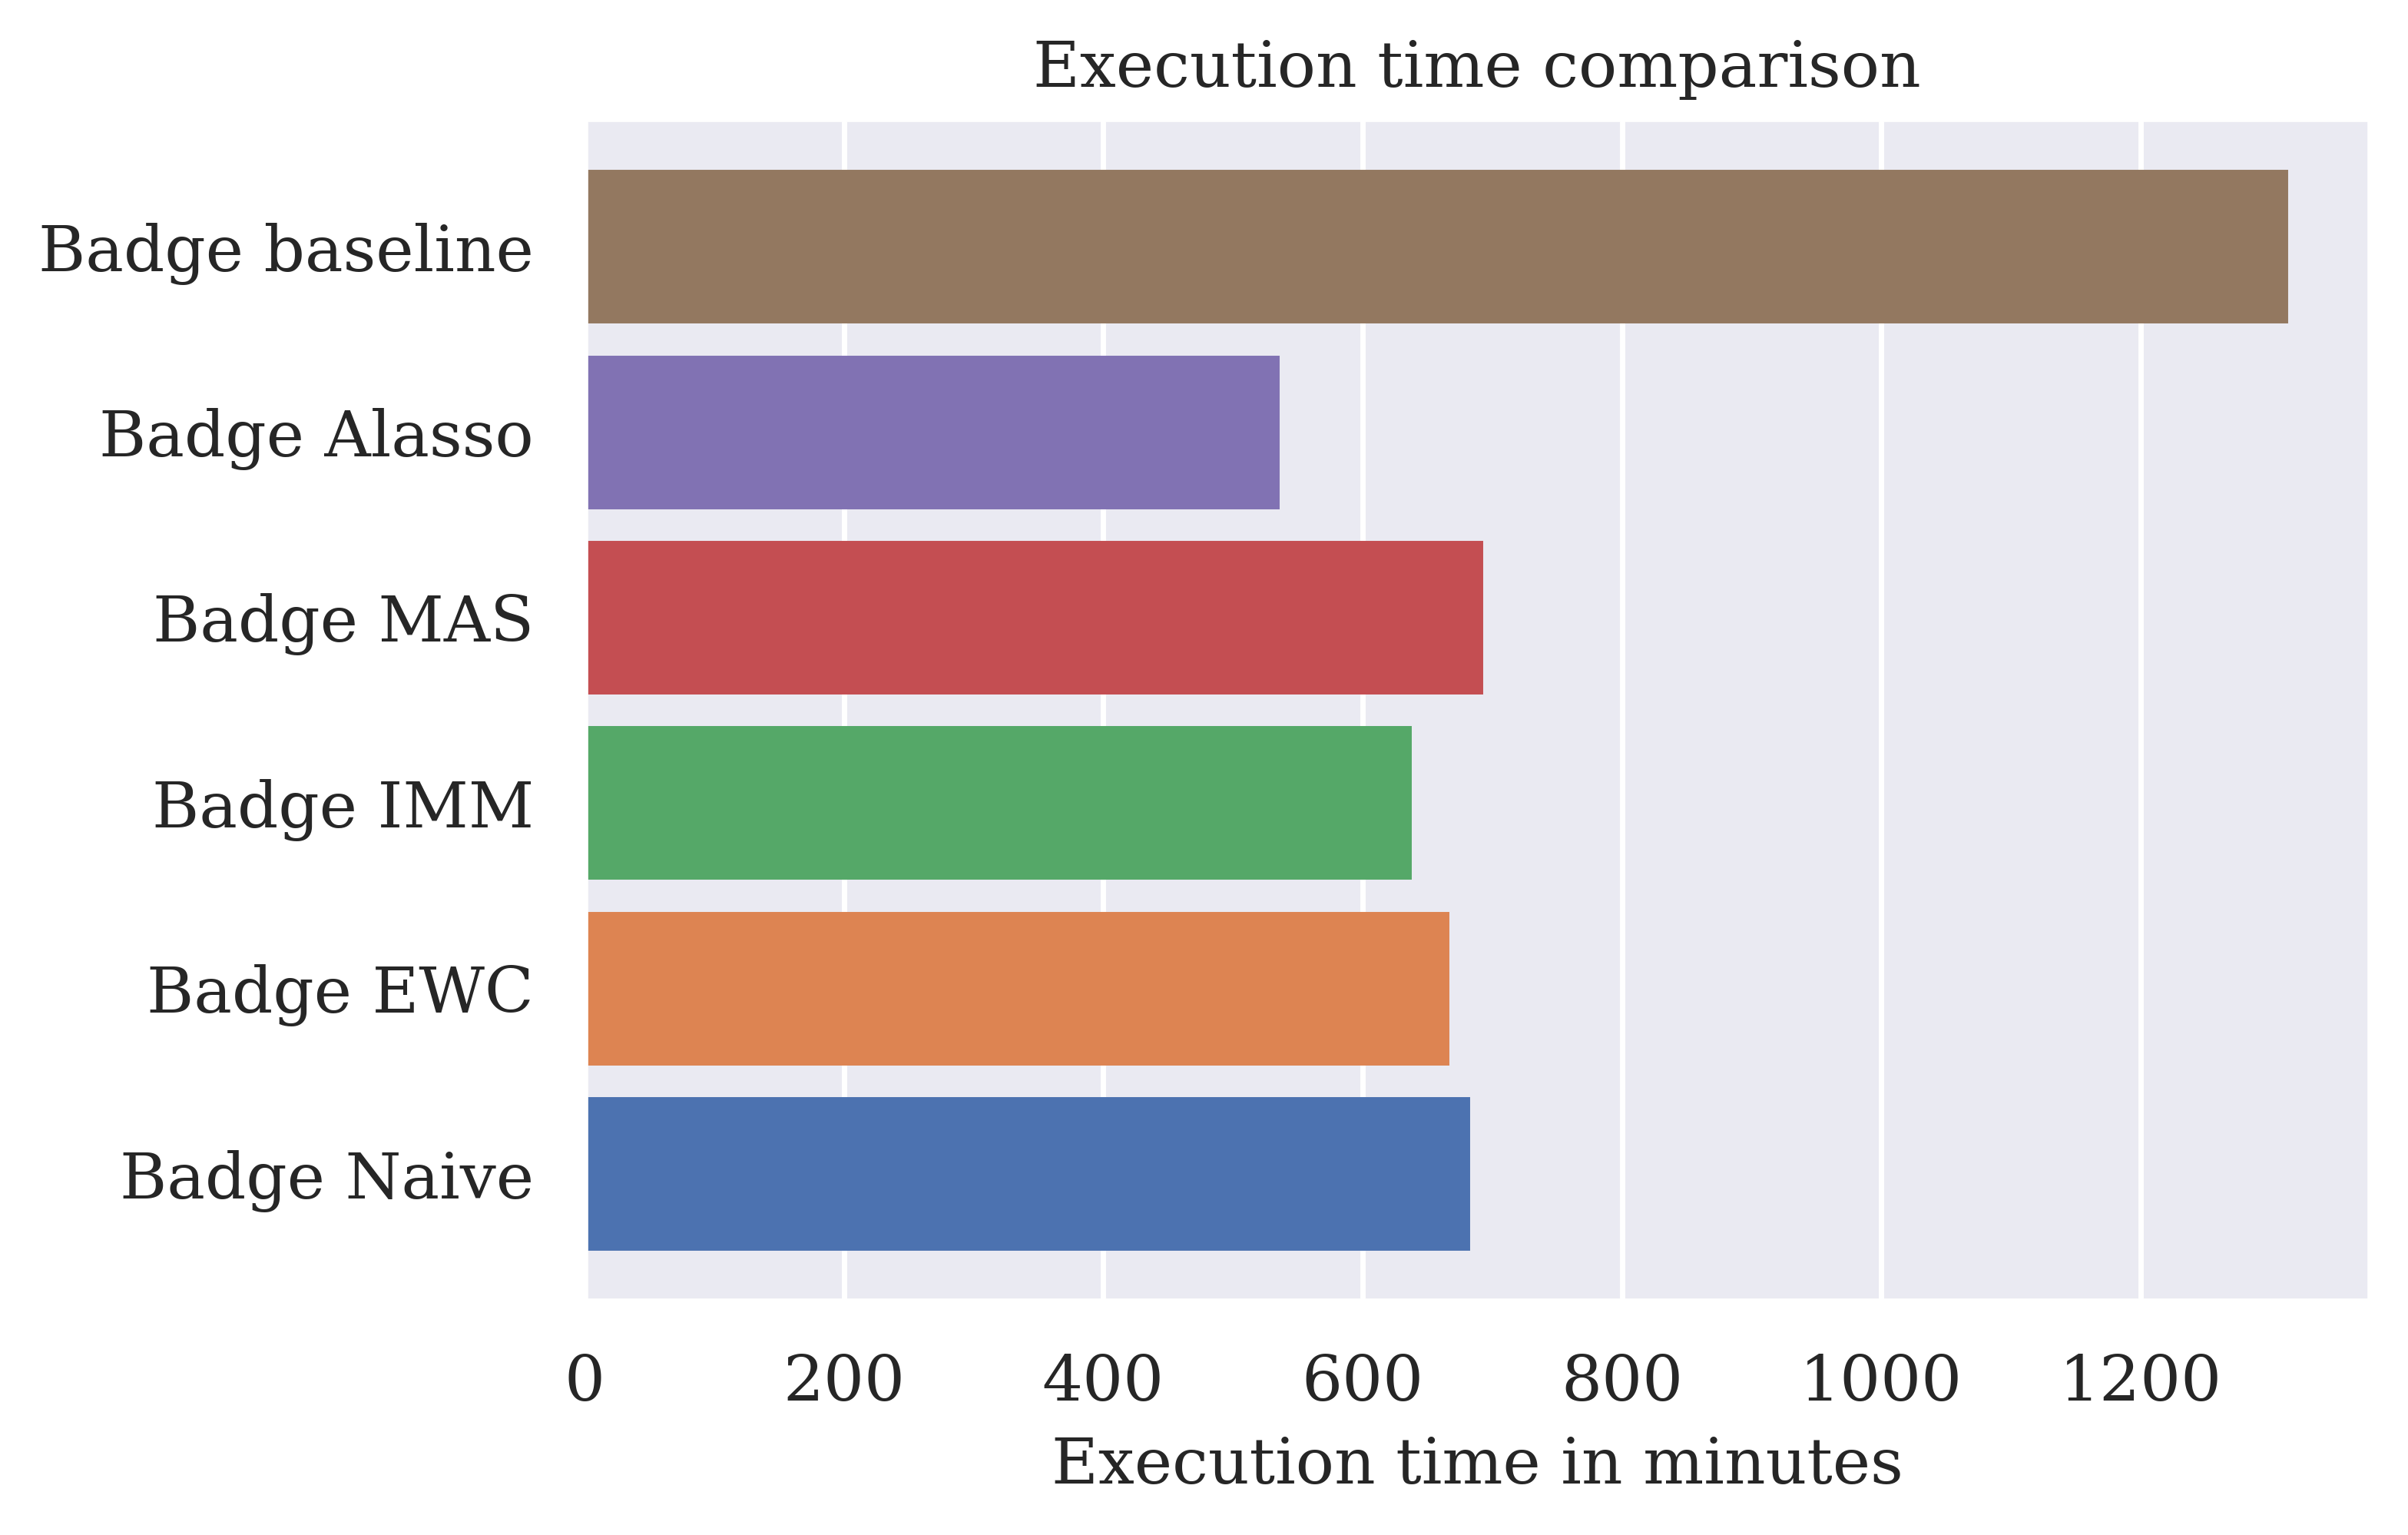

In [51]:
# 4000 Queries time
Lc_Naive_time = '01h:16m:55s'
Lc_MAS_time = '01h:28m:20s'
Lc_IMM_time = '01h:17m:32s'
Lc_EWC_time = '01h:22m:46s'
Lc_Alasso_time = '02h:07m:03s'

Random_MAS_time = '01h:21m:07s'
Random_IMM_time = '01h:15m:49s'
Random_EWC_time = '01h:21m:39s'
Random_Naive_time = '01h:21m:46s'
Random_Alasso_time = '01h:58m:16s'

Bald_Naive_time = '01h:48m:43s'
Bald_EWC_time = '01h:55m:25s'
Bald_IMM_time = '01h:48m:10s'
Bald_MAS_time = '01h:58m:37s'
Bald_Alasso_time = '02h:00m:12s'

CoreSet_Naive_time = '02h:39m:48s'
CoreSet_IMM_time = '02h:08m:55s'
CoreSet_MAS_time = '02h:25m:12s'
CoreSet_EWC_time = '02h:25m:15s'
CoreSet_Alasso_time = '03h:09m:06s'

Badge_Naive_time = '11h:20m:49s'
Badge_MAS_time = '11h:30m:23s'
Badge_IMM_time = '10h:35m:27s'
Badge_EWC_time = '11h:04m:25s'
Badge_Alasso_time = '08h:53m:52s'

Random_baseline_time = '11h:56m:42s'
Badge_baseline_time = '21h:51m:27s'
Lc_baseline_time = '11h:51m:43s'
CoreSet_baseline_time = '13h:01m:55s'
Bald_baseline_time = '12h:44m:24s'
Vaal_baseline_time = '16h:01m:15s'

data = {'Random': transform_timestamp(Random_baseline_time),
        'LC': transform_timestamp(Lc_baseline_time),
        'VAAL': transform_timestamp(Vaal_baseline_time),
        #'Bald EWC': transform_timestamp(Bald_EWC),
        #'Bald Naive' : transform_timestamp(Bald_Naive)
        }
methods = list(data.keys())
times = list(data.values())
fig, ax = plt.subplots(dpi=500)
plt_props()
data = {
        'Badge Naive' : transform_timestamp(Badge_Naive_time),
        'Badge EWC': transform_timestamp(Badge_EWC_time),
        'Badge IMM': transform_timestamp(Badge_IMM_time),
        'Badge MAS': transform_timestamp(Badge_MAS_time),
        'Badge Alasso' : transform_timestamp(Badge_Alasso_time),
        'Badge baseline': transform_timestamp(Badge_baseline_time)
        }
methods = list(data.keys())
times = list(data.values())

barplot = plt.barh(methods,times)
barplot[0].set_color((0.2980392156862745, 0.4470588235294118, 0.6901960784313725))
barplot[1].set_color((0.8666666666666667, 0.5176470588235295, 0.3215686274509804))
barplot[2].set_color((0.3333333333333333, 0.6588235294117647, 0.40784313725490196))
barplot[3].set_color((0.7686274509803922, 0.3058823529411765, 0.3215686274509804))
barplot[4].set_color((0.5058823529411764, 0.4470588235294118, 0.7019607843137254))
barplot[5].set_color((0.5764705882352941, 0.47058823529411764, 0.3764705882352941))
plt.title("Execution time comparison")
plt.xlabel("Execution time in minutes")
plt.grid(axis='x')
plt.show()

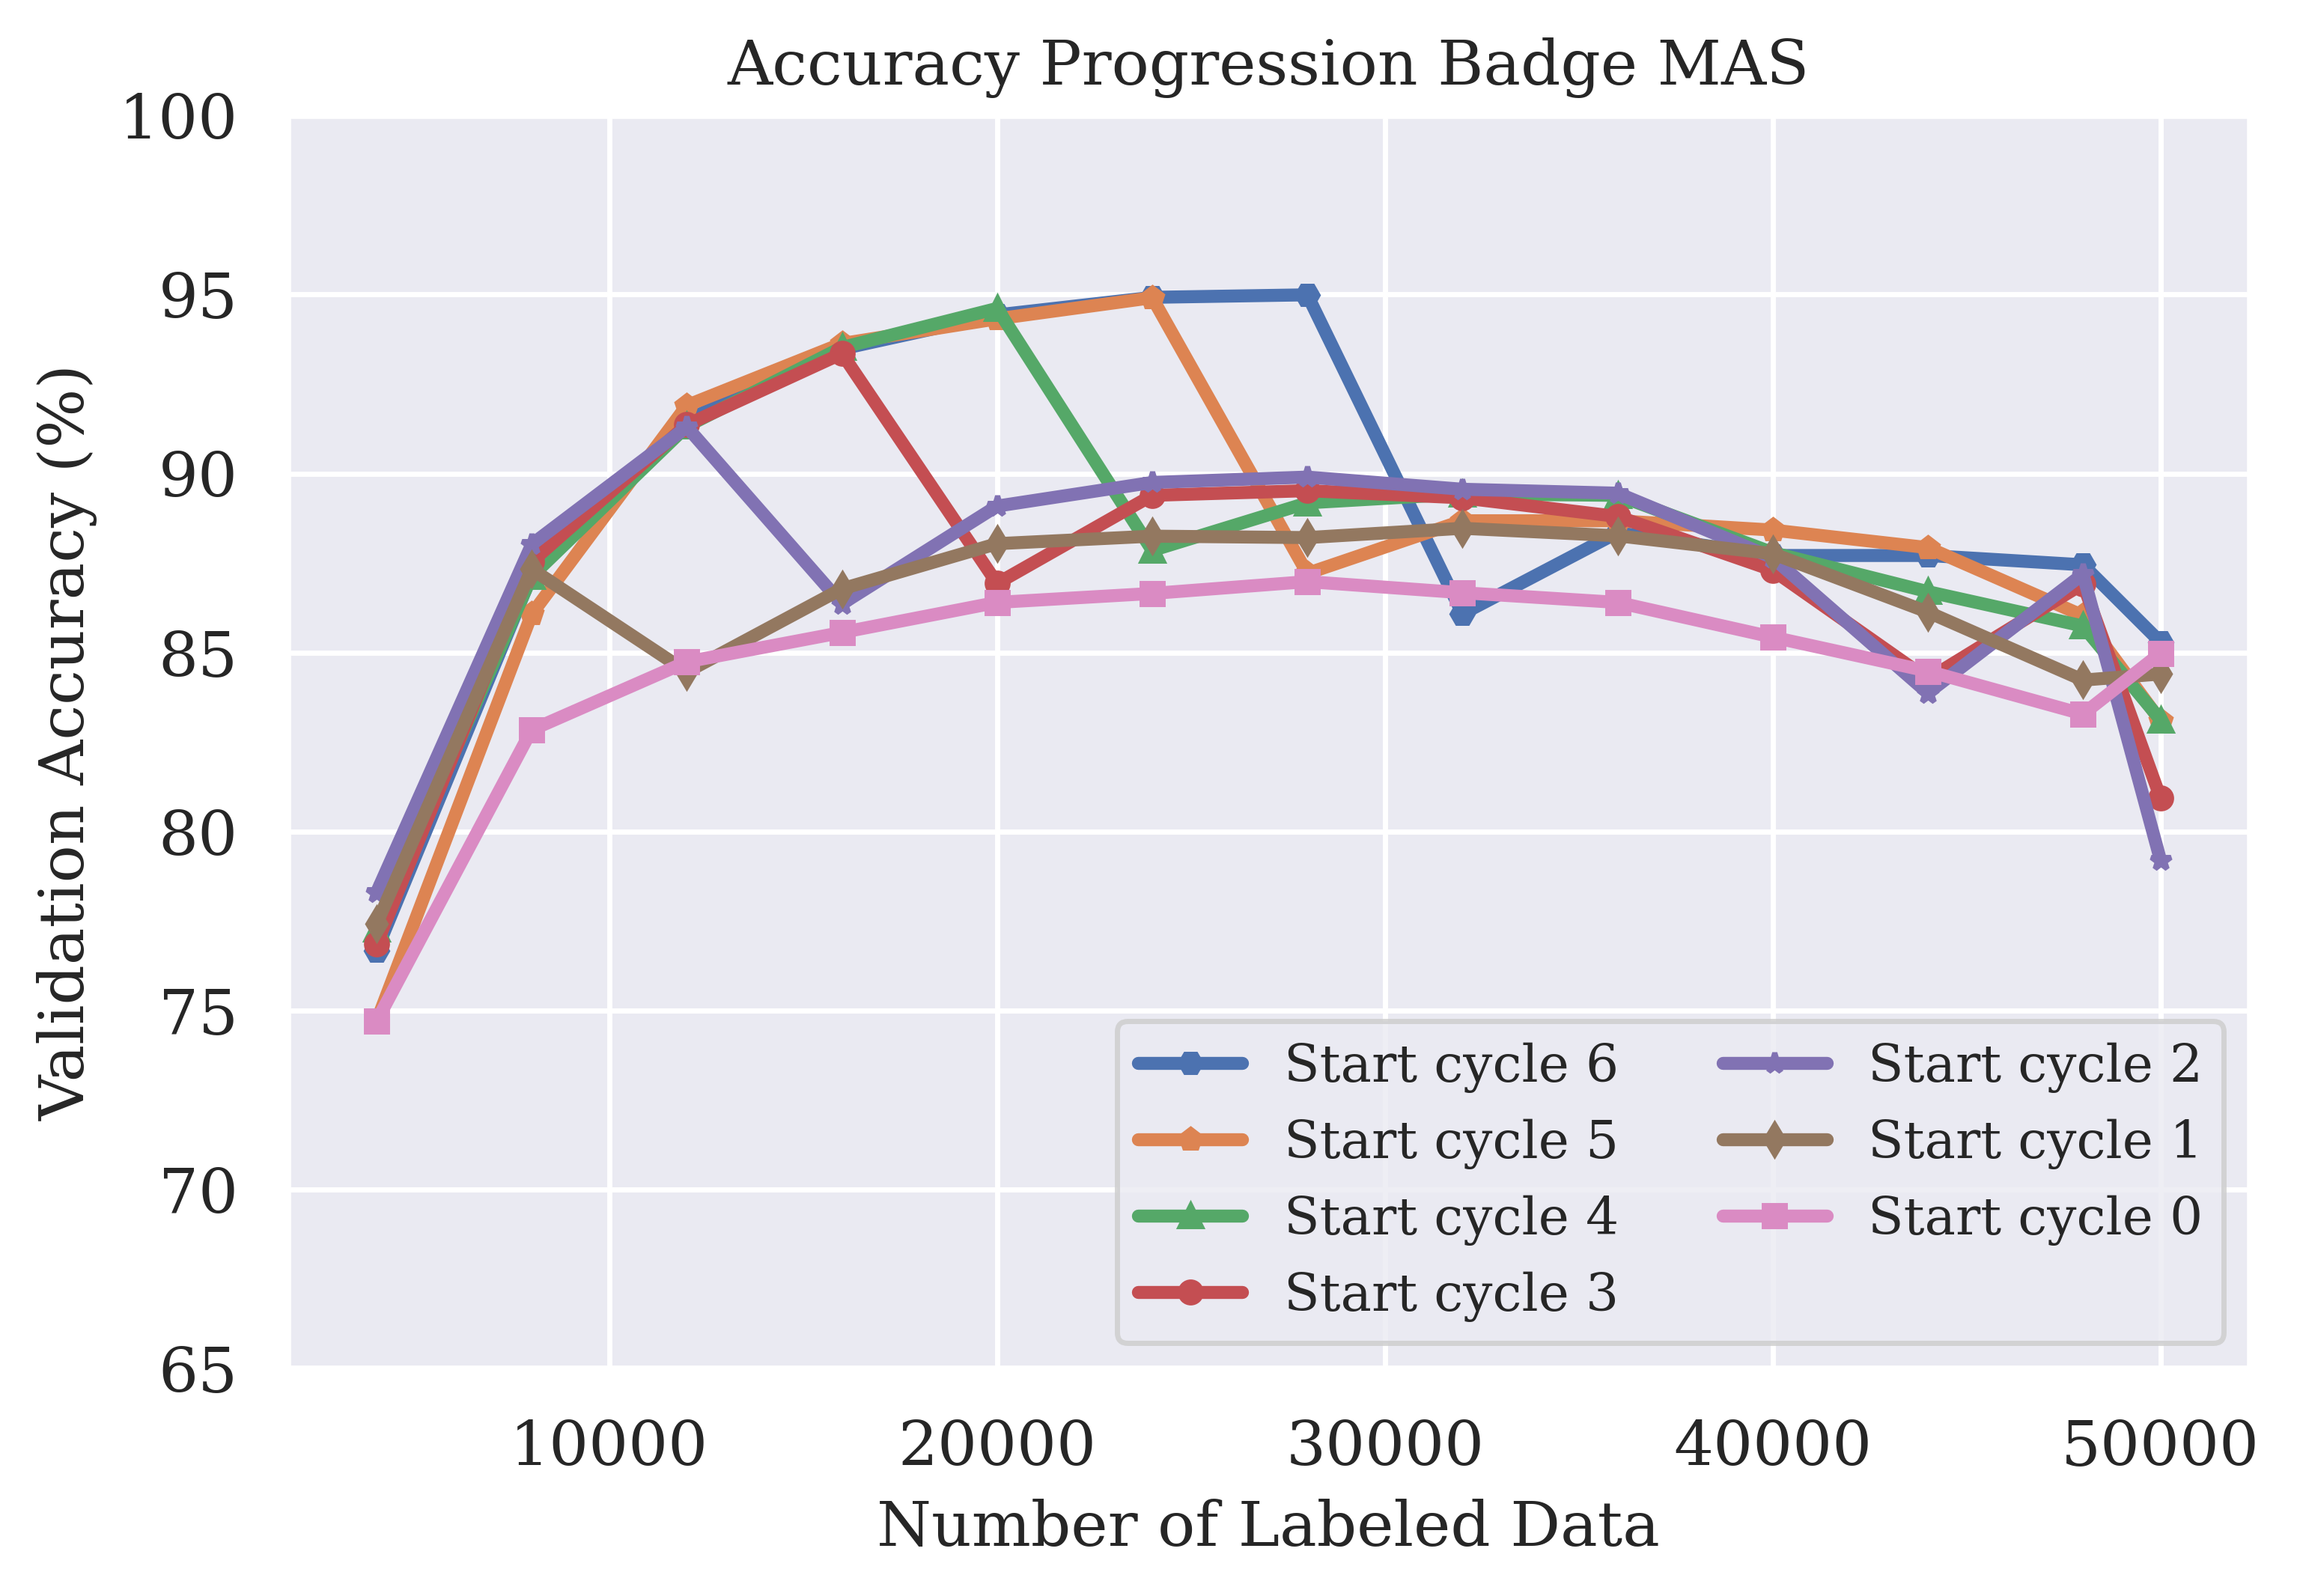

In [63]:
## Results Badge MAS Test weight 3.0
Continual_6_3 = [0.7625, 0.8736, 0.9157, 0.9344, 0.9478, 0.9488, 0.9506, 0.8623, 0.8748, 0.8762, 0.8709, 0.8352, 0.7868]
Continual_5_3 = [0.7757, 0.878, 0.9144, 0.9353, 0.9437, 0.9481, 0.8689, 0.8844, 0.8827, 0.8814, 0.8772, 0.846, 0.8368]
Continual_5_3 = [0.7661, 0.8762, 0.9173, 0.9341, 0.947, 0.9502, 0.8687, 0.8799, 0.8803, 0.875, 0.8643, 0.8581, 0.8509]
Continual_3_3 = [0.7674, 0.8696, 0.9168, 0.9356, 0.8746, 0.8887, 0.8926, 0.8906, 0.8803, 0.8396, 0.8315, 0.8277, 0.8072]
Continual_2_3 = [0.7754, 0.8783, 0.914, 0.8528, 0.8789, 0.8852, 0.8864, 0.8848, 0.876, 0.8586, 0.8322, 0.8504, 0.763]
Continual_1_3 = [0.7584, 0.8727, 0.8552, 0.8753, 0.8843, 0.885, 0.8856, 0.8866, 0.8754, 0.8523, 0.8257, 0.8358, 0.8123]
Continual_0_3 = [0.7795, 0.8284, 0.8482, 0.8524, 0.8556, 0.8598, 0.8612, 0.863, 0.8556, 0.8449, 0.8279, 0.7922, 0.8053]
Continual_0_3 = [0.7668, 0.8261, 0.8441, 0.8537, 0.8567, 0.859, 0.8592, 0.859, 0.8472, 0.8389, 0.8219, 0.7828, 0.7415]

## Results Badge MAS weight 1.0
Continual_6 = [0.7668, 0.8716, 0.9149, 0.9348, 0.9443, 0.9492, 0.9499, 0.8608, 0.8835, 0.8771, 0.8771, 0.8745, 0.8529]
Continual_5 = [0.747, 0.8607, 0.919, 0.9363, 0.9432, 0.9491, 0.8721, 0.8868, 0.8868, 0.8842, 0.8793, 0.8603, 0.8309]
Continual_4 = [0.7728, 0.8713, 0.9132, 0.9352, 0.9461, 0.8785, 0.8918, 0.8943, 0.8939, 0.8779, 0.867, 0.8574, 0.8312]
Continual_3 = [0.7685, 0.8754, 0.9136, 0.9335, 0.8693, 0.8939, 0.8952, 0.8932, 0.888, 0.873, 0.8426, 0.8692, 0.8094]
Continual_2 = [0.783, 0.8802, 0.913, 0.8636, 0.8909, 0.8975, 0.899, 0.8956, 0.8945, 0.8765, 0.8387, 0.8719, 0.792]
Continual_1 = [0.7742, 0.8733, 0.8446, 0.8678, 0.8804, 0.8825, 0.8821, 0.8847, 0.8826, 0.8776, 0.8613, 0.8423, 0.844]
Continual_0 = [0.747, 0.8284, 0.8474, 0.8556, 0.864, 0.8665, 0.8698, 0.8667, 0.864, 0.8543, 0.8448, 0.8328, 0.8498]

x = [(i+1)*4000 for i in range(12)] + [50000]
m={}
m['MAS']='o'
m['CoreSet']='>'
m['IMM']='^'
m['Alasso']='*'
m['Baseline']='d'
m['EWC']='p'
m['Naive']='H'
m['emp']='s'
m['SA']=','
fig, ax = plt.subplots(dpi=500)
plt_props()

a = [x*100 for x in Continual_6]
b = [x*100 for x in Continual_5]
c = [x*100 for x in Continual_4]
d = [x*100 for x in Continual_3]
e = [x*100 for x in Continual_2]
f = [x*100 for x in Continual_1]
g = [x*100 for x in Continual_0]
random_naive, = plt.plot(x, a, label='Start cycle 6', marker=m['Naive'])
random_ewc, = plt.plot(x, b, label='Start cycle 5', marker=m['EWC'])
random_imm, = plt.plot(x, c, label='Start cycle 4', marker=m['IMM'])
random_mas, = plt.plot(x, d, label='Start cycle 3', marker=m['MAS'])
random_alasso, = plt.plot(x,e,label='Start cycle 2',marker=m['Alasso'])
random_baseline, = plt.plot(x, f, label='Start cycle 1', marker=m['Baseline'])
random_2, = plt.plot(x, g, label='Start cycle 0', marker=m['emp'])

#cifar10_empirical_plot = plt.plot(x, Random_Naive, label='VAAL', marker=m['VAAL'])

ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
plt.legend(handles=[random_naive, random_ewc, random_imm, random_mas, random_alasso, random_baseline, random_2], loc=4)

#ax.set_xlim(9.8, 40.4)
#ax.set_ylim(40.0, 82.0)
#plt.plot([], [], ' ', label= r"Top-1" 
#                            r"$=90.16 \pm 0.25$")
plt.legend(ncol=2, loc='lower right')
fig.tight_layout()
plt.ylim(65,100)
plt.xlabel('Number of Labeled Data')
plt.ylabel('Validation Accuracy (%)')  
plt.title('Accuracy Progression Badge MAS')
plt.grid(True)
plt.show()

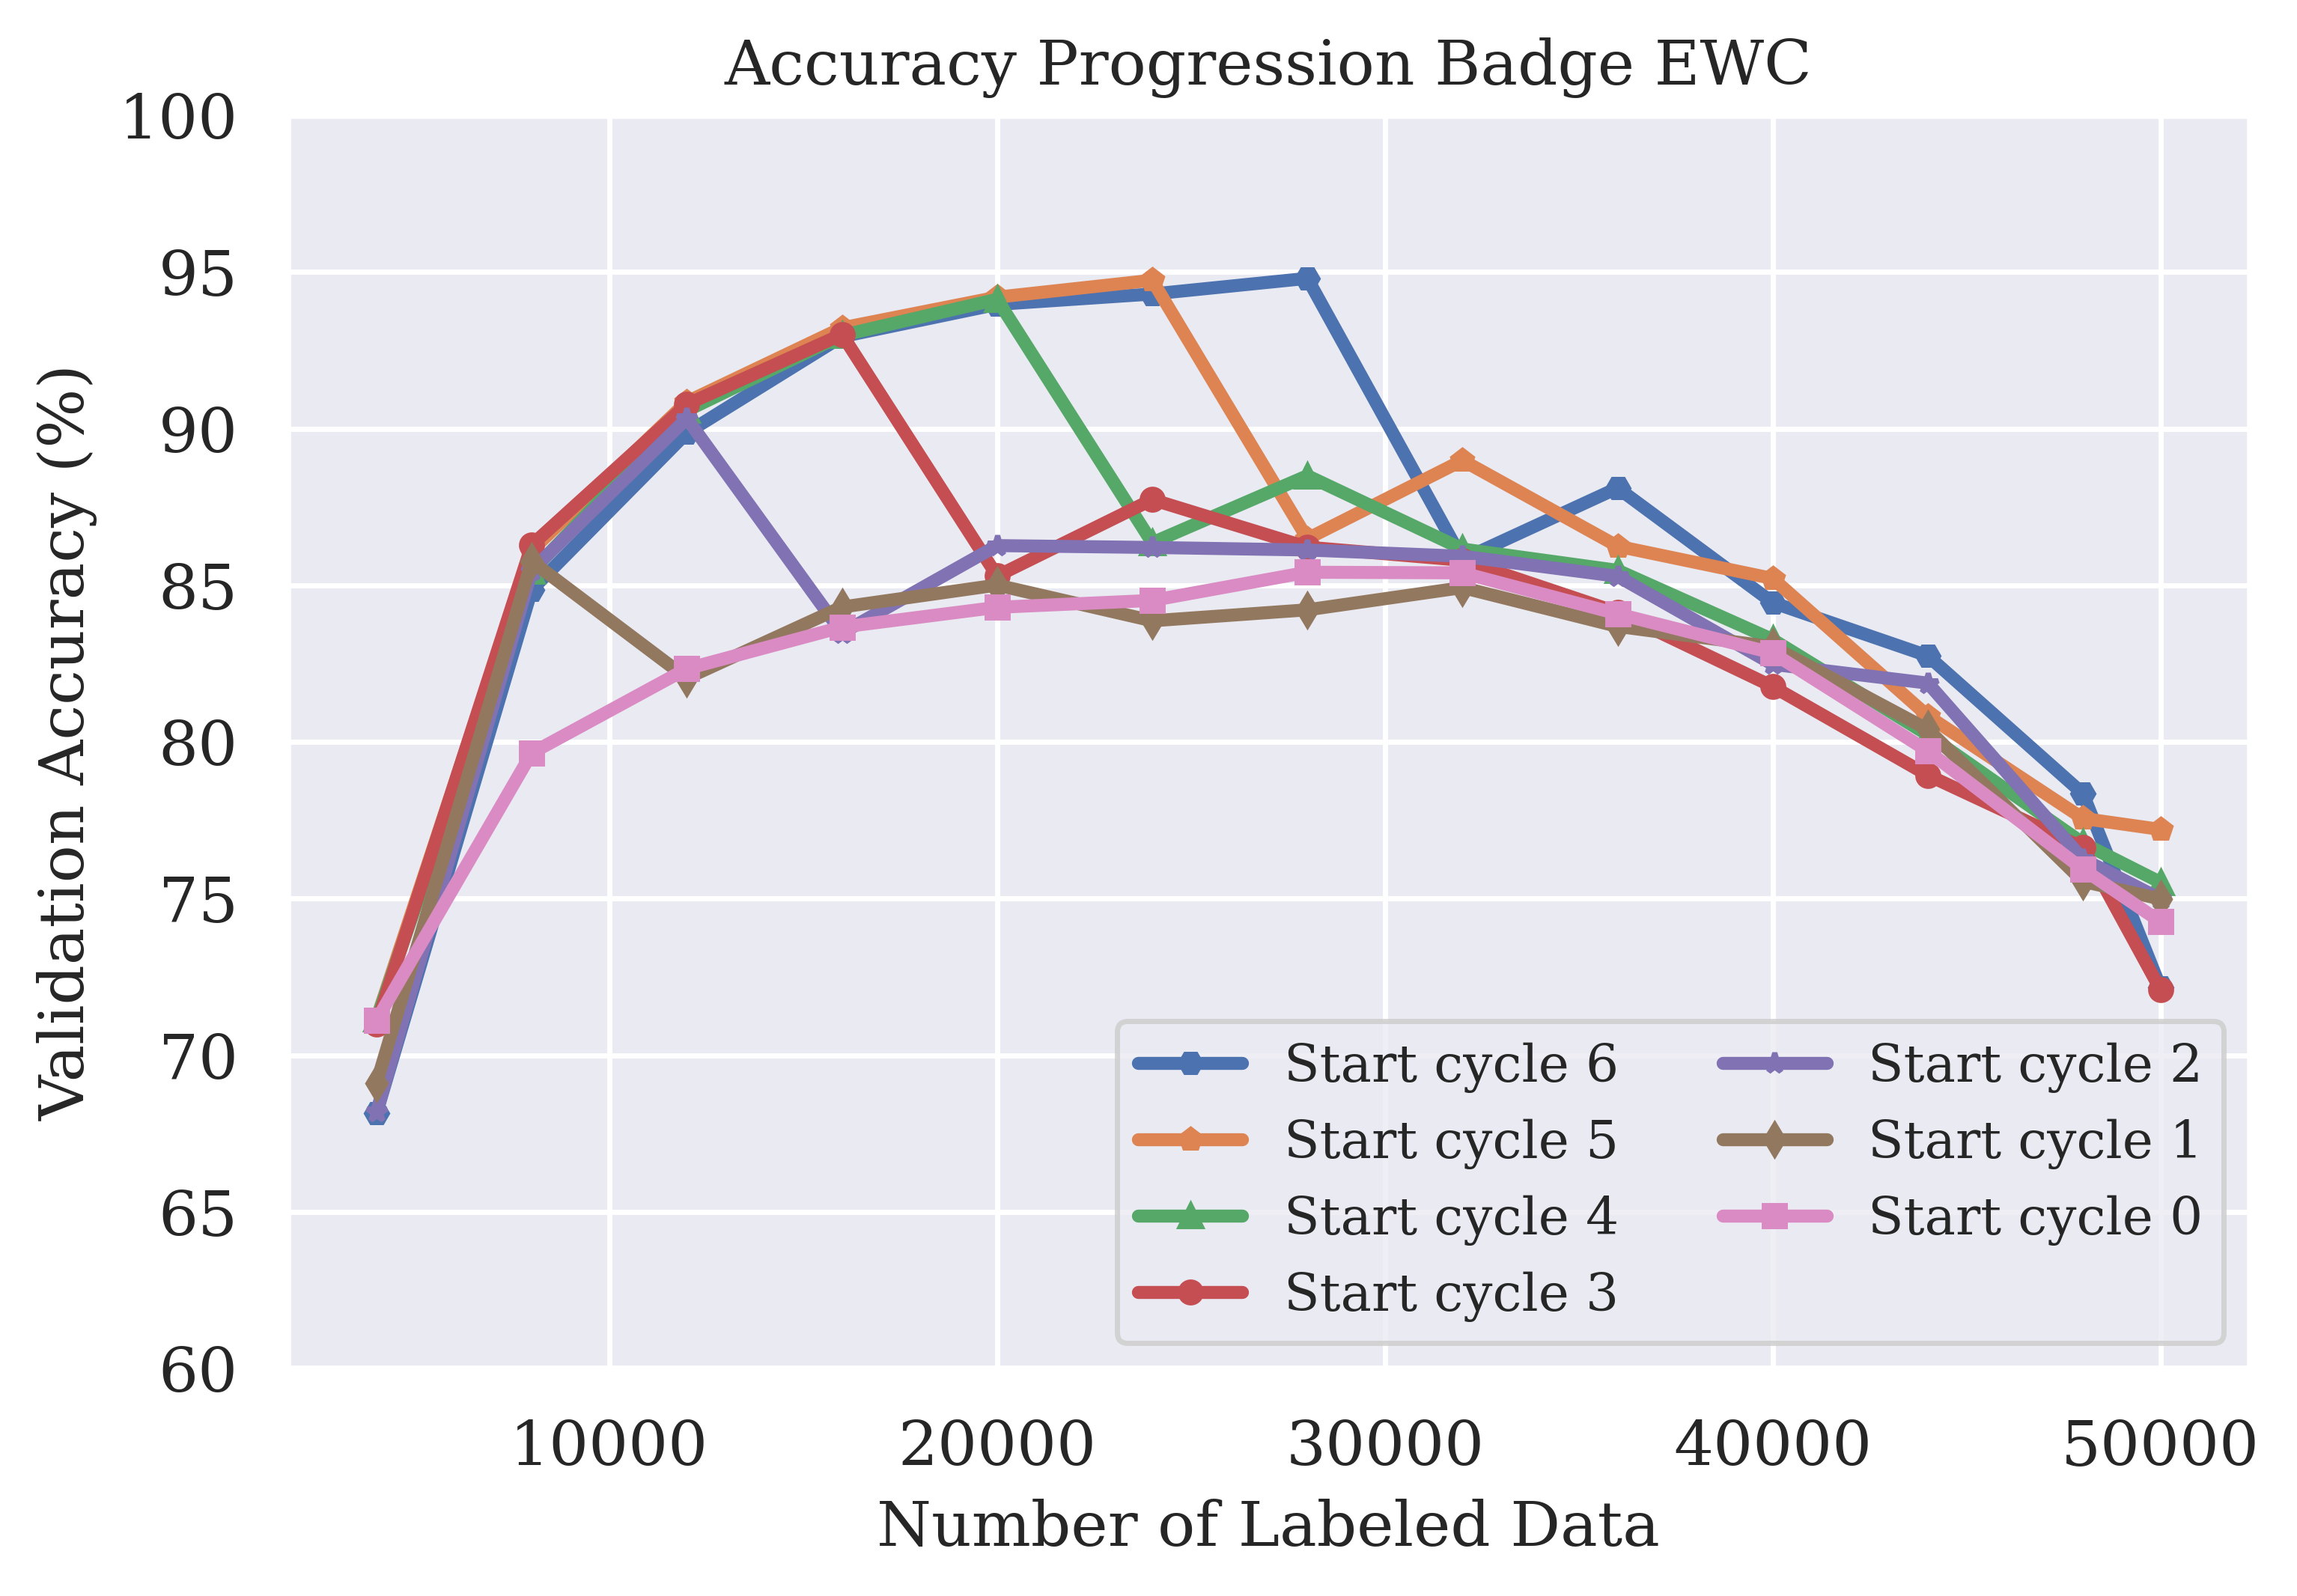

In [62]:
## Results Badge EWC Test weight 1.0
Continual_6 = [0.6816, 0.8486, 0.8987, 0.9294, 0.9397, 0.943, 0.948, 0.8583, 0.8811, 0.8445, 0.8275, 0.7835, 0.7216]
Continual_5 = [0.7117, 0.8612, 0.9086, 0.9322, 0.942, 0.9474, 0.8649, 0.8899, 0.8625, 0.8522, 0.8083, 0.7756, 0.7721]
Continual_4 = [0.7116, 0.8545, 0.9058, 0.9298, 0.9413, 0.8636, 0.885, 0.8616, 0.8548, 0.8327, 0.8023, 0.7677, 0.7552]
Continual_3 = [0.71, 0.8629, 0.9078, 0.9301, 0.853, 0.8774, 0.8622, 0.858, 0.8414, 0.8177, 0.7894, 0.7663, 0.7209]
Continual_2 = [0.6819, 0.8548, 0.9033, 0.8348, 0.8627, 0.8621, 0.8613, 0.8593, 0.8529, 0.8248, 0.8188, 0.7626, 0.7499]
Continual_1 = [0.6912, 0.8577, 0.8204, 0.8431, 0.8501, 0.8387, 0.8422, 0.8493, 0.8369, 0.8304, 0.804, 0.7555, 0.7499]
Continual_0 = [0.7112, 0.7965, 0.8234, 0.8367, 0.843, 0.8452, 0.8542, 0.854, 0.8409, 0.8284, 0.7971, 0.7594, 0.7426]
x = [(i+1)*4000 for i in range(12)] + [50000]
m={}
m['MAS']='o'
m['CoreSet']='>'
m['IMM']='^'
m['Alasso']='*'
m['Baseline']='d'
m['EWC']='p'
m['Naive']='H'
m['emp']='s'
m['SA']=','
fig, ax = plt.subplots(dpi=500)
plt_props()

a = [x*100 for x in Continual_6]
b = [x*100 for x in Continual_5]
c = [x*100 for x in Continual_4]
d = [x*100 for x in Continual_3]
e = [x*100 for x in Continual_2]
f = [x*100 for x in Continual_1]
g = [x*100 for x in Continual_0]
random_naive, = plt.plot(x, a, label='Start cycle 6', marker=m['Naive'])
random_ewc, = plt.plot(x, b, label='Start cycle 5', marker=m['EWC'])
random_imm, = plt.plot(x, c, label='Start cycle 4', marker=m['IMM'])
random_mas, = plt.plot(x, d, label='Start cycle 3', marker=m['MAS'])
random_alasso, = plt.plot(x,e,label='Start cycle 2',marker=m['Alasso'])
random_baseline, = plt.plot(x, f, label='Start cycle 1', marker=m['Baseline'])
random_2, = plt.plot(x, g, label='Start cycle 0', marker=m['emp'])

#cifar10_empirical_plot = plt.plot(x, Random_Naive, label='VAAL', marker=m['VAAL'])

ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
plt.legend(handles=[random_naive, random_ewc, random_imm, random_mas, random_alasso, random_baseline, random_2], loc=4)

#ax.set_xlim(9.8, 40.4)
#ax.set_ylim(40.0, 82.0)
#plt.plot([], [], ' ', label= r"Top-1" 
#                            r"$=90.16 \pm 0.25$")
plt.legend(ncol=2, loc='lower right')
fig.tight_layout()
plt.ylim(60,100)
plt.xlabel('Number of Labeled Data')
plt.ylabel('Validation Accuracy (%)')  
plt.title('Accuracy Progression Badge EWC')
plt.grid(True)
plt.show()

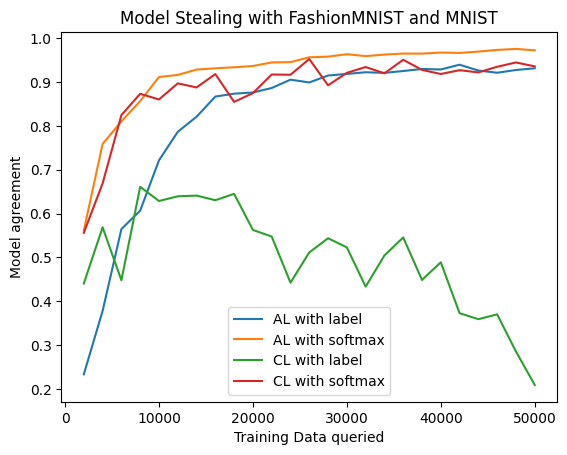

In [3]:
# Model stealing results
# Substitute model: Resnet18,TinyImagenet Target model: TestConv,CIFAR-10, label used
Resnet_TestConv_acc = [0.2592, 0.2993, 0.2825, 0.3153, 0.3055, 0.3024, 0.2826, 0.2954, 0.2419, 0.3608, 0.2655, 0.2915, 0.2831]
Resnet_TestConv_agreement = [0.2874, 0.3262, 0.311, 0.3482, 0.3319, 0.3348, 0.3156, 0.3175, 0.2608, 0.3885, 0.2923, 0.3212, 0.3147]

# Substitute model: Resnet18,FashionMNIST Target model: TestConv,MNIST, label used
Resnet_Fmnist_TestConv_mnist_acc = [0.441, 0.5682, 0.4472, 0.6593, 0.628, 0.6381, 0.6395, 0.6305, 0.6437, 0.5617, 0.5461, 0.4409, 0.5109, 0.5434, 0.5227, 0.4331, 0.5042, 0.5448, 0.4479, 0.489, 0.3721, 0.3592, 0.3706, 0.2852, 0.2085]
Resnet_Fmnist_TestConv_mnist_agreement = [0.4406, 0.5688, 0.448, 0.6611, 0.6288, 0.6395, 0.6411, 0.6306, 0.6451, 0.5627, 0.5477, 0.4425, 0.5115, 0.5438, 0.523, 0.4334, 0.5045, 0.5456, 0.4487, 0.489, 0.3728, 0.3592, 0.3702, 0.2854, 0.2092]

# Substitute model: Resnet18,FashionMNIST Target model: TestConv,MNIST, softmax output used
Resnet_Fmnist_TestConv_mnist_softmax_acc = [0.555, 0.6671, 0.8218, 0.8707, 0.8581, 0.8946, 0.8855, 0.9141, 0.8521, 0.8721, 0.9149, 0.9129, 0.9495, 0.891, 0.9199, 0.9327, 0.9178, 0.9488, 0.9251, 0.9168, 0.9252, 0.9187, 0.9318, 0.9423, 0.9331]
Resnet_Fmnist_TestConv_mnist_softmax_agreement =  [0.5561, 0.6689, 0.8247, 0.8733, 0.8604, 0.8971, 0.8878, 0.9183, 0.8548, 0.8749, 0.9173, 0.9168, 0.9526, 0.8927, 0.9211, 0.9344, 0.92, 0.9509, 0.9278, 0.9185, 0.9272, 0.9221, 0.935, 0.9448, 0.9359]

# Substitute model: TestConv,FashionMNIST Target model: Resnet18,MNIST, label used
TestConv_Fmnist_Resnet_Mnist_label_agreement =  [0.1883, 0.1669, 0.1704, 0.2063, 0.1702, 0.2276, 0.171, 0.1989, 0.145, 0.1921, 0.1723, 0.2012, 0.2142, 0.1445, 0.1593, 0.1381, 0.1383, 0.1429, 0.1858, 0.1928, 0.1162, 0.1655, 0.206, 0.1396, 0.2246]

b4000 = [0.3169, 0.3049, 0.3623, 0.3006, 0.3596, 0.3634, 0.3669, 0.3167, 0.3338, 0.3492, 0.3732, 0.3523, 0.3863]
b2000 = [0.2562, 0.2916, 0.2968, 0.3007, 0.2414, 0.2916, 0.3266, 0.2895, 0.3298, 0.2627, 0.2883, 0.3148, 0.3234, 0.2861, 0.3408, 0.3504, 0.2235, 0.3255, 0.3125, 0.3092, 0.319, 0.3231, 0.2643, 0.2755, 0.3249]

# Active Learning with Substitutee Model Resnet18, trained on FashionMNIST and Target Model TestConv, trained on MNIST with label
al_testconv_label_acc = [0.2319, 0.3769, 0.5645, 0.6053, 0.7203, 0.7838, 0.819, 0.864, 0.8702, 0.8739, 0.8848, 0.9035, 0.8987, 0.9134, 0.9166, 0.9202, 0.9181, 0.9221, 0.9272, 0.9257, 0.9372, 0.9255, 0.9187, 0.9251, 0.9286]
al_testconv_label_agreement = [0.2334, 0.378, 0.5647, 0.6069, 0.7215, 0.7866, 0.821, 0.867, 0.8736, 0.8763, 0.8865, 0.9056, 0.8992, 0.915, 0.9187, 0.9225, 0.9211, 0.9253, 0.9299, 0.9288, 0.9397, 0.9264, 0.9214, 0.9276, 0.9316]

# Active Learning with Substitutee Model Resnet18, trained on FashionMNIST and Target Model TestConv, trained on MNIST with softmax output
al_testconv_softmax__acc = [0.56, 0.7558, 0.8064, 0.8519, 0.907, 0.9111, 0.9231, 0.9266, 0.9287, 0.9318, 0.9394, 0.9398, 0.951, 0.9527, 0.9582, 0.9543, 0.9576, 0.9596, 0.9608, 0.9624, 0.9617, 0.9641, 0.9686, 0.9708, 0.9677]
al_testconv_softmax_agreement = [0.5615, 0.7589, 0.8104, 0.8566, 0.9116, 0.9164, 0.9285, 0.9315, 0.9338, 0.9367, 0.9449, 0.9455, 0.9566, 0.9581, 0.9637, 0.9593, 0.9628, 0.9651, 0.965, 0.9674, 0.9665, 0.9696, 0.9735, 0.9757, 0.9725]


x = [(i+1)*2000 for i in range(25)]
x2 = [(i+1)*4000 for i in range(12)] + [50000]
plt.plot(x,al_testconv_label_agreement,label="AL with label")
plt.plot(x,al_testconv_softmax_agreement,label="AL with softmax")
plt.plot(x,Resnet_Fmnist_TestConv_mnist_agreement,label="CL with label")
plt.plot(x,Resnet_Fmnist_TestConv_mnist_softmax_agreement,label="CL with softmax")
plt.title("Model Stealing with FashionMNIST and MNIST")
plt.xlabel("Training Data queried")
plt.ylabel("Model agreement")
plt.legend()
plt.show()

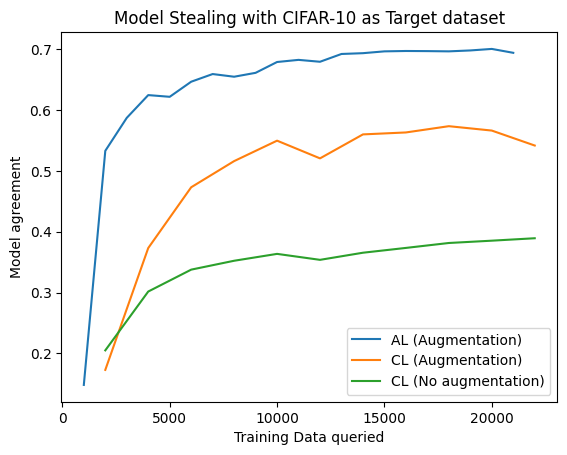

In [5]:
# Using SmallImageNet
TinyImagenet_MNIST = [0.0896, 0.0899, 0.1881, 0.1883, 0.1807, 0.2223, 0.1995, 0.2054, 0.1955, 0.1861, 0.1891]
SmallImageNet_MNIST = [0.0916, 0.2697, 0.6, 0.6311, 0.6752, 0.632, 0.6404, 0.6483, 0.7172, 0.7715, 0.7986]

# Continual Active Learning vs Active Learning
Active_Learning = [0.3732, 0.4098, 0.3179, 0.385, 0.4194, 0.3994, 0.5971, 0.5807, 0.6497, 0.6073, 0.7102]
Continual_Learning = [0.3629, 0.1628, 0.4284, 0.414, 0.3587, 0.3199, 0.3278, 0.3443, 0.1241, 0.1609, 0.2741]

with_label = [0.0899, 0.1575, 0.307, 0.5215, 0.5436, 0.6733, 0.6937, 0.6597, 0.7378, 0.7154, 0.748, 0.7289, 0.7866, 0.7411, 0.7756, 0.7851, 0.8023, 0.8198, 0.8031, 0.8172, 0.7908]
with_softmax = [0.216, 0.5649, 0.6788, 0.7626, 0.8363, 0.7876, 0.8315, 0.8673, 0.8762, 0.8864, 0.8849, 0.899, 0.8894, 0.9061, 0.89, 0.9034, 0.9094, 0.9142, 0.8937, 0.9205, 0.9067]

cifar_10_label = [0.1162, 0.3844, 0.456, 0.5061, 0.507, 0.5701, 0.5923, 0.5969, 0.6029, 0.6117, 0.6215, 0.6154, 0.6195, 0.6209, 0.6224, 0.6451, 0.6165, 0.6493, 0.6356, 0.6334, 0.6059]
cifar_10_softmax = [0.1794, 0.4779, 0.5651, 0.6082, 0.6308, 0.6506, 0.6567, 0.6689, 0.6847, 0.684, 0.684, 0.6947, 0.6989, 0.691, 0.6878, 0.7014, 0.6975, 0.7082, 0.7124, 0.7033, 0.6999]

cl_cifar_10_softmax = [0.1488, 0.3339, 0.477, 0.5235, 0.5546, 0.5818, 0.5822, 0.5877, 0.6148, 0.6161, 0.611, 0.6135, 0.6103, 0.5944, 0.6018, 0.5985, 0.5932, 0.573, 0.6124, 0.6069, 0.6164]
cl_cifar_10_label = [0.1676, 0.2714, 0.4071, 0.4508, 0.4448, 0.4796, 0.4921, 0.4857, 0.4703, 0.4964, 0.4916, 0.4501, 0.4541, 0.4884, 0.4806, 0.464, 0.4783, 0.5022, 0.4871, 0.4437, 0.431]

mnist_coreset_replay = [0.1176, 0.3179, 0.5305, 0.6286, 0.7086, 0.6451, 0.6485, 0.6723, 0.6641, 0.7031, 0.6625]
mnist_coreset_al = [0.1175, 0.5781, 0.5478, 0.7008, 0.7195, 0.7316, 0.7545, 0.8037, 0.7888, 0.8516, 0.8507, 0.8772, 0.8035, 0.8809, 0.8651, 0.8876, 0.8682, 0.9006, 0.8763, 0.8744, 0.894]

cl_mnist_softmax = [0.103, 0.2106, 0.5274, 0.3893, 0.4979, 0.4166, 0.3972, 0.5102, 0.6043, 0.4774, 0.5291, 0.5521, 0.5196, 0.674, 0.5997, 0.5624, 0.4746, 0.6603, 0.5452, 0.4781, 0.5206]

mnist_softmax_no_aug = [0.139, 0.9245, 0.9223, 0.945, 0.9584, 0.9694, 0.9706, 0.9695, 0.9759, 0.9747, 0.9772, 0.9731, 0.9776, 0.9761, 0.9754, 0.9775, 0.9769, 0.9802, 0.982, 0.9803, 0.9794]
cl_mnist_softmax_no_aug = [0.7677, 0.8868, 0.9094, 0.9259, 0.943, 0.9623, 0.9243, 0.9548, 0.947, 0.9352, 0.9539, 0.932, 0.9523, 0.9497, 0.9637, 0.9424, 0.9545, 0.9457, 0.9487, 0.9675, 0.9559]

cl_cifar_softmax_no_aug = [0.2049, 0.3016, 0.3376, 0.3522, 0.3635, 0.3537, 0.3654, 0.3733, 0.3814, 0.3852, 0.3892, 0.3859, 0.388, 0.394, 0.3845, 0.3976, 0.4106, 0.4011, 0.417, 0.3902, 0.4048]
al_cifar_softmax_aug = [0.1481, 0.5329, 0.5871, 0.6245, 0.6217, 0.6465, 0.6591, 0.6547, 0.6611, 0.6789, 0.6824, 0.6793, 0.6921, 0.6934, 0.6964, 0.697, 0.6968, 0.6964, 0.6979, 0.7004, 0.694]
cl_cifar_softmax_aug = [0.1728, 0.3731, 0.473, 0.516, 0.5496, 0.5205, 0.5599, 0.5631, 0.5734, 0.5662, 0.5416, 0.5696, 0.5638, 0.6029, 0.5614, 0.5787, 0.572, 0.5769, 0.573, 0.5717, 0.588]

x = [(i+1)*1000 for i in range(21)]
x2 = [(i+1)*2000 for i in range(11)]
plt.plot(x,al_cifar_softmax_aug,label="AL (Augmentation)")
plt.plot(x2,cl_cifar_softmax_aug[:11],label="CL (Augmentation)")
plt.plot(x2,cl_cifar_softmax_no_aug[:11],label="CL (No augmentation)")
#plt.plot(x2,cl_mnist_softmax[:11],label="CL Softmax")
#plt.plot(x2,cl_cifar_10_label[:11],label="CL Label")
#plt.plot(x,Resnet_Fmnist_TestConv_mnist_agreement,label="CL with label")
#plt.plot(x,Resnet_Fmnist_TestConv_mnist_softmax_agreement,label="CL with softmax")
plt.title("Model Stealing with CIFAR-10 as Target dataset")
plt.xlabel("Training Data queried")
plt.ylabel("Model agreement")
#plt.ylim(0.0,1.0)
plt.legend()
plt.show()

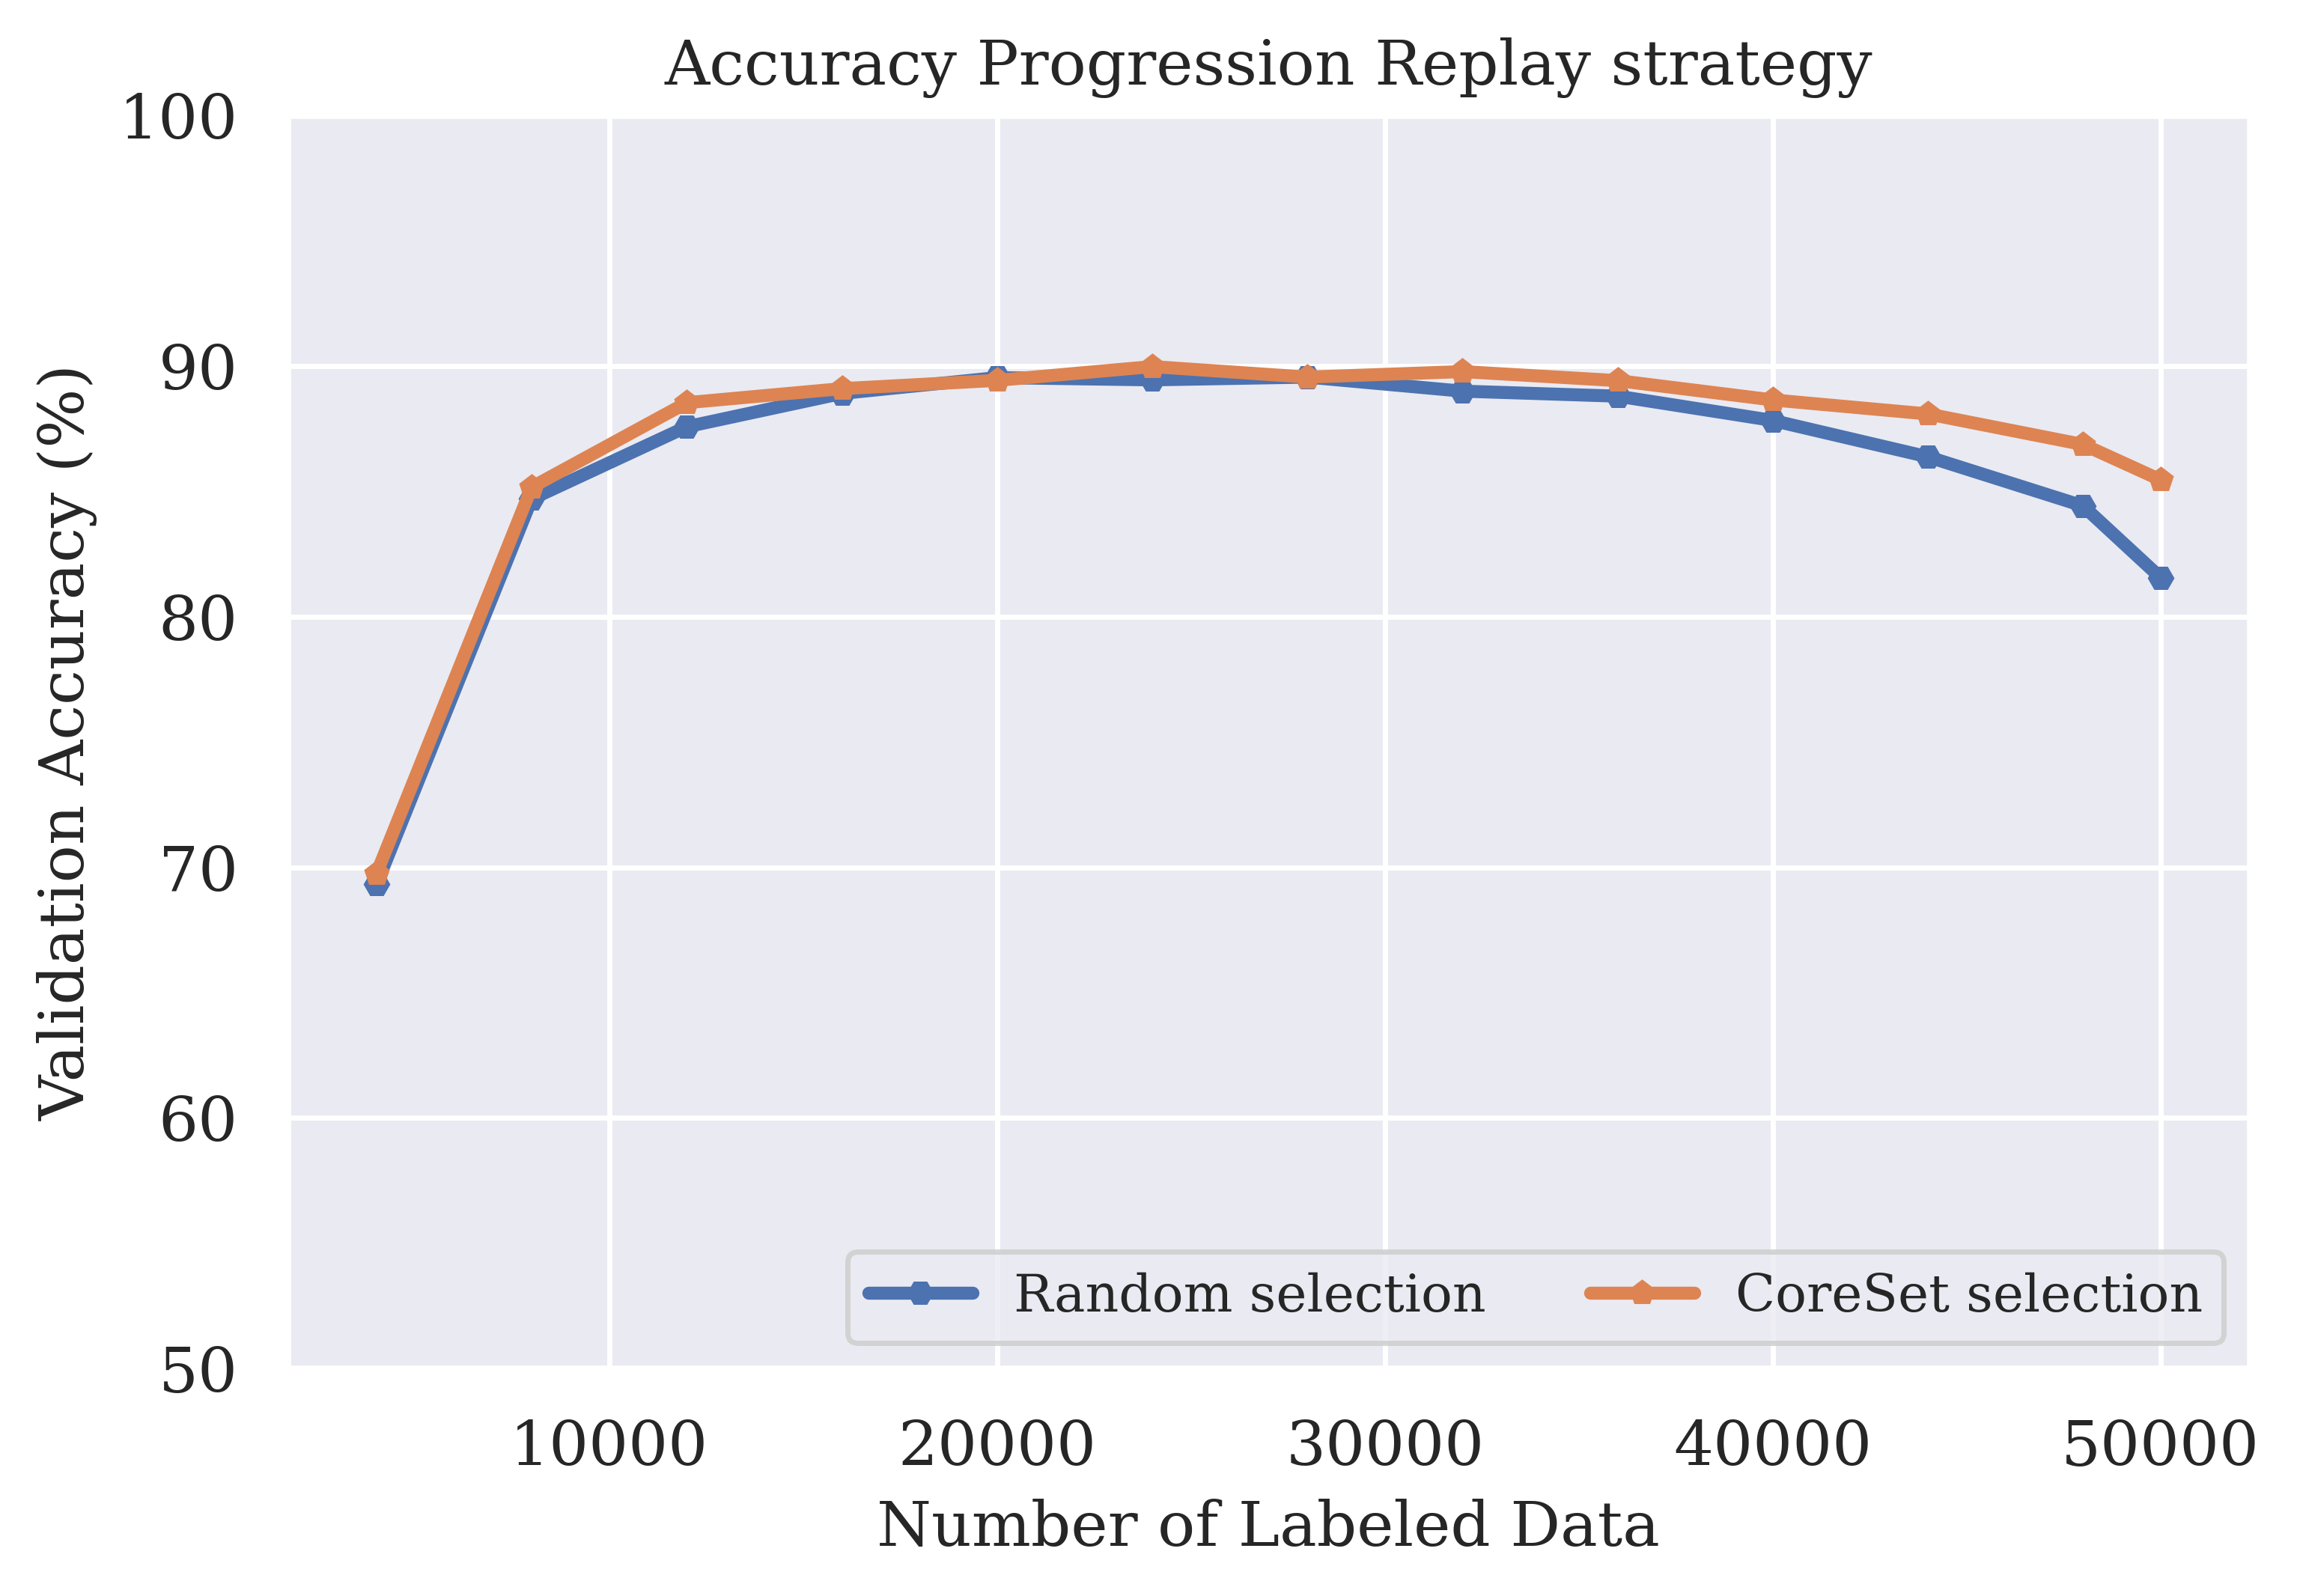

In [75]:
# Replay comparision
CoreSet_Replay_4k_buf_4k_batch_random = [0.6932, 0.847, 0.8758, 0.8891, 0.8954, 0.8945, 0.8956, 0.89, 0.888, 0.8783, 0.8638, 0.8442, 0.8156]
CoreSet_Replay_4k_buf_4k_batch_cs = [0.6976, 0.8517, 0.8854, 0.891, 0.8943, 0.8998, 0.8956, 0.8978, 0.8942, 0.8865, 0.8809, 0.8687, 0.8546]
CoreSet_Replay_2k_buf_4k_batch = [0.7125, 0.8303, 0.8616, 0.8717, 0.879, 0.8793, 0.8819, 0.8796, 0.878, 0.8721, 0.8621, 0.8434, 0.8273]
CoreSet_Replay_2k_buf_2k_batch =  [0.5683, 0.7294, 0.7889, 0.8109, 0.8292, 0.8367, 0.8345, 0.8387, 0.845, 0.8393, 0.8429, 0.8458, 0.851, 0.8495, 0.8474, 0.8507, 0.8507, 0.8476, 0.8455, 0.8305, 0.8382, 0.8274, 0.823, 0.8101, 0.7957]
CoreSet_Naive = [0.7169, 0.8047, 0.8301, 0.8465, 0.8497, 0.8534, 0.8575, 0.8573, 0.8514, 0.8341, 0.8239, 0.7452, 0.6804]
x = [(i+1)*2000 for i in range(25)]
x2 = [(i+1)*4000 for i in range(12)] + [50000]
m={}
m['MAS']='o'
m['CoreSet']='>'
m['IMM']='^'
m['Alasso']='*'
m['Baseline']='d'
m['EWC']='p'
m['Naive']='H'
m['emp']='s'
m['SA']=','
fig, ax = plt.subplots(dpi=500)
plt_props()

a = [x*100 for x in CoreSet_Replay_4k_buf_4k_batch_random]
b = [x*100 for x in CoreSet_Replay_4k_buf_4k_batch_cs]
c = [x*100 for x in CoreSet_Replay_2k_buf_4k_batch]
d = [x*100 for x in CoreSet_Replay_2k_buf_2k_batch]
e = [x*100 for x in CoreSet_Naive]
#f = [x*100 for x in Continual_1]
#g = [x*100 for x in Continual_0]
random_naive, = plt.plot(x2, a, label='Random selection', marker=m['Naive'])
random_ewc, = plt.plot(x2, b, label='CoreSet selection', marker=m['EWC'])
#random_imm, = plt.plot(x2, c, label='2k buffer 4k batch size', marker=m['IMM'])
#random_mas, = plt.plot(x, d, label='2k buffer 2k batch size', marker=m['MAS'])
#random_alasso, = plt.plot(x2,e,label='Naive 4k batch size',marker=m['Alasso'])
#random_baseline, = plt.plot(x, f, label='Start cycle 1', marker=m['Baseline'])
#random_2, = plt.plot(x, g, label='Start cycle 0', marker=m['emp'])

#cifar10_empirical_plot = plt.plot(x, Random_Naive, label='VAAL', marker=m['VAAL'])

ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
plt.legend(handles=[random_naive, random_ewc], loc=4)

#ax.set_xlim(9.8, 40.4)
#ax.set_ylim(40.0, 82.0)
#plt.plot([], [], ' ', label= r"Top-1" 
#                            r"$=90.16 \pm 0.25$")
plt.legend(ncol=2, loc='lower right')
fig.tight_layout()
plt.ylim(50,100)
plt.xlabel('Number of Labeled Data')
plt.ylabel('Validation Accuracy (%)')  
plt.title('Accuracy Progression Replay strategy')
plt.grid(True)
plt.show()

In [ ]:
# Model Stealing Results
cifar_softmax_coreset = [0.1583, 0.5176, 0.5776, 0.6031, 0.6247, 0.641, 0.663, 0.6724, 0.6777, 0.6708, 0.6874, 0.6877, 0.6972, 0.6892, 0.7032, 0.7114, 0.7121, 0.7051, 0.7111, 0.7145, 0.7161]
cifar_softmax_lc = []
cifar_softmax_random = []
cifar_softmax_badge = [0.1614, 0.526, 0.5728, 0.6128, 0.619, 0.6512, 0.6731, 0.6755, 0.6838, 0.6792, 0.6837, 0.6915, 0.6948, 0.7103, 0.7068, 0.7075, 0.7045, 0.7132, 0.7052, 0.7144, 0.7139]
cifar_softmax_bald = []
cifar_softmax_badge_naive = [0.1702, 0.4021, 0.5206, 0.5528, 0.56, 0.574, 0.5695, 0.5813, 0.5918, 0.5742, 0.5938, 0.5912, 0.5984, 0.5842, 0.5869, 0.5887, 0.6014, 0.5985, 0.6011, 0.6017, 0.6144]
cifar_softmax_badge_ewc = [0.1422, 0.3145, 0.4538, 0.5144, 0.5419, 0.5687, 0.5837, 0.5602, 0.6009, 0.6188, 0.6161, 0.6025, 0.6026, 0.5996, 0.6072, 0.6059, 0.594, 0.6359, 0.6069, 0.6118, 0.626]
cifar_softmax_badge_imm = []
cifar_softmax_badge_mas = []
cifar_softmax_coreset_mas = [0.5225, 0.5093, 0.5174, 0.5136, 0.5164, 0.5234, 0.5279, 0.5232, 0.5384, 0.5223, 0.5432, 0.537, 0.5448, 0.5481, 0.5475, 0.5385, 0.5489, 0.5624, 0.5557, 0.5588, 0.5515]
cifar_softmax_coreset_naive = [0.1488, 0.3339, 0.477, 0.5235, 0.5546, 0.5818, 0.5822, 0.5877, 0.6148, 0.6161, 0.611, 0.6135, 0.6103, 0.5944, 0.6018, 0.5985, 0.5932, 0.573, 0.6124, 0.6069, 0.6164]
cifar_softmax_coreset_ewc = [0.1035, 0.1639, 0.3753, 0.4573, 0.5187, 0.5493, 0.5791, 0.6112, 0.5959, 0.6179, 0.6281, 0.6168, 0.6205, 0.6084, 0.6154, 0.612, 0.6104, 0.6218, 0.5988, 0.6194, 0.6134]
cifar_softmax_coreset_imm = [0.1029, 0.09, 0.3635, 0.4445, 0.5626, 0.5837, 0.5887, 0.618, 0.6075, 0.6139, 0.5985, 0.6126, 0.594, 0.6059, 0.6169, 0.6038, 0.5833, 0.5718, 0.5997, 0.5907, 0.5975]
cifar_softmax_bald_ewc = [0.1623, 0.2652, 0.4433, 0.5121, 0.5764, 0.5752, 0.6103, 0.6213, 0.6146, 0.6157, 0.6212, 0.6359, 0.6252, 0.6432, 0.6248, 0.6194, 0.6313, 0.6343, 0.6118, 0.6187, 0.6234]
cifar_softmax_bald_mas = [0.5051, 0.4982, 0.4796, 0.4814, 0.4947, 0.4962, 0.5083, 0.5207, 0.5281, 0.5209, 0.5362, 0.5464, 0.5376, 0.5457, 0.5516, 0.547, 0.5514, 0.5501, 0.5406, 0.5509, 0.5484]
cifar_softmax_bald_naive = [0.174, 0.3061, 0.4461, 0.5293, 0.575, 0.5762, 0.5779, 0.6131, 0.61, 0.6184, 0.6124, 0.6006, 0.6353, 0.6126, 0.6201, 0.6193, 0.6164, 0.6335, 0.628, 0.6212, 0.6233]
cifar_softmax_bald_imm = [0.1033, 0.1019, 0.1998, 0.417, 0.5402, 0.5677, 0.5967, 0.5796, 0.6176, 0.6032, 0.5931, 0.6214, 0.6145, 0.6152, 0.6214, 0.6228, 0.6329, 0.6146, 0.6189, 0.6141, 0.6035]
cifar_softmax_lc_ewc = [0.1468, 0.299, 0.4319, 0.455, 0.4948, 0.5042, 0.5346, 0.5664, 0.515, 0.568, 0.5585, 0.5636, 0.5515, 0.5918, 0.5849, 0.5725, 0.5647, 0.5701, 0.5803, 0.5716, 0.5887]
cifar_softmax_lc_mas = [0.4974, 0.48, 0.4823, 0.4931, 0.5081, 0.5078, 0.507, 0.507, 0.5204, 0.5145, 0.5143, 0.521, 0.5309, 0.5308, 0.5466, 0.5375, 0.5515, 0.5523, 0.5454, 0.5556, 0.5425]
cifar_softmax_lc_imm = [0.1013, 0.2088, 0.4729, 0.4879, 0.5408, 0.5259, 0.56, 0.5472, 0.5552, 0.5224, 0.5663, 0.5454, 0.5411, 0.5463, 0.5735, 0.5566, 0.5483, 0.573, 0.5762, 0.5766, 0.5817]
cifar_softmax_lc_naive = [0.1728, 0.3731, 0.473, 0.516, 0.5496, 0.5205, 0.5599, 0.5631, 0.5734, 0.5662, 0.5416, 0.5696, 0.5638, 0.6029, 0.5614, 0.5787, 0.572, 0.5769, 0.573, 0.5717, 0.588]
cifar_softmax_random_mas = [0.4929, 0.4978, 0.4986, 0.4953, 0.4913, 0.4901, 0.4936, 0.513, 0.5107, 0.5032, 0.5134, 0.519, 0.5238, 0.518, 0.5203, 0.5266, 0.5342, 0.5278, 0.523, 0.5311, 0.5284]
cifar_softmax_random_imm =  [0.1679, 0.3341, 0.5166, 0.5693, 0.5892, 0.5744, 0.5882, 0.5871, 0.5944, 0.6078, 0.6164, 0.5995, 0.6053, 0.6064, 0.6146, 0.6025, 0.6141, 0.6268, 0.6173, 0.6281, 0.6112]
cifar_softmax_random_ewc = [0.1868, 0.2901, 0.4163, 0.5039, 0.5151, 0.5596, 0.5729, 0.5496, 0.5785, 0.5867, 0.5796, 0.5917, 0.585, 0.5795, 0.5849, 0.5786, 0.6059, 0.6071, 0.591, 0.6061, 0.6065]
cifar_softmax_random_naive = [0.1019, 0.2989, 0.5047, 0.5486, 0.5675, 0.602, 0.584, 0.6153, 0.6097, 0.608, 0.5993, 0.6012, 0.5984, 0.628, 0.6173, 0.6189, 0.5874, 0.6062, 0.6142, 0.6209, 0.6134]

cifar_label_coreset = []
cifar_label_lc = []
cifar_label_random = []
cifar_label_badge = [0.151, 0.3942, 0.468, 0.5326, 0.4548, 0.5396, 0.5554, 0.578, 0.5812, 0.5501, 0.5907, 0.6081, 0.607, 0.582, 0.5802, 0.5941, 0.5916, 0.6109, 0.6013, 0.6226, 0.5832]
cifar_label_bald = []
cifar_label_badge_ewc = [0.1429, 0.24, 0.3548, 0.4504, 0.4591, 0.4386, 0.4818, 0.4917, 0.4963, 0.4911, 0.5359, 0.5042, 0.5073, 0.504, 0.5153, 0.5349, 0.5133, 0.522, 0.5384, 0.533, 0.5382]
cifar_label_badge_naive = []
cifar_label_badge_imm = []
cifar_label_badge_mas = []
cifar_label_coreset_naive = [0.1882, 0.3118, 0.404, 0.475, 0.4832, 0.5058, 0.517, 0.5015, 0.4934, 0.4844, 0.5016, 0.4999, 0.4728, 0.4517, 0.4532, 0.483, 0.4513, 0.4675, 0.4487, 0.4418, 0.472]
cifar_label_coreset_imm = [0.1676, 0.2714, 0.4071, 0.4508, 0.4448, 0.4796, 0.4921, 0.4857, 0.4703, 0.4964, 0.4916, 0.4501, 0.4541, 0.4884, 0.4806, 0.464, 0.4783, 0.5022, 0.4871, 0.4437, 0.431]
cifar_label_coreset_ewc = [0.1779, 0.2136, 0.2809, 0.3587, 0.403, 0.4625, 0.456, 0.4698, 0.4916, 0.4794, 0.4952, 0.479, 0.4794, 0.4981, 0.5231, 0.5206, 0.5276, 0.5311, 0.5147, 0.5129, 0.5305]
cifar_label_coreset_mas = [0.3865, 0.3498, 0.332, 0.3714, 0.3941, 0.3947, 0.4063, 0.3867, 0.3834, 0.3998, 0.4121, 0.4205, 0.4078, 0.4078, 0.416, 0.4235, 0.4117, 0.417, 0.4066, 0.436, 0.4331]
cifar_label_bald_ewc = [0.1768, 0.3085, 0.3817, 0.4567, 0.4511, 0.4845, 0.4741, 0.4978, 0.5125, 0.5022, 0.4986, 0.5199, 0.5134, 0.525, 0.5124, 0.5132, 0.5273, 0.5203, 0.5242, 0.5365, 0.5232]
cifar_label_bald_imm = [0.1554, 0.2889, 0.3807, 0.4308, 0.4287, 0.48, 0.4845, 0.4767, 0.4555, 0.4355, 0.4581, 0.439, 0.4355, 0.4175, 0.4232, 0.4332, 0.4649, 0.4669, 0.448, 0.4412, 0.4425]
cifar_label_bald_mas = [0.3562, 0.3125, 0.3439, 0.3374, 0.3777, 0.3711, 0.3598, 0.3734, 0.3745, 0.3687, 0.3807, 0.3736, 0.3962, 0.3942, 0.3706, 0.3829, 0.3928, 0.4027, 0.3919, 0.4017, 0.3849]
cifar_label_bald_naive = [0.1056, 0.1022, 0.1016, 0.1029, 0.1038, 0.1013, 0.1015, 0.1037, 0.1015, 0.1018, 0.1044, 0.1021, 0.1033, 0.1073, 0.1046, 0.1021, 0.105, 0.1044, 0.1046, 0.1023, 0.1032]
cifar_label_lc_mas = [0.3259, 0.2917, 0.327, 0.3054, 0.3012, 0.302, 0.3096, 0.3369, 0.3035, 0.3327, 0.3323, 0.3347, 0.3508, 0.347, 0.3541, 0.3703, 0.3499, 0.3673, 0.3668, 0.3572, 0.3689]
cifar_label_lc_imm = [0.1838, 0.3499, 0.3825, 0.4133, 0.4222, 0.4123, 0.442, 0.3947, 0.4273, 0.4425, 0.4142, 0.4044, 0.3649, 0.3846, 0.3626, 0.3714, 0.3727, 0.3788, 0.1052, 0.1023, 0.1042]
cifar_label_lc_ewc = [0.0995, 0.1018, 0.1032, 0.3223, 0.4095, 0.395, 0.4232, 0.4548, 0.4705, 0.4712, 0.455, 0.4751, 0.4729, 0.4833, 0.4677, 0.4965, 0.4867, 0.4898, 0.5073, 0.5119, 0.5019]
coreset_label_lc_naive = [0.1259, 0.132, 0.1279, 0.1349, 0.1289, 0.1312, 0.1275, 0.1287, 0.1254, 0.1337, 0.129, 0.1305, 0.1299, 0.1305, 0.1271, 0.1311, 0.1297, 0.1313, 0.1281, 0.1284, 0.1284]
cifar_label_random_ewc = [0.1027, 0.104, 0.105, 0.1025, 0.1032, 0.1022, 0.1013, 0.1028, 0.1023, 0.1009, 0.1071, 0.1023, 0.1052, 0.0984, 0.1044, 0.1011, 0.1018, 0.1034, 0.1036, 0.103, 0.1029]
cifar_label_random_mas = [0.4311, 0.4136, 0.4258, 0.411, 0.4205, 0.4305, 0.4349, 0.4418, 0.4458, 0.4576, 0.4647, 0.4555, 0.461, 0.4654, 0.4672, 0.4633, 0.469, 0.4803, 0.4842, 0.4804, 0.484]
cifar_label_random_imm = [0.1854, 0.3218, 0.4085, 0.4472, 0.4778, 0.4722, 0.5121, 0.4977, 0.4744, 0.4984, 0.4993, 0.4904, 0.487, 0.4887, 0.4757, 0.4727, 0.4572, 0.4467, 0.4249, 0.4239, 0.4426]
cifar_label_random_naive = [0.1613, 0.2139, 0.3801, 0.4321, 0.4824, 0.4944, 0.5129, 0.5238, 0.4863, 0.4984, 0.5177, 0.5058, 0.515, 0.5164, 0.5193, 0.5164, 0.5116, 0.4799, 0.4924, 0.4635, 0.4732]

mnist_softmax_coreset = [0.1093, 0.4932, 0.577, 0.7024, 0.7974, 0.8415, 0.8289, 0.8831, 0.8855, 0.8982, 0.9061, 0.8831, 0.9011, 0.9112, 0.9056, 0.9175, 0.905, 0.9105, 0.9185, 0.9122, 0.9065]
mnist_softmax_lc = [0.1042, 0.4083, 0.6111, 0.6491, 0.733, 0.7136, 0.7295, 0.7387, 0.8145, 0.7933, 0.7901, 0.804, 0.7933, 0.7941, 0.8469, 0.8646, 0.8565, 0.8325, 0.8362, 0.8239, 0.8582]
mnist_softmax_random = []
mnist_softmax_badge = [0.104, 0.476, 0.5676, 0.6588, 0.7822, 0.7896, 0.7912, 0.7947, 0.7857, 0.8001, 0.8135, 0.818, 0.8369, 0.8086, 0.8247, 0.8162, 0.8058, 0.8511, 0.8203, 0.7968, 0.8162]
mnist_softmax_bald = []
mnist_softmax_badge_ewc = []
mnist_softmax_badge_naive = []
mnist_softmax_badge_imm = []
mnist_softmax_badge_mas = [0.4884, 0.4432, 0.4326, 0.4499, 0.4731, 0.4468, 0.4755, 0.4729, 0.5134, 0.5054, 0.5252, 0.5374, 0.527, 0.5349, 0.5521, 0.5426, 0.5401, 0.5498, 0.5583, 0.5509, 0.5733]
mnist_softmax_coreset_ewc = [0.1041, 0.1018, 0.1034, 0.2644, 0.4955, 0.5571, 0.6249, 0.7005, 0.6141, 0.5613, 0.5974, 0.5997, 0.6458, 0.614, 0.6369, 0.7179, 0.6408, 0.6154, 0.6427, 0.6469, 0.6342]
mnist_softmax_coreset_naive = [0.1037, 0.1415, 0.4669, 0.365, 0.6051, 0.5882, 0.4799, 0.5592, 0.662, 0.5836, 0.5948, 0.6797, 0.6973, 0.5689, 0.4192, 0.6326, 0.5464, 0.5481, 0.5238, 0.5475, 0.6123]
mnist_softmax_coreset_imm = [0.1045, 0.1041, 0.3224, 0.465, 0.5482, 0.6173, 0.6157, 0.6026, 0.6613, 0.6343, 0.651, 0.4576, 0.5613, 0.6486, 0.6735, 0.69, 0.6879, 0.5759, 0.6397, 0.644, 0.5535]
mnist_softmax_coreset_mas = []
mnist_softmax_bald_mas = [0.6012, 0.5882, 0.6092, 0.626, 0.6337, 0.6247, 0.6322, 0.6608, 0.6828, 0.6784, 0.7011, 0.6921, 0.6876, 0.6708, 0.6935, 0.7396, 0.7074, 0.7014, 0.7019, 0.6798, 0.6799, 0.6987]
mnist_softmax_bald_naive = [0.1036, 0.4172, 0.5865, 0.562, 0.5877, 0.52, 0.6378, 0.5567, 0.426, 0.5961, 0.5858, 0.5762, 0.474, 0.5992, 0.4926, 0.5554, 0.4862, 0.4455, 0.5337, 0.6305, 0.619, 0.6404]
mnist_softmax_bald_imm = [0.1052, 0.1037, 0.5734, 0.5939, 0.6024, 0.6077, 0.5639, 0.459, 0.6026, 0.4971, 0.6012, 0.6503, 0.6071, 0.6581, 0.5826, 0.6406, 0.6818, 0.5947, 0.3377, 0.5912, 0.6522, 0.5084]
mnist_softmax_bald_ewc = [0.1039, 0.1049, 0.4551, 0.595, 0.6072, 0.6091, 0.6605, 0.5875, 0.6299, 0.5918, 0.6148, 0.6354, 0.6118, 0.546, 0.6158, 0.5148, 0.4772, 0.5988, 0.5649, 0.6454, 0.6036, 0.5663]
mnist_softmax_lc_naive = [0.1039, 0.1037, 0.104, 0.1042, 0.104, 0.1038, 0.1038, 0.1038, 0.104, 0.1042, 0.1037, 0.1037, 0.104, 0.1044, 0.1038, 0.1038, 0.1036, 0.104, 0.1042, 0.1042, 0.1038, 0.104]
mnist_softmax_lc_mas = [0.4933, 0.4086, 0.5051, 0.4084, 0.4005, 0.4988, 0.4018, 0.4769, 0.4523, 0.5027, 0.5414, 0.5097, 0.5613, 0.5377, 0.5596, 0.5445, 0.5958, 0.5643, 0.6023, 0.59, 0.5933, 0.6095]
mnist_softmax_lc_ewc = [0.104, 0.2495, 0.5974, 0.6173, 0.6878, 0.5691, 0.5237, 0.6021, 0.5778, 0.5367, 0.6146, 0.6251, 0.5322, 0.6397, 0.5137, 0.6991, 0.6056, 0.5067, 0.5006, 0.6432, 0.4764, 0.4371]
mnist_softmax_lc_imm =  [0.1037, 0.1038, 0.1037, 0.1043, 0.1039, 0.104, 0.1038, 0.1036, 0.1041, 0.104, 0.1039, 0.104, 0.1037, 0.1043, 0.1041, 0.104, 0.1043, 0.1039, 0.1045, 0.1042, 0.1041, 0.1042]
mnist_softmax_random_imm = [0.1042, 0.3047, 0.5131, 0.6262, 0.5159, 0.6818, 0.5023, 0.6738, 0.6066, 0.4818, 0.6497, 0.477, 0.4495, 0.5604, 0.5977, 0.5924, 0.5211, 0.609, 0.5122, 0.6021, 0.474]
mnist_softmax_random_naive = [0.103, 0.2106, 0.5274, 0.3893, 0.4979, 0.4166, 0.3972, 0.5102, 0.6043, 0.4774, 0.5291, 0.5521, 0.5196, 0.674, 0.5997, 0.5624, 0.4746, 0.6603, 0.5452, 0.4781, 0.5206]
mnist_softmax_random_mas = [0.4627, 0.5138, 0.5022, 0.5582, 0.5731, 0.6171, 0.6193, 0.6107, 0.6576, 0.6442, 0.635, 0.632, 0.6282, 0.6537, 0.6657, 0.6299, 0.6694, 0.6513, 0.6581, 0.6675, 0.671]
mnist_softmax_random_ewc = [0.1036, 0.103, 0.2451, 0.4887, 0.4611, 0.5143, 0.63, 0.5508, 0.6456, 0.5926, 0.6318, 0.5237, 0.5176, 0.4775, 0.5849, 0.5383, 0.5232, 0.4901, 0.5267, 0.5951, 0.6637]

mnist_label_coreset = []
mnist_label_lc = []
mnist_label_random = []
mnist_label_badge = []
mnist_label_bald = []
mnist_label_badge_ewc = []
mnist_label_badge_naive = []
mnist_label_badge_imm = []
mnist_label_badge_mas = []
mnist_label_coreset_ewc = [0.223, 0.4805, 0.5924, 0.5102, 0.465, 0.407, 0.4254, 0.526, 0.4405, 0.3684, 0.5028, 0.529, 0.5495, 0.5604, 0.4026, 0.5538, 0.5603, 0.5002, 0.3803, 0.4075, 0.4981]
mnist_label_coreset_mas = [0.2971, 0.3635, 0.4211, 0.4586, 0.4674, 0.4789, 0.4889, 0.4798, 0.4179, 0.4496, 0.4478, 0.4963, 0.4967, 0.5, 0.5136, 0.4675, 0.5025, 0.4954, 0.5549, 0.499, 0.4717]
mnist_label_coreset_imm = [0.1042, 0.1027, 0.1043, 0.0986, 0.4496, 0.5645, 0.5565, 0.6432, 0.6877, 0.51, 0.5874, 0.497, 0.6498, 0.4823, 0.5936, 0.439, 0.542, 0.5255, 0.5241, 0.4976, 0.5053]
mnist_label_coreset_naive = [0.1037, 0.1042, 0.1048, 0.1048, 0.2401, 0.547, 0.494, 0.6264, 0.5697, 0.4488, 0.3859, 0.5524, 0.5645, 0.5208, 0.5704, 0.5594, 0.4487, 0.5025, 0.3761, 0.2914, 0.461]
mnist_label_bald_ewc = [0.1256, 0.1657, 0.2927, 0.5302, 0.4767, 0.4885, 0.4859, 0.5183, 0.4826, 0.5236, 0.5435, 0.3301, 0.3842, 0.4809, 0.517, 0.3409, 0.4686, 0.6038, 0.4822, 0.4338, 0.4175]
mnist_label_bald_imm = [0.1036, 0.1044, 0.561, 0.4625, 0.4715, 0.5789, 0.4793, 0.4132, 0.4544, 0.5871, 0.5506, 0.4345, 0.5424, 0.5683, 0.6064, 0.4596, 0.5603, 0.3566, 0.6072, 0.4606, 0.3671]
mnist_label_bald_naive = [0.104, 0.1044, 0.1036, 0.1857, 0.3354, 0.5581, 0.508, 0.5582, 0.5221, 0.6918, 0.605, 0.5384, 0.4906, 0.5744, 0.5979, 0.5354, 0.4359, 0.4139, 0.4278, 0.4179, 0.3577]
mnist_label_bald_mas = [0.452, 0.3371, 0.4718, 0.4384, 0.5406, 0.416, 0.4606, 0.4583, 0.4817, 0.4951, 0.5135, 0.4394, 0.5016, 0.489, 0.5124, 0.5063, 0.5263, 0.4921, 0.5342, 0.4913, 0.5394]
mnist_label_lc_imm = [0.1038, 0.1039, 0.1034, 0.1042, 0.1043, 0.1039, 0.1037, 0.1043, 0.104, 0.1043, 0.104, 0.1034, 0.104, 0.1042, 0.1038, 0.1044, 0.1041, 0.1037, 0.1035, 0.1044, 0.104, 0.1051]
mnist_label_lc_mas = [0.262, 0.3939, 0.3426, 0.3638, 0.3102, 0.3441, 0.3386, 0.4282, 0.3914, 0.4679, 0.4493, 0.4255, 0.4626, 0.5034, 0.5429, 0.5779, 0.6096, 0.6028, 0.5491, 0.624, 0.6107, 0.6031]
mnist_label_lc_ewc =  [0.1038, 0.3183, 0.5772, 0.5275, 0.4676, 0.5427, 0.5155, 0.512, 0.4386, 0.473, 0.3916, 0.4347, 0.4177, 0.3885, 0.3622, 0.3512, 0.5249, 0.4727, 0.452, 0.3796, 0.4246, 0.517]
mnist_label_lc_naive = [0.1042, 0.391, 0.5076, 0.5878, 0.5682, 0.4697, 0.5921, 0.4314, 0.4736, 0.5884, 0.5865, 0.4177, 0.4261, 0.5311, 0.4377, 0.4848, 0.3863, 0.4655, 0.4997, 0.5509, 0.5218, 0.1041]
mnist_label_random_naive = [0.1043, 0.1036, 0.1114, 0.477, 0.3599, 0.471, 0.4591, 0.4222, 0.6164, 0.4344, 0.3864, 0.5395, 0.3602, 0.3958, 0.5109, 0.4342, 0.4374, 0.4565, 0.5318, 0.4981, 0.4054, 0.3831]
mnist_label_random_mas = [0.399, 0.4666, 0.4409, 0.4554, 0.4664, 0.5107, 0.5045, 0.5018, 0.4906, 0.5052, 0.5036, 0.4553, 0.4884, 0.474, 0.4804, 0.4917, 0.5276, 0.4925, 0.5189, 0.4836, 0.493, 0.4833]
mnist_label_random_ewc = [0.119, 0.275, 0.3647, 0.3389, 0.468, 0.4115, 0.3496, 0.3801, 0.4526, 0.4676, 0.386, 0.5722, 0.463, 0.4445, 0.403, 0.4062, 0.4796, 0.4453, 0.4402, 0.4278, 0.3166, 0.3847]
mnist_label_random_imm = [0.1047, 0.1129, 0.4667, 0.4514, 0.4882, 0.4034, 0.5395, 0.3007, 0.3807, 0.4707, 0.4537, 0.2767, 0.4977, 0.5312, 0.4518, 0.1038, 0.1039, 0.1043, 0.1042, 0.1038, 0.1038, 0.1037]

cifar100_softmax_coreset = []
cifar100_softmax_lc = []
cifar100_softmax_random = []
cifar100_softmax_badge = []
cifar100_softmax_bald = []
cifar100_softmax_badge_ewc = []
cifar100_softmax_badge_naive = []
cifar100_softmax_badge_imm = []
cifar100_softmax_badge_mas = []
cifar100_softmax_coreset_ewc = [0.1322, 0.1626, 0.1745, 0.1783, 0.1906, 0.1866, 0.192, 0.1897, 0.204, 0.1998, 0.1914, 0.1861, 0.1912, 0.1908, 0.1897, 0.1899, 0.1867, 0.191, 0.1842, 0.1886, 0.1985]
cifar100_softmax_coreset_naive = [0.1175, 0.1452, 0.1646, 0.1701, 0.1799, 0.1788, 0.1746, 0.1738, 0.1702, 0.1769, 0.1774, 0.1664, 0.1742, 0.1787, 0.1793, 0.179, 0.196, 0.1835, 0.1788, 0.1975, 0.1902]
cifar100_softmax_coreset_imm = [0.0362, 0.0937, 0.1398, 0.1646, 0.1775, 0.1715, 0.1759, 0.1771, 0.1911, 0.1875, 0.1922, 0.1902, 0.1896, 0.1811, 0.1974, 0.191, 0.1873, 0.1986, 0.1879, 0.1877, 0.1944]
cifar100_softmax_coreset_mas = [0.1473, 0.1415, 0.1414, 0.1465, 0.1492, 0.1522, 0.1509, 0.1533, 0.1499, 0.1545, 0.152, 0.1503, 0.1474, 0.1455, 0.1455, 0.1495, 0.1463, 0.1506, 0.1531, 0.1545, 0.1572]
cifar100_softmax_coreset_alasso = [0.1544, 0.142, 0.1254, 0.1071, 0.0882, 0.0997, 0.078, 0.0676, 0.1052, 0.1024, 0.0253, 0.0434, 0.0321, 0.0405, 0.0428, 0.0401, 0.0449, 0.0357, 0.0333, 0.0321, 0.0635]
cifar100_softmax_bald_mas = [0.136, 0.1323, 0.1369, 0.1417, 0.1371, 0.1436, 0.1437, 0.1455, 0.1493, 0.1471, 0.1432, 0.1449, 0.1456, 0.1497, 0.1505, 0.1452, 0.1443, 0.1444, 0.1453, 0.1475, 0.1472]
cifar100_softmax_bald_naive = [0.0408, 0.0738, 0.0927, 0.1207, 0.1283, 0.1496, 0.138, 0.138, 0.151, 0.168, 0.1625, 0.1596, 0.1618, 0.1548, 0.1676, 0.1663, 0.1606, 0.1513, 0.1562, 0.1611, 0.1477]
cifar100_softmax_bald_imm = [0.1076, 0.1442, 0.1737, 0.1822, 0.1885, 0.1868, 0.1868, 0.1903, 0.2018, 0.2039, 0.1988, 0.1935, 0.1991, 0.2133, 0.1942, 0.1887, 0.1987, 0.2043, 0.1806, 0.1952, 0.1904]
cifar100_softmax_bald_ewc = [0.1308, 0.16, 0.1841, 0.1922, 0.2058, 0.206, 0.2052, 0.2069, 0.202, 0.2067, 0.198, 0.2081, 0.2038, 0.2075, 0.2124, 0.2105, 0.2042, 0.1976, 0.2043, 0.2047, 0.1947]
cifar100_softmax_bald_alasso = [0.1462, 0.1487, 0.1292, 0.0995, 0.0927, 0.0734, 0.0899, 0.0835, 0.0703, 0.067, 0.0611, 0.0585, 0.0591, 0.0598, 0.0592, 0.0636, 0.0639, 0.0602, 0.0606, 0.0586, 0.0502]
cifar100_softmax_lc_naive = [0.0721, 0.12, 0.1352, 0.1523, 0.1614, 0.1676, 0.1645, 0.1762, 0.1699, 0.1848, 0.1839, 0.1729, 0.1856, 0.1858, 0.1762, 0.1762, 0.1885, 0.1823, 0.1886, 0.1924, 0.1877]
cifar100_softmax_lc_mas = [0.1477, 0.1446, 0.1484, 0.147, 0.1482, 0.1459, 0.1507, 0.1544, 0.1477, 0.1485, 0.1491, 0.1523, 0.1528, 0.1524, 0.1533, 0.1508, 0.1505, 0.1527, 0.1511, 0.1537, 0.1481]
cifar100_softmax_lc_ewc = [0.0323, 0.0956, 0.1408, 0.1595, 0.166, 0.1662, 0.17, 0.1715, 0.1735, 0.1746, 0.175, 0.1785, 0.1804, 0.1818, 0.1807, 0.1925, 0.1806, 0.1882, 0.1914, 0.1842, 0.1864]
cifar100_softmax_lc_imm =  [0.1001, 0.1394, 0.1737, 0.1599, 0.1717, 0.1646, 0.1836, 0.189, 0.1775, 0.179, 0.1783, 0.1801, 0.186, 0.1768, 0.1789, 0.1913, 0.1815, 0.1734, 0.1868, 0.1841, 0.1988]
cifar100_softmax_lc_alasso = [0.1488, 0.1485, 0.1382, 0.1085, 0.0964, 0.1065, 0.091, 0.1008, 0.0712, 0.0495, 0.0545, 0.0375, 0.0438, 0.0238, 0.0503, 0.0217, 0.0505, 0.042, 0.0547, 0.0375, 0.0509]
cifar100_softmax_random_imm = [0.0406, 0.0802, 0.1397, 0.1646, 0.174, 0.178, 0.1879, 0.1931, 0.1733, 0.1816, 0.1764, 0.1831, 0.182, 0.1837, 0.1926, 0.1892, 0.187, 0.1876, 0.1835, 0.1969, 0.1801]
cifar100_softmax_random_naive = [0.0368, 0.122, 0.1582, 0.1704, 0.1875, 0.1829, 0.1893, 0.1862, 0.1861, 0.1846, 0.1827, 0.1823, 0.1892, 0.1838, 0.19, 0.2057, 0.1877, 0.1825, 0.192, 0.1859, 0.1845]
cifar100_softmax_random_mas = [0.1509, 0.1555, 0.1522, 0.1531, 0.157, 0.1552, 0.1586, 0.1563, 0.1554, 0.1575, 0.1602, 0.16, 0.1597, 0.1564, 0.1609, 0.1622, 0.1589, 0.1604, 0.1613, 0.1588, 0.1625]
cifar100_softmax_random_ewc =  [0.1239, 0.1572, 0.1655, 0.1795, 0.1941, 0.199, 0.2066, 0.1921, 0.1994, 0.1945, 0.1926, 0.199, 0.203, 0.2021, 0.205, 0.2077, 0.1962, 0.1964, 0.1982, 0.195, 0.1933]
cifar100_softmax_random_alasso = [0.1593, 0.1539, 0.1411, 0.1212, 0.1021, 0.0853, 0.0672, 0.054, 0.0539, 0.052, 0.0444, 0.0734, 0.0743, 0.0711, 0.0611, 0.0579, 0.0674, 0.0606, 0.057, 0.0708, 0.064]

cifar100_label_coreset = []
cifar100_label_lc = []
cifar100_label_random = []
cifar100_label_bald = []
cifar100_label_coreset_ewc = []
cifar100_label_coreset_mas = [0.0519, 0.0503, 0.0557, 0.0492, 0.0534, 0.0498, 0.0518, 0.0536, 0.0501, 0.0452, 0.0453, 0.0411, 0.0419, 0.0424, 0.045, 0.0443, 0.0401, 0.0447, 0.0449, 0.0409, 0.0412]
cifar100_label_coreset_imm = [0.0154, 0.0069, 0.029, 0.0567, 0.0769, 0.0728, 0.0802, 0.074, 0.0862, 0.0805, 0.0783, 0.072, 0.0767, 0.0822, 0.0809, 0.0808, 0.079, 0.0873, 0.0822, 0.0734, 0.082]
cifar100_label_coreset_naive = [0.0193, 0.0067, 0.0104, 0.0073, 0.014, 0.0115, 0.0096, 0.0183, 0.0159, 0.0153, 0.012, 0.0148, 0.0128, 0.0062, 0.0106, 0.0169, 0.0196, 0.0094, 0.0122, 0.0091, 0.0091]
cifar100_label_coreset_alasso = [0.0578, 0.0488, 0.043, 0.0413, 0.0398, 0.0441, 0.0371, 0.0489, 0.0456, 0.0551, 0.0553, 0.0438, 0.0476, 0.0484, 0.0513, 0.0512, 0.0539, 0.0517, 0.0501, 0.0513, 0.0491]
cifar100_label_bald_ewc = [0.0201, 0.0152, 0.0154, 0.0142, 0.0162, 0.0205, 0.0202, 0.0204, 0.0201, 0.0199, 0.0213, 0.0209, 0.019, 0.0221, 0.0196, 0.0196, 0.0224, 0.0218, 0.0141, 0.0155, 0.0152]
cifar100_label_bald_imm = [0.0169, 0.0197, 0.0143, 0.0201, 0.0205, 0.0161, 0.0207, 0.0207, 0.0211, 0.0147, 0.0203, 0.0156, 0.0159, 0.021, 0.0192, 0.0183, 0.0159, 0.0165, 0.021, 0.0167, 0.0206]
cifar100_label_bald_naive = [0.0241, 0.0277, 0.0434, 0.0432, 0.0469, 0.0463, 0.0425, 0.0456, 0.0466, 0.0498, 0.0534, 0.0528, 0.0519, 0.0476, 0.0516, 0.0521, 0.036, 0.0388, 0.0507, 0.0165, 0.0152]
cifar100_label_bald_mas = [0.0507, 0.0493, 0.0497, 0.0495, 0.0505, 0.0524, 0.0499, 0.0491, 0.0511, 0.053, 0.0496, 0.0496, 0.0509, 0.051, 0.0458, 0.0496, 0.049, 0.0477, 0.0457, 0.0456, 0.0462]
cifar100_label_bald_alasso = [0.0521, 0.0448, 0.0448, 0.0512, 0.048, 0.0527, 0.053, 0.0596, 0.0517, 0.0572, 0.0608, 0.063, 0.037, 0.06, 0.0536, 0.0471, 0.0454, 0.0407, 0.0435, 0.0324, 0.0353]
cifar100_label_lc_imm = [0.0309, 0.051, 0.0457, 0.0527, 0.0681, 0.0719, 0.0803, 0.0717, 0.0833, 0.0844, 0.0761, 0.0722, 0.0778, 0.0888, 0.0786, 0.0734, 0.0842, 0.0868, 0.0866, 0.0799, 0.0845]
cifar100_label_lc_mas = [0.0538, 0.054, 0.0562, 0.0594, 0.0571, 0.0544, 0.0566, 0.058, 0.0556, 0.0544, 0.0509, 0.0536, 0.049, 0.0499, 0.0474, 0.0476, 0.0471, 0.0443, 0.0431, 0.0465, 0.0426]
cifar100_label_lc_ewc = [0.02, 0.0138, 0.0187, 0.0188, 0.0483, 0.0487, 0.0514, 0.0675, 0.0726, 0.0655, 0.0714, 0.0752, 0.0733, 0.0748, 0.0816, 0.0735, 0.0766, 0.0715, 0.0733, 0.0833, 0.0886]
cifar100_label_lc_naive = [0.0238, 0.0549, 0.0491, 0.0612, 0.0699, 0.0748, 0.0693, 0.0773, 0.0815, 0.0763, 0.0812, 0.0725, 0.0758, 0.085, 0.0809, 0.0863, 0.0763, 0.0753, 0.0847, 0.0759, 0.08]
cifar100_label_lc_alasso = [0.0538, 0.0534, 0.0419, 0.0461, 0.0531, 0.0559, 0.0608, 0.0533, 0.0604, 0.0611, 0.0583, 0.0605, 0.0661, 0.0648, 0.0655, 0.0612, 0.0703, 0.0709, 0.0707, 0.0711, 0.0742]
cifar100_label_random_naive = [0.0456, 0.0524, 0.0681, 0.0735, 0.0743, 0.0717, 0.0815, 0.0835, 0.0875, 0.0793, 0.082, 0.0831, 0.0868, 0.0863, 0.0858, 0.0854, 0.0835, 0.0918, 0.0871, 0.0856, 0.0871]
cifar100_label_random_mas = [0.0538, 0.0547, 0.0517, 0.0544, 0.055, 0.0506, 0.051, 0.0535, 0.0539, 0.0537, 0.0556, 0.0539, 0.0563, 0.0554, 0.0534, 0.0504, 0.0536, 0.0528, 0.0526, 0.0525, 0.0523]
cifar100_label_random_ewc = [0.033, 0.0535, 0.072, 0.0802, 0.0829, 0.0808, 0.0877, 0.0851, 0.0881, 0.0879, 0.0838, 0.0855, 0.0935, 0.0858, 0.0878, 0.0937, 0.0886, 0.089, 0.0891, 0.0902, 0.0857]
cifar100_label_random_imm = [0.0211, 0.0205, 0.0207, 0.0588, 0.0638, 0.0758, 0.0757, 0.0907, 0.0842, 0.0859, 0.0851, 0.0865, 0.0868, 0.0941, 0.0925, 0.0825, 0.089, 0.094, 0.088, 0.0895, 0.0859]
cifar100_label_random_alasso = [0.0551, 0.0475, 0.0462, 0.0431, 0.0436, 0.0365, 0.0612, 0.0646, 0.0566, 0.0528, 0.0457, 0.0445, 0.0428, 0.0329, 0.0433, 0.0379, 0.0357, 0.0346, 0.0351, 0.0344, 0.0315]